# Data Mining Project - Paralyzed Veterans of America

**GroupBC members:** <br>
Bruno Belo, R20170735 <br>
Rui Monteiro, R20170796 <br>
Tomás Santos, R20170734 <br>

**MSc:** Data Science and Advanced Analytics - Nova IMS <br>
**Course:** Data Mining <br>
2020/2021

## Introduction
The client, the non-profit organization Paralyzed Veterans of America, pretends to have a better understanding of their donor’s behaviors by identifying different segments within their database through a customer segmentation.
A dataset with a sample of the results of one of their last fundraising appeals, containing 95 412 donors, was given to us, in order to define, describe and explain the resulting clusters from its analysis, briefly explaining some recommended marketing approaches. For this effect, a CRISP-DM approach was used.

## Setup Environment
To run this Notebook without issues, the user can fork and clone our **GitHub repository** available at https://github.com/rfmmonteiro99/DM-Project-Final, and have a "data" folder on the folder previous to the one that has the Notebook on it, that includes the donors.csv file. This file is not available on our repository because it exceeds the maximum file size of GitHub.

Furthermore, the user needs an Anaconda environment with all the used libraries. A yml file is provided on our GitHub repository (link above) for that purpose. The user can **create the environment** with the groupBC.yml file, by following these steps:
1. Put the yml file on a folder or even on the Desktop
2. Open Anaconda Navigator
3. Go to "Environments"
4. Click on "Import"
5. Name the new environment on "Name", and find the path to your file on "Specification File" (you may need to specify you want to search for txt files on the "Import Environment" box)
6. Click on "Import" so that Anaconda starts loading all the packages
7. Finally, navigate to the new environment on "Home" and launch Jupyter Notebook

As an alternative for creating the environment, if the user already has the most "common" libraries (i.e. pandas, numpy, seaborn, sklearn, etc) on his/her own environment, the next code cell can also be uncommented, in order to pip install the "extra" libraries: yellowbrick and datawig.

In [ ]:
# # Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install -U yellowbrick

# pip3 install datawig

## 1. Importing and assessing data

In [596]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import math
from math import ceil
from datetime import datetime
from collections import Counter

# Outliers:
import sklearn.preprocessing as prep
import statsmodels.api as statsm # QQ plot
from sklearn.covariance import EllipticEnvelope
from scipy.stats import chi2
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import NearestNeighbors # For DBSCAN
from sklearn.cluster import DBSCAN

# Missing Values:
import datawig
from sklearn.impute import SimpleImputer

# Clustering:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.base import clone
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.hitmap import HitMapView

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Goes to the previous folder, accesses the data folder, and gets the path to the donors.csv file (this is done bc the  
# file is too large to upload to GitHub)
path = os.path.join('..', 'data', 'donors.csv')

data = pd.read_csv(path, sep = ',')

data.head()

Unnamed: 0     ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE  \
0           0  2009-01-01     GRI      0    IL  61081                     
1           1  2014-01-01     BOA      1    CA  91326                     
2           2  2010-01-01     AMH      1    NC  27017                     
3           3  2007-01-01     BRY      0    CA  95953                     
4           4  2006-01-01              0    FL  33176                     

          DOB NOEXCH  ...    AVGGIFT CONTROLN HPHONE_D RFA_2R RFA_2F RFA_2A  \
0  1957-12-01      0  ...   7.741935    95515        0      L      4      E   
1  1972-02-01      0  ...  15.666667   148535        0      L      2      G   
2         NaN      0  ...   7.481481    15078        1      L      4      E   
3  1948-01-01      0  ...   6.812500   172556        1      L      4      E   
4  1940-01-01      0  ...   6.864865     7112        1      L      2      F   

  MDMAUD_R MDMAUD_F MDMAUD_A GEOCODE2  
0        X        X        X        C  
1        X        X        X        A  
2        X        X        X        C  
3        X        X        X        C  
4        X        X        X        A  

[5 rows x 476 columns]

In [5]:
# Get a copy of the original dataset
data_original = data.copy()

In [6]:
# Optional -> to check all the columns or rows
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [7]:
# Dimension of the dataset
data.shape

(95412, 476)

In [8]:
# Data types of the variables and columns
data.dtypes

Unnamed: 0     int64
ODATEDW       object
OSOURCE       object
TCODE          int64
STATE         object
               ...  
RFA_2A        object
MDMAUD_R      object
MDMAUD_F      object
MDMAUD_A      object
GEOCODE2      object
Length: 476, dtype: object

In [9]:
# Summary Statistics of our variables
data.describe(include='all').T

count unique         top   freq     mean      std  min      25%  \
Unnamed: 0  95412    NaN         NaN    NaN  47705.5  27543.2    0  23852.8   
ODATEDW     95412     54  2015-01-01  15358      NaN      NaN  NaN      NaN   
OSOURCE     95412    896         MBC   4539      NaN      NaN  NaN      NaN   
TCODE       95412    NaN         NaN    NaN  54.2231  953.844    0        0   
STATE       95412     57          CA  17343      NaN      NaN  NaN      NaN   
...           ...    ...         ...    ...      ...      ...  ...      ...   
RFA_2A      95412      4           F  46964      NaN      NaN  NaN      NaN   
MDMAUD_R    95412      5           X  95118      NaN      NaN  NaN      NaN   
MDMAUD_F    95412      4           X  95118      NaN      NaN  NaN      NaN   
MDMAUD_A    95412      5           X  95118      NaN      NaN  NaN      NaN   
GEOCODE2    95280      5           A  34484      NaN      NaN  NaN      NaN   

                50%      75%    max  
Unnamed: 0  47705.5  71558.2  95411  
ODATEDW         NaN      NaN    NaN  
OSOURCE         NaN      NaN    NaN  
TCODE             1        2  72002  
STATE           NaN      NaN    NaN  
...             ...      ...    ...  
RFA_2A          NaN      NaN    NaN  
MDMAUD_R        NaN      NaN    NaN  
MDMAUD_F        NaN      NaN    NaN  
MDMAUD_A        NaN      NaN    NaN  
GEOCODE2        NaN      NaN    NaN  

[476 rows x 11 columns]

In [10]:
# Info on the donors dataset
data.info(max_cols=476)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 476 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  95412 non-null  int64  
 1   ODATEDW     95412 non-null  object 
 2   OSOURCE     95412 non-null  object 
 3   TCODE       95412 non-null  int64  
 4   STATE       95412 non-null  object 
 5   ZIP         95412 non-null  object 
 6   MAILCODE    95412 non-null  object 
 7   PVASTATE    95412 non-null  object 
 8   DOB         71529 non-null  object 
 9   NOEXCH      95412 non-null  object 
 10  RECINHSE    95412 non-null  object 
 11  RECP3       95412 non-null  object 
 12  RECPGVG     95412 non-null  object 
 13  RECSWEEP    95412 non-null  object 
 14  MDMAUD      95412 non-null  object 
 15  DOMAIN      95412 non-null  object 
 16  HOMEOWNR    95412 non-null  object 
 17  CHILD03     95412 non-null  object 
 18  CHILD07     95412 non-null  object 
 19  CHILD12     95412 non-nu

In [11]:
# Check duplicates
any(data.duplicated())

False

In [12]:
# Count of missing values
data.isna().sum()

Unnamed: 0      0
ODATEDW         0
OSOURCE         0
TCODE           0
STATE           0
             ... 
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2      132
Length: 476, dtype: int64

## 2. Data Treatment

In [14]:
#CONTROLN: stays as index of the dataset
data.set_index('CONTROLN', inplace=True)

In [15]:
# Put aside the variables that are already related to a PVA's clustering, and may be used in the end to compare it to our
# solution...:
donors_pva_cluster = data[['MDMAUD', 'DOMAIN', 'GEOCODE', 'PEPSTRFL']].copy()

# MDMAUD: RFA field, already a clustering from the organization
donors_pva_cluster.replace({'DOMAIN' : {' ' : np.nan}}, inplace = True)

donors_pva_cluster.replace({'GEOCODE' : {' ' : np.nan}}, inplace = True)

# PEPSTRFL is probably related to RFA
donors_pva_cluster.replace({'PEPSTRFL' : {'X' : '1', ' ' : '0'}}, inplace = True)

rfa1 = data.loc[:, 'RFA_2':'RFA_24'].copy()
donors_pva_cluster = pd.merge(donors_pva_cluster, rfa1, left_index=True, right_index=True)
# From RFA_2 to RFA_24: these are variables with a clustering solution from PVA

rfa_and_mdmaud = data.loc[:, 'RFA_2R':'MDMAUD_A'].copy()
donors_pva_cluster = pd.merge(donors_pva_cluster, rfa_and_mdmaud, left_index=True, right_index=True)
# RFA_2R, RFA_2F, RFA_2A are related to RFA
# MDMAUD_R, MDMAUD_F, MDMAUD_A are related to RFA

donors_pva_cluster.head()

MDMAUD DOMAIN GEOCODE PEPSTRFL RFA_2 RFA_3 RFA_4 RFA_5 RFA_6 RFA_7  \
CONTROLN                                                                      
95515      XXXX     T2                X   L4E   S4E   S4E   S4E   S4E   S4E   
148535     XXXX     S1      02            L2G   A2G   A2G   A2G   A2G   A1E   
15078      XXXX     R2                X   L4E   S4E   S4E   S4E   S4E   S4F   
172556     XXXX     R2                X   L4E   S4E   S4E   S4E   S4E   S4E   
7112       XXXX     S2                    L2F   A2F   A2F   A2F   A1D   I2D   

          ... RFA_21 RFA_22 RFA_23 RFA_24 RFA_2R RFA_2F RFA_2A MDMAUD_R  \
CONTROLN  ...                                                             
95515     ...    S4E    S4E    S4E    S4E      L      4      E        X   
148535    ...    N1E    N1E           F1E      L      2      G        X   
15078     ...           S4D    S4D    S3D      L      4      E        X   
172556    ...    A1D    A1D                    L      4      E        X   
7112      ...    A3D    I4E    A3D    A3D      L      2      F        X   

         MDMAUD_F MDMAUD_A  
CONTROLN                    
95515           X        X  
148535          X        X  
15078           X        X  
172556          X        X  
7112            X        X  

[5 rows x 33 columns]

In [16]:
# Drop these:
data.drop(columns = ['Unnamed: 0',
                     'NOEXCH',
                     'WEALTH1',
                     'DATASRCE',
                     'LIFESRC'], inplace = True)

# Unnamed: 0: it has indexes from 0 to 95412, it's redundant

# NOEXCH: this variable has inconsistencies with the metadata available, as there's no reference to '0', '1', 0 or 1 values

# WEALTH1 has similar values to WEALTH2, but the metadata does not specify what the variable is, so we decided to keep
# the WEALTH2 only, which is well described

# DATASRCE says which was the source of the data in a section of variables; it has 21280 ' ' (blanks), we are not sure
# about what the variable's values are representing

# LIFESRC is similar to DATASRCE

# We decided to drop all ADATE_x; RDATE_x and RAMNT_x, because they are incoherent with the summary variables
# Drop all 'ADATE_x' - We do not drop ADATE_2 to use it for calculating who are and who aren't the lapsed donors on the 
# dataset
data = data.drop(columns = data.loc[:,'ADATE_3':'ADATE_24'].columns)
# Drop all 'RDATE_x' and all 'RAMNT_x'
data = data.drop(columns = data.loc[:,'RDATE_3':'RAMNT_24'].columns)

In [17]:
# Drop variables on the extra dataframe that has the clustering from PVA (donors_pva_cluster)
data.drop(columns = donors_pva_cluster.columns, inplace = True)

In [18]:
# Datatypes:
data = data.astype({'TCODE': object, 
                    'INCOME': object,
                    'WEALTH2': object,
                    'MSA': object,
                    'ADI': object,
                    'DMA': object,
                    'HPHONE_D': object})

# INCOME: 7 corresponds to the highest income group and 0 to the lowest one

# MSA has values 0, which is not a MSA code. After researching what does this code represent in the US census, we assume 
# those 0s are for the doners that do not live in a metropolitan statistical area (MSA), a region with at least one 
# urbanized area and a minimum population of 50 000 (Investopedia); so those people may live in towns or rural areas.

# ADI has values 0, which is not an ADI code. After researching what does this code represents, we assume 
# those 0s are for the doners that do not live in a radio or television market region in which that specific population 
# receives the same programming (https://www.insightsassociation.org/issues-policies/glossary/area-dominant-influence-adi);
# this is related to marketing, and those people may live in regions that are not assigned to a code.

# DMA has values 0, which is not a DMA code. After researching what does this code represents, we assume 
# those 0s are for the doners that do not live in a geographic area in the United States in which local television viewing 
# is measured by Nielsen (https://www.nielsen.com/us/en/intl-campaigns/dma-maps/#:~:text=DMA%20(Designated%20Market%20Area)%20regions,geographic%20areas%20within%20their%20business.)
# Again, this code is related to marketing, and those people may live in regions that are not assigned to a code.

In [19]:
# Dates are of type object, but should be datetimes
# Note: errors='coerce' as in the vast majority of records (if not always) the errors on the to_datetime function are
# rased because the string in the column is empty, thus there isn't a date there; this leads to an error, and with this
# argument definition, the invalid parsing will be set as NaT (Not a Time), which is what we intend (missing values stay
# missing).
data['ODATEDW'] = pd.to_datetime(data['ODATEDW'])
data['DOB'] = pd.to_datetime(data['DOB'], errors='coerce')
data['MAXADATE'] = pd.to_datetime(data['MAXADATE'])
data['MINRDATE'] = pd.to_datetime(data['MINRDATE'])
data['MAXRDATE'] = pd.to_datetime(data['MAXRDATE'])
data['LASTDATE'] = pd.to_datetime(data['LASTDATE'])
data['FISTDATE'] = pd.to_datetime(data['FISTDATE'], errors='coerce')
data['NEXTDATE'] = pd.to_datetime(data['NEXTDATE'], errors='coerce')

In [20]:
# To remove the hyphen from the end of the ZIP codes (US zip codes are not supposed to have hyphens, but some do)
data['ZIP'] = data['ZIP'].map(lambda x: x.replace('-', ''))

# Replaces: on some variables, swap a blank space for a NaN; on binaries, swap the letters for '0' and '1', etc
data.replace({'OSOURCE' : {' ' : np.nan},
                'MAILCODE' : {' ' : '0', 'B' : '1'},
                'PVASTATE' : {' ' : 'N'}, # N = state is not served by any organization
                'RECINHSE' : {' ' : '0', 'X' : '1'},
                'RECP3' : {' ' : '0', 'X' : '1'},
                'RECPGVG': {' ' : '0', 'X' : '1'},
                'RECSWEEP': {' ' : '0', 'X' : '1'},
                'HOMEOWNR' : {' ' : '0', 'H' : '1', 'U' : '0'}, # We assume the blank space on this variable says that it is unknown wether the donor has or not a home (so, we joined it with the 0-Unkwown)
                'CHILD03' : {' ' : 'N'}, # The ' ' (blank) will be replaced by 'N' (N = None), as we assume the blank space
                'CHILD07' : {' ' : 'N'}, # in this variable means the donor has no children in that specific range of ages
                'CHILD12': {' ' : 'N'},  # Note: more than 90 000 records have None, on each of these 4 variables
                'CHILD18': {' ' : 'N'},
                'NUMCHLD': {np.nan : 0}, # Assuming NaN is zero, because there is no zero on this variable!
                'GENDER' : {' ' : 'U', 'A' : 'U', 'C' : 'U'}, # Values 'A' (2 of them) & 'C' (2) are not described on the metadata, most probably those are errors
                                                             # We assume the blank spaces, As and Cs can be assumed to be Unkwown
                'SOLP3' : {' ' : 'Default'},
                'SOLIH' : {' ' : 'Default'},
                'MAJOR' : {' ' : '0', 'X' : '1'},
                'GEOCODE2' : {' ' : np.nan}}, inplace = True)

# Assuming Y = Yes and N = No, on all these variables
data.loc[:, 'COLLECT1':'PLATES'] = data.loc[:, 'COLLECT1':'PLATES'].replace({'Y' : '1', ' ' : '0'}) # From COLLECT1 to PLATES

In [21]:
# After the previous cell, we can put NUMCHLD as int:
data = data.astype({'NUMCHLD': int})

data['NUMCHLD'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [22]:
# PROBLEM on HHP1 and HHP2: "Median Person Per Household" and "Average Person Per Household", but the values are too high
# if we interpret this as the median/average number of people living in a household of the neighborhood. 
# Solution: these variables may have been stored as int, although they are float
data['HHP1'] = data['HHP1'] / 100
data['HHP2'] = data['HHP2'] / 100

In [23]:
# RHP1 to RHP4: same rationale, we assume this values were multiplied by 10 to avoid storing floats 
# (floats make up more space on data files), so we divided this columns by 10, for the values to make more "sense"
data['RHP1'] = data['RHP1'] / 10
data['RHP2'] = data['RHP2'] / 10
data['RHP3'] = data['RHP3'] / 10
data['RHP4'] = data['RHP4'] / 10

In [24]:
# EC1: "Median Years of School Completed by Adults 25+" is divided by 10, because 8.9 (min) and 17.0 (max) are values that 
# make more sense. Before, the minimum was 89 and the maximum 170.
# We assume this values were multiplied by 10 to avoid storing floats (floats make up more space on data
# files), so we divided this column by 10, for the values to make more "sense"
data['EC1'] = data['EC1'] / 10

After the Data Treatment:

In [25]:
data.head()

ODATEDW OSOURCE TCODE STATE    ZIP MAILCODE PVASTATE        DOB  \
CONTROLN                                                                      
95515    2009-01-01     GRI     0    IL  61081        0        N 1957-12-01   
148535   2014-01-01     BOA     1    CA  91326        0        N 1972-02-01   
15078    2010-01-01     AMH     1    NC  27017        0        N        NaT   
172556   2007-01-01     BRY     0    CA  95953        0        N 1948-01-01   
7112     2006-01-01     NaN     0    FL  33176        0        N 1940-01-01   

         RECINHSE RECP3  ... MAXRAMNT   MAXRDATE LASTGIFT   LASTDATE  \
CONTROLN                 ...                                           
95515           0     0  ...     12.0 2014-02-01     10.0 2015-12-01   
148535          0     0  ...     25.0 2015-12-01     25.0 2015-12-01   
15078           0     0  ...     16.0 2012-07-01      5.0 2015-12-01   
172556          0     0  ...     11.0 2014-11-01     10.0 2015-12-01   
7112            1     1  ...     15.0 2016-01-01     15.0 2016-01-01   

           FISTDATE   NEXTDATE TIMELAG    AVGGIFT HPHONE_D GEOCODE2  
CONTROLN                                                             
95515    2009-11-01 2010-03-01     4.0   7.741935        0        C  
148535   2013-10-01 2015-04-01    18.0  15.666667        0        A  
15078    2010-01-01 2011-01-01    12.0   7.481481        1        C  
172556   2007-02-01 2007-11-01     9.0   6.812500        1        C  
7112     1999-03-01 2000-05-01    14.0   6.864865        1        A  

[5 rows x 371 columns]

In [26]:
data.info(max_cols=371)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 95515 to 185114
Data columns (total 371 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ODATEDW   95412 non-null  datetime64[ns]
 1   OSOURCE   94484 non-null  object        
 2   TCODE     95412 non-null  object        
 3   STATE     95412 non-null  object        
 4   ZIP       95412 non-null  object        
 5   MAILCODE  95412 non-null  object        
 6   PVASTATE  95412 non-null  object        
 7   DOB       71529 non-null  datetime64[ns]
 8   RECINHSE  95412 non-null  object        
 9   RECP3     95412 non-null  object        
 10  RECPGVG   95412 non-null  object        
 11  RECSWEEP  95412 non-null  object        
 12  HOMEOWNR  95412 non-null  object        
 13  CHILD03   95412 non-null  object        
 14  CHILD07   95412 non-null  object        
 15  CHILD12   95412 non-null  object        
 16  CHILD18   95412 non-null  object        
 17  NUMCHL

## 3. Creation of new variables (before Feature Engineering)

We need these features for the outlier removal and for the missing values imputation (dates in days or years), because it is more straightforward than working with datetimes (also for the visualizations).
The date used for calculating these and the lapsed donors was 2017-06-01, the most recent date on the ADATE_2, from the 17NK promotion (most recent one).

In [37]:
data['ODATEDW_days'] = (datetime(2017, 6, 1) - data['ODATEDW']).dt.days

data['AGE'] = ((datetime(2017, 6, 1) - data['DOB']).dt.days / 365).map(lambda x: math.floor(x) if math.isnan(x) == False else x)

data['MAXADATE_days'] = (datetime(2017, 6, 1) - data['MAXADATE']).dt.days

data['MINRDATE_days'] = (datetime(2017, 6, 1) - data['MINRDATE']).dt.days

data['MAXRDATE_days'] = (datetime(2017, 6, 1) - data['MAXRDATE']).dt.days

data['LASTDATE_days'] = (datetime(2017, 6, 1) - data['LASTDATE']).dt.days

data['FISTDATE_days'] = (datetime(2017, 6, 1) - data['FISTDATE']).dt.days

data['NEXTDATE_days'] = (datetime(2017, 6, 1) - data['NEXTDATE']).dt.days

In [38]:
# Drop the datetimes, and keep the variables created previously:
data = data.drop(columns = data.loc[:, np.array(data.dtypes == "datetime64[ns]")].columns)

## 4. Data Visualization

In [39]:
# Define metric and non metric
non_metric_vars = data.loc[:, np.array(data.dtypes=="object")].copy()
metric_vars = data.loc[:, ~data.columns.isin(non_metric_vars)].copy()

In [ ]:
# Metric Variables' Histograms 
sns.set()

# Create individual axes 
fig, axes = plt.subplots(ceil(len(metric_vars.columns)/2), 2, figsize=(15, 900))

# Plot data
for ax, feat in zip(axes.flatten(), metric_vars.columns):
    ax.hist(metric_vars[feat])
    ax.set_title(feat, y = -0.16)
    
# Title
plt.suptitle("Metric variables' histograms", fontsize=25)
  
plt.show()

In [ ]:
# Non Metric Variables' barplots
sns.set()

non_metric_vars_plot = non_metric_vars.drop(columns=['OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MSA', 'ADI', 'DMA'])

# Prepare figure. Create individual axes where each histogram will be placed.
# OSOURCE, TCODE, STATE, ZIP, MSA, ADI and DMA have too many classes, it is not possible to visualizate it
fig, axes = plt.subplots(ceil(len(non_metric_vars_plot.columns)/2), 2, figsize=(13, 100))
plt.subplots_adjust(hspace = 0.18)

# Plot data
for ax, feat in zip(axes.flatten(), non_metric_vars_plot.columns):
    sns.countplot(x=non_metric_vars[feat], ax=ax)
    
# Title
plt.suptitle("Non-metric variables' barplots", fontsize=25)

plt.show()

In [ ]:
# Metric Variables Correlation Matrix
def color_red_or_green(val):
    if val < -0.7:
        color = 'background-color: red'
    elif val > 0.7:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Checking correlations 
correlations = metric_vars.corr()
correlations.style.applymap(color_red_or_green)

## 5. Coherence Checking

###### STATE has more than 50 states

In [40]:
# It has more than 50 states because it includes US territories like the Virgin Islands, Guam, etc
data_original['STATE'].nunique()

57

###### Are there any donors more recent than the actual date?

In [41]:
data_original['ODATEDW'] = pd.to_datetime(data_original['ODATEDW'])
data_original['DOB'] = pd.to_datetime(data_original['DOB'], errors='coerce')
data_original['ADATE_2'] = pd.to_datetime(data_original['ADATE_2'])
data_original['MAXADATE'] = pd.to_datetime(data_original['MAXADATE'])
data_original['MINRDATE'] = pd.to_datetime(data_original['MINRDATE'])
data_original['MAXRDATE'] = pd.to_datetime(data_original['MAXRDATE'])
data_original['LASTDATE'] = pd.to_datetime(data_original['LASTDATE'])
data_original['FISTDATE'] = pd.to_datetime(data_original['FISTDATE'], errors='coerce')
data_original['NEXTDATE'] = pd.to_datetime(data_original['NEXTDATE'], errors='coerce')

In [42]:
# No donors after today's date
(data_original['ODATEDW'] > datetime(2020, 1, 1)).sum()

0

###### NOEXCH incoherent with the metadata

In [43]:
# This variables was dropped from the main dataframe
data_original['NOEXCH'].value_counts()

0    61203
0    33882
1      195
1       90
X       35
         7
Name: NOEXCH, dtype: int64

###### GENDER incoherent with the metadata

In [44]:
# A and C are incoherent, we assumed them as U: Unknown
data_original['GENDER'].value_counts()

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

###### Percentages below 0 or above 100?

In [45]:
print('< 0: \n', (data_original.loc[:, 'MALEMILI':'STATEGOV'] < 0).sum(), '\n')
print('> 100: \n', (data_original.loc[:, 'MALEMILI':'STATEGOV'] > 100).sum())

# No incoherence

< 0: 
 MALEMILI    0
MALEVET     0
VIETVETS    0
WWIIVETS    0
LOCALGOV    0
STATEGOV    0
dtype: int64 

> 100: 
 MALEMILI    0
MALEVET     0
VIETVETS    0
WWIIVETS    0
LOCALGOV    0
STATEGOV    0
dtype: int64


In [46]:
pd.set_option('display.max_rows', 500)
(data_original.loc[:, 'POP901':'AC2']).min()

# Again, no incoherences

POP901     0.0
POP902     0.0
POP903     0.0
POP90C1    0.0
POP90C2    0.0
POP90C3    0.0
POP90C4    0.0
POP90C5    0.0
ETH1       0.0
ETH2       0.0
ETH3       0.0
ETH4       0.0
ETH5       0.0
ETH6       0.0
ETH7       0.0
ETH8       0.0
ETH9       0.0
ETH10      0.0
ETH11      0.0
ETH12      0.0
ETH13      0.0
ETH14      0.0
ETH15      0.0
ETH16      0.0
AGE901     0.0
AGE902     0.0
AGE903     0.0
AGE904     0.0
AGE905     0.0
AGE906     0.0
AGE907     0.0
CHIL1      0.0
CHIL2      0.0
CHIL3      0.0
AGEC1      0.0
AGEC2      0.0
AGEC3      0.0
AGEC4      0.0
AGEC5      0.0
AGEC6      0.0
AGEC7      0.0
CHILC1     0.0
CHILC2     0.0
CHILC3     0.0
CHILC4     0.0
CHILC5     0.0
HHAGE1     0.0
HHAGE2     0.0
HHAGE3     0.0
HHN1       0.0
HHN2       0.0
HHN3       0.0
HHN4       0.0
HHN5       0.0
HHN6       0.0
MARR1      0.0
MARR2      0.0
MARR3      0.0
MARR4      0.0
HHP1       0.0
HHP2       0.0
DW1        0.0
DW2        0.0
DW3        0.0
DW4        0.0
DW5        0.0
DW6       

###### Strange values on AGE902

In [47]:
# PROBLEM on AGE902: "Median Age of Adults 18 or Older" but it had a values that were 0... after analyzing the 
# subset of donors that had AGE902 equal to 0, we found out that the vast majority of them had also 0 in basically all
# socio-demographic variables. This leads tu belive the missing values on this columns may be represented by a 0 other than
# a Numpy NaN. Anyways, these records have incoherences, and for this reason, they should be removed (799 records).
# After the removal, MSA, ADI e DMA stop having missing values, and other incoherences in other variables were also removed
data = data[data['AGE902'] != 0]

# Also on data_original:
data_original = data_original[data_original['AGE902'] != 0]

###### Strange values on HHP1 and HHP2

In [48]:
print(data_original[['HHP1', 'HHP2']].min(),'\n')
print(data_original[['HHP1', 'HHP2']].max())
# The strange values here were already solved on the main dataframe, on the Data Treatment phase

HHP1    0
HHP2    0
dtype: int64 

HHP1    650
HHP2    700
dtype: int64


###### Strange values on HV1 to HV4

In [49]:
print(data_original[['HV1', 'HV2', 'HV3', 'HV4']].min())

# PROBLEM on HV1: "Median Home Value in hundreds" has values of 0, and then, the second lowest, 75 (which means 7500) 
# We assume there were homes with very low market values, so when the values where divided by 100 to get the value for 
# the column, it was so close to 0 that the int was rounded to 0.

HV1    0
HV2    0
HV3    0
HV4    0
dtype: int64


###### Strange values on RHP1 to RHP4

In [50]:
print(data_original[['RHP1', 'RHP2', 'RHP3', 'RHP4']].min(),'\n')
print(data_original[['RHP1', 'RHP2', 'RHP3', 'RHP4']].max())

# The strange values here were already solved on the main dataframe, on the Data Treatment phase

# RHP1/2: assume the 0s represent low values, on small homes with a low number of rooms
# RHP3/4: assume the majority of houses in the neighborhood may be empty or with a low number of residents, which "drags"
# the median/mean down to very low values (1 and 0, respectively)

RHP1     0
RHP2     0
RHP3    10
RHP4     0
dtype: int64 

RHP1    85
RHP2    90
RHP3    61
RHP4    40
dtype: int64


###### Strange values on IC1 to IC5

In [51]:
print(data_original[['IC1', 'IC2', 'IC3', 'IC4', 'IC5']].min(),'\n')
print(data_original[['IC1', 'IC2', 'IC3', 'IC4', 'IC5']].max())

IC1    0
IC2    0
IC3    0
IC4    0
IC5    0
dtype: int64 

IC1      1500
IC2      1500
IC3      1500
IC4      1500
IC5    174523
dtype: int64


In [52]:
# 61 rows have 0 in all these 5 variables
data_original[(data_original['IC1']==0) | (data_original['IC2']==0) | (data_original['IC3']==0) | 
              (data_original['IC4']==0) | (data_original['IC5']==0)].loc[:,'IC1':'IC5']

IC1  IC2  IC3  IC4    IC5
640      0    0    0    0   1972
2188     0    0    0    0   6972
2604     0    0    0    0      0
3442     0    0    0    0      0
5698    50    0   25    0   1500
6219   138    0  138    0   6575
7200    54    0   75    0   7168
7690     0    0    0    0      0
8417     0    0    0    0   7547
8609   288    0  288    0  29466
8777     0    0    0    0   1972
9225     0    0    0    0      0
9986   202    0  194    0  13278
10130    0    0    0    0      0
10601  263    0  263    0  25200
10922    0    0    0    0      0
12159    0    0    0    0      0
12702   97    0  306    0  17729
13547  132    0  157    0  10115
14264    0    0    0    0   8100
14338    0    0    0    0      0
15498    0    0    0    0      0
15519   50    0   49    0   3293
16243    0    0    0    0      0
18123   87    0  218    0  13617
18933   54    0   75    0   7168
19522    0    0    0    0   3012
19761    0    0    0    0      0
20308  266    0  283    0  23135
21113    0    0    0    0      0
23153    0    0    0    0      0
23497    0    0    0    0   4632
23645    0    0    0    0      0
24047    0    0    0    0      0
24257    0    0    0    0      0
24619    0    0    0    0      0
24838  388    0  388    0  20761
25251    0    0    0    0      0
25837  126    0  107    0  11507
25867    0    0    0    0   4138
26495    0    0    0    0      0
26826    0    0    0    0      0
26872   97    0  306    0  17729
28148  388    0  388    0  20761
29188   50    0   91    0   6780
29731    0    0    0    0      0
30502    0    0    0    0      0
30540  238    0  238    0  24445
33472    0    0    0    0      0
35618  388    0  388    0  20761
36197    0    0    0    0      0
36600    0    0    0    0      0
38035  410    0  591    0  81272
38221    0    0    0    0      0
38660    0    0    0    0   6100
38676  100    0  108    0   2869
39547    0    0    0    0      0
39650    0    0    0    0      0
40006    0    0    0    0      0
40018    0    0    0    0  14000
40516  438    0  438    0  43266
41389    0    0    0    0      0
42769    0    0    0    0   6100
45205  138    0  138    0   6750
45456    0    0    0    0   3012
47985    0    0    0    0      0
48234   50    0   25    0   3000
48974  248    0  332    0  22882
49641    0    0    0    0      0
50008    0    0    0    0      0
50466    0    0    0    0   2321
52229  149    0  302    0   4962
53082   54    0   75    0   4537
54076    0    0    0    0      0
55840    0    0    0    0      0
55941  205    0  299    0  12147
56782    0    0    0    0      0
57588  752    0  601    0  14633
58135    0    0    0    0      0
58235   54    0   75    0   7168
59474   50    0   25    0   4900
59602  360    0  353    0  21952
60415    0    0    0    0      0
63583  237    0  385    0  35688
63617   52    0   61    0   6778
66108   52    0   59    0   4756
66563    0    0    0    0      0
67023    0    0    0    0      0
67200    0    0    0    0      0
68720   80    0  114    0  10970
69400    0    0    0    0   3473
70850    0    0    0    0  22965
72726    0    0    0    0      0
74285    0    0    0    0      0
76856    0    0    0    0      0
77240    0    0    0    0   3989
77500    0    0    0    0      0
78258    0    0    0    0      0
78632    0    0    0    0   3688
78919   50    0   42    0   3424
80792    0    0    0    0      0
81094  413    0  413    0  40050
81302    0    0    0    0      0
81471    0    0    0    0      0
81733  113    0  106    0   6338
82736  163    0  163    0  15000
83439    0    0    0    0      0
84188   50    0   25    0    900
84231    0    0    0    0      0
84405    0    0    0    0      0
84714  113    0  134    0  17960
85484   70    0  265    0  19878
85688    0    0    0    0      0
85898    0    0    0    0      0
86771    0    0    0    0      0
87612  150    0  141    0  11656
88973    0    0    0    0      0
90000    0    0    0    0      0
91099    0    0    0    0  14003
91303  266    0  283    0  23135
91604    0    

In [53]:
# Solution: NaNs, to impute later
data.loc[data['IC1']==0,'IC1'] = np.nan
data.loc[data['IC2']==0,'IC2'] = np.nan
data.loc[data['IC3']==0,'IC3'] = np.nan
data.loc[data['IC4']==0,'IC4'] = np.nan
data.loc[data['IC5']==0,'IC5'] = np.nan

###### Strange values on EC1

In [54]:
print(data_original[['EC1']].min(),'\n')
print(data_original[['EC1']].max())

# The strange values here were already solved on the main dataframe, on the Data Treatment phase

EC1    89
dtype: int64 

EC1    170
dtype: int64


###### Strange values on MHUC1 and MHUC2

In [55]:
print(data_original[['MHUC1', 'MHUC2']].max())

MHUC1    21
MHUC2     5
dtype: int64


In [56]:
# Solution:
data['MHUC1'] = data['MHUC1']*100
data['MHUC2'] = data['MHUC2']*100

###### Ambiguous metadata descriptions

In [57]:
print(data_original[['HC1', 'HC2']].min(),'\n')
print(data_original[['HC1', 'HC2']].max())

# HC1: "Percent Median Length of Residence" can't be percent and median at the same time
# We assume it is the median time someone has been living in their current home, in years
# Assume HC2 is also a median, in years

HC1    0
HC2    0
dtype: int64 

HC1    31
HC2    52
dtype: int64


###### FISTDATE and ODATEDW incoherencies

In [58]:
# We assumed that the FISTDATE is from the promotion campaign. If we have a FISTDATE before ODATEDW we will use 
# the ODATEDW as FISTDATE and assume that the original FISTDATE was a wrong manual insertion
data.loc[data['FISTDATE_days'] > data['ODATEDW_days'], 'FISTDATE_days'] = data.loc[data['FISTDATE_days'] > data['ODATEDW_days'], 'ODATEDW_days']

###### DOB incoherence

In [60]:
(data['AGE'] < 18).sum()
# We have 430 donors with less than 18 years

# In our opinion, it does not make sense to have minors as donors, so we will predict a more coherent value for these
# donors' age
data.loc[data['AGE'] < 18, 'AGE'] = np.nan

In [61]:
# At least 26 children under 18 yo have 1 or more child, but we have put NaNs, so this issue does not happen anymore on the
# main dataset
child_w_son = data_original.loc[(data_original['DOB'] > datetime(2002, 12, 31)) & (data_original['NUMCHLD'] > 0), 
                                ['DOB', 'NUMCHLD', 'GENDER']]
child_w_son

DOB  NUMCHLD GENDER
6892  2010-09-01      1.0      M
6990  2004-08-01      1.0      F
7214  2010-09-01      1.0      F
10687 2007-03-01      3.0      M
11591 2010-02-01      1.0      M
19864 2010-03-01      4.0      F
25211 2010-09-01      1.0      M
25335 2010-08-01      2.0      M
25598 2010-05-01      1.0      M
37897 2010-09-01      1.0      F
40851 2010-06-01      1.0      F
44773 2010-01-01      2.0      F
48711 2010-01-01      1.0      F
49227 2010-07-01      1.0      M
52492 2010-02-01      1.0      M
57687 2013-09-01      2.0      M
63233 2010-01-01      1.0      M
73585 2010-08-01      1.0      M
76406 2009-12-01      3.0      F
84122 2006-11-01      2.0      M
84556 2004-05-01      2.0      M
85994 2010-01-01      1.0      F
89090 2005-05-01      3.0      M
89945 2010-09-01      1.0      M
92548 2010-01-01      3.0      F
93189 2013-10-01      1.0      M

##### NUMCHLD and CHILDxx incoherence

In [62]:
# Assuming that when we have: ' ' the donors has no child
data_original.loc[(data_original['CHILD03'] == ' ') & (data_original['CHILD07'] == ' ') & (data_original['CHILD12'] == ' ')
                  & (data_original['CHILD18'] == ' ') & data_original['NUMCHLD'].notna(), ['NUMCHLD']]

# So, here we have to assume that NUMCHLD represents the number of sons and not the number of children under 18 years old,
# otherwise all these rows would be incoherent

NUMCHLD
4          1.0
12         2.0
17         1.0
24         1.0
25         1.0
...        ...
95351      2.0
95352      1.0
95375      1.0
95377      2.0
95404      1.0

[7998 rows x 1 columns]

In [63]:
data_original.loc[((data_original['CHILD03'] != ' ') | (data_original['CHILD07'] != ' ') | (data_original['CHILD12'] != ' ') | (data_original['CHILD18'] != ' ')) 
                  & data_original['NUMCHLD'].isna(), ['NUMCHLD', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18']]

# Here, the rows seem more incoherent

NUMCHLD CHILD03 CHILD07 CHILD12 CHILD18
10         NaN                               F
80         NaN                       M        
85         NaN               M       F        
152        NaN                               F
193        NaN                               F
...        ...     ...     ...     ...     ...
95155      NaN       M                        
95230      NaN                               F
95319      NaN                               M
95361      NaN                       M        
95373      NaN                               M

[1539 rows x 5 columns]

In [64]:
data_original['NUMCHLD'].isnull().sum()

82283

In [65]:
data_original['NUMCHLD'].unique() # We assumed NaN is zero children

array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  7.])

In [66]:
# The way we decided to deal with this, so we could retrieve some info with these variables, is to create a binary:
# New feature CHILD: 1 has children, 0 otherwise
# We will then drop the CHILDxx and NUMCHLD variables, because the incoherences found are very hard to solve
data['CHILD'] = '0'
data.loc[(data['CHILD03'] != 'N') | (data['CHILD07'] != 'N') | (data['CHILD12'] != 'N') | (data['CHILD18'] != 'N') | (data['NUMCHLD'] != 0), 'CHILD'] = '1'

In [67]:
# Dropping the incoherent variables
data.drop(columns=['NUMCHLD', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18'], inplace=True)

##### Lapsed donors incoherence

In [68]:
# Lapsed donors made their last donation between 13-24 months ago (390-720 days ago - avg of 30 days per month)

# "Separate" the dataset between lapsed + recent, and the remaining
data['LAPSED_OR_RECENT'] = '1'
data.loc[data['LASTDATE_days']>720, 'LAPSED_OR_RECENT'] = '0'

In [70]:
data['LAPSED_OR_RECENT'].value_counts()

1    82968
0    11645
Name: LAPSED_OR_RECENT, dtype: int64

## 6. Feature Engineering

The features that "translate" the datetimes into days or years were already created above. Also, the binary CHILD was created previously, due to an incoherence on other features related to the number of children.

In [73]:
data['HIGHERINCOME']='0'
data['HIGHERINCOME'][data['INCOME']>data['INCOME'].median()]='1'

data['HIGHERWEALTH']='0'
data['HIGHERWEALTH'][data['WEALTH2']>data['WEALTH2'].median()]='1'

data['RESPONSESTOOFFERS'] = data['MBCRAFT'] + data['MBGARDEN'] + data['MBBOOKS'] + data['MBCOLECT'] + data['MAGFAML'] + \
data['MAGFEM'] + data['MAGMALE'] + data['PUBGARDN'] + data['PUBCULIN'] + data['PUBHLTH'] + data['PUBDOITY'] + \
data['PUBNEWFN'] + data['PUBPHOTO'] + data['PUBOPP']

data['RESPONSESTOOFFERS_AVG'] = data['RESPONSESTOOFFERS'] / (data['ODATEDW_days'] / 30 / 12)

data['NUMBERINTERESTS'] = data['COLLECT1'].astype(int) + data['VETERANS'].astype(int) + data['BIBLE'].astype(int) + \
data['CATLG'].astype(int) + data['HOMEE'].astype(int) + \
data['PETS'].astype(int) + data['CDPLAY'].astype(int) + data['STEREO'].astype(int) + data['PCOWNERS'].astype(int) + \
data['PHOTO'].astype(int) + data['CRAFTS'].astype(int) + \
data['FISHER'].astype(int) + data['GARDENIN'].astype(int) + data['BOATS'].astype(int) + data['WALKER'].astype(int) + \
data['KIDSTUFF'].astype(int) + data['CARDS'].astype(int) + data['PLATES'].astype(int)

data['CARDPROM_AVG'] = data['CARDPROM'] / (data['ODATEDW_days'] / 30 / 12)

data['NUMPROM_AVG'] = data['NUMPROM'] / (data['ODATEDW_days'] / 30 / 12)

data['RAMNTALL_AVG'] = data['RAMNTALL'] / (data['ODATEDW_days'] / 30 / 12)

data['NGIFTALL_AVG'] = data['NGIFTALL'] / (data['ODATEDW_days'] / 30 / 12)

data['CARDGIFT_AVG'] = data['CARDGIFT'] / (data['ODATEDW_days'] / 30 / 12)

data['TIMELAG2'] = data['ODATEDW_days'] - data['LASTDATE_days']

data['BABYBOOMER_neighbors'] = data['AGEC5'] + data['AGEC6']

data['BABYBOOMER_donor'] = '0'
data.loc[(data['AGE']>=56) & (data['AGE']<=74), 'BABYBOOMER_donor'] = '1'

## 7. Pre-Selection of Features

We will do a selection before the outlier removal, to avoid removing records for outliers on variables that will not be used on the cluster analysis and to avoid high dimensionality issues on some of the outlier detection algorithms.

In [450]:
# Split variables into perspectives (with critical thinking and domain knowledge)

social_features = [
    'AGE',
    'MALEMILI',                 
    'MALEVET',
    'VIETVETS',
    'WWIIVETS',
    'POP90C1',
    'POP90C3',
    'POP90C5', # Female instead of male
    'AGE901',
    'BABYBOOMER_neighbors',
    'MARR1',
    'EC1',
    'AFC4'
]
social_features_extra = [
    'CHILD',
    'GENDER',
    'TPE3',
    'GEOCODE2',
    'BABYBOOMER_donor'
]


economic_features = [
    'HV1',
    'HV3',
    'RHP1',
    'IC2', # Family is better than household (the last includes people who occupy a housing unit, regardless of relationship)
    'IC5',
    'HHAS4',
    'LFC1'
]
economic_features_extra = [
    'HOMEOWNR',
    'INCOME',
    'WEALTH2',
    'IC15',
    'IC16',
    'IC17',
    'IC18',
    'IC19',
    'IC20',
    'IC21',
    'IC22',
    'IC23'
]


donation_features = [
    'ODATEDW_days',
    'CARDPROM',
    'CARDPROM_AVG',
    'MAXADATE_days',
    'NUMPROM',
    'NUMPROM_AVG',
    'CARDPM12',
    'NUMPRM12',
    'RAMNTALL',
    'RAMNTALL_AVG',
    'NGIFTALL',
    'NGIFTALL_AVG',
    'CARDGIFT',
    'CARDGIFT_AVG',
    'MINRAMNT',
    'MAXRAMNT',
    'MAXRDATE_days',
    'LASTGIFT',
    'LASTDATE_days',
    'NEXTDATE_days',
    'TIMELAG2',
    'AVGGIFT'
]
donation_features_extra = [
    # MBCRAFT:PUBOPP could be good but they had many MVs, so we'll use the ones from COLLECT1 to PLATES, which give us
    # similar information
    'VETERANS',
    'PHOTO',
    'WALKER',
    'KIDSTUFF',
    'RECPGVG', # Planned Giving - indicates if a donor makes frequent donations or not
    'RECSWEEP'
]

### 7.1. Assess feature correlation

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = data[social_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) # Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True # The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Return a matplotlib colormap object.

# Pass 2D Numpy array to annot parameter
mask_annot = (np.absolute(corr.values)>=0.70) | (np.absolute(corr.values)<=0.05) # Annotate correlations above abs(0.7) or below abs(0.05)
annot_arr = np.where(mask_annot, corr.values.round(2), np.full((13,13),""))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, mask=mask, linewidths=.5, ax=ax, annot=annot_arr, fmt="s")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix - social perspective", fontsize=25)
plt.yticks(rotation=0)

# Fixing a bug
b, t = plt.ylim() # Discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # Update the ylim(bottom, top) values
plt.show()

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = data[economic_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) # Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True # The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Return a matplotlib colormap object.

# Pass 2D Numpy array to annot parameter
mask_annot = (np.absolute(corr.values)>=0.70) | (np.absolute(corr.values)<=0.05) # Annotate correlations above abs(0.7) or below abs(0.05)
annot_arr = np.where(mask_annot, corr.values.round(2), np.full((7,7),""))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, mask=mask, linewidths=.5, ax=ax, annot=annot_arr, fmt="s")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix - economic perspective", fontsize=25)
plt.yticks(rotation=0)

# Fixing a bug
b, t = plt.ylim() # Discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # Update the ylim(bottom, top) values
plt.show()

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = data[donation_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) # Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True # The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Return a matplotlib colormap object.

# Pass 2D Numpy array to annot parameter
mask_annot = (np.absolute(corr.values)>=0.70) | (np.absolute(corr.values)<=0.05) # Annotate correlations above abs(0.7) or below abs(0.05)
annot_arr = np.where(mask_annot, corr.values.round(2), np.full((22,22),""))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, mask=mask, linewidths=.5, ax=ax, annot=annot_arr, fmt="s")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix - donation's perspective", fontsize=25)
plt.yticks(rotation=0)

# Fixing a bug
b, t = plt.ylim() # Discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # Update the ylim(bottom, top) values
plt.show()

### Correlated variables
1. **Social:** POP90C1 and POP90C3 had a low correlation with some variables and high correlation among themselves. They were "tied" so we wanted to check the R-square before removing any and decided to remove both as they only have very high values or very low values, and their R-squared ended up being too high, and very low on the other features. EC1 had a very low correlation with several variables but we didn’t remove it because its R-square value was good.

2. **Economic:** IC5 and IC2 had almost 0.9 correlation and it was decided to remove IC2, because it also had a somewhat higher correlation with other variables.

3. **Donation:** MAXADATE_days has a very low correlation coefficient with 14 variables out of the 22, so we decided to drop it (it's too unrelated with the rest). NEXTDATE_days, CARDPROM, TIMELAG2 and CARDGIFT have correlations above 0.9 (in absolute terms), which made them redundant with other variables. When we checked the correlations with the remaining features, they were tied, so we decided to choose them based on their interpretability and generality (so, we dropped the ones that are less interpretable and less general).

In [451]:
# Removing the features based on (high) correlations
economic_features.remove('IC2')

donation_features.remove('MAXADATE_days')
donation_features.remove('NEXTDATE_days')
donation_features.remove('CARDPROM')
donation_features.remove('TIMELAG2')
donation_features.remove('CARDGIFT')

## 8. Outliers

In [76]:
# Do the outlier removal only for the metric variables (excluding the ones on feature engineering, they will be 
# "recreated" later)
selected_vars = data[social_features + economic_features + donation_features].drop(columns=
                ['CARDPROM_AVG', 'NUMPROM_AVG', 'RAMNTALL_AVG', 'NGIFTALL_AVG', 'CARDGIFT_AVG']).copy()

In [77]:
# Dealing with NaNs by replacing them for the median
selected_vars.fillna(selected_vars.median(), inplace=True)
selected_vars.isna().sum()[selected_vars.isna().sum()>0]

Series([], dtype: int64)

In [79]:
mask = selected_vars.apply(lambda x: np.any(x<=0), axis=0)
strictly_positive_labels = mask.index[mask==False] # Getting stricly positive features for the Box Cox transformation

# Transformations
rng = np.random.RandomState(304)
bc = prep.PowerTransformer(method='box-cox')
yj = prep.PowerTransformer(method='yeo-johnson')
qt = prep.QuantileTransformer(n_quantiles=500, output_distribution='normal', random_state=rng)

# Perform power transforms and quantile transform
X_trans_bc = bc.fit_transform(selected_vars[strictly_positive_labels])
X_trans_yj = yj.fit_transform(selected_vars)
X_trans_qt = qt.fit_transform(selected_vars)

# Merging
X_trans = np.concatenate((X_trans_bc, X_trans_yj, X_trans_qt), axis=1)

# Creating DataFrame
merge_labels = list(map(lambda x: "bc_" + x, strictly_positive_labels)) \
              +list(map(lambda x: "yj_" + x, selected_vars.columns)) \
              +list(map(lambda x: "qt_" + x, selected_vars.columns))

trans_df = pd.DataFrame(X_trans, columns=merge_labels, index=selected_vars.index)

In [80]:
# Get the variables of each trasformation on a list, to do the next steps one at a time, when needed
bc_vars = []
yj_vars = []
qt_vars = []

for i in trans_df.columns:
    if 'bc' in i:
        bc_vars.append(i)
    elif 'yj' in i:
        yj_vars.append(i)
    else:
        qt_vars.append(i)

In [ ]:
# Plot all Box-Cox transformations
sns.set()
fig, axes = plt.subplots(5,3, constrained_layout=True, figsize=(15,15))

fig.suptitle("Normality of Box-Cox transformations\n", fontsize=25)

for col, ax in zip(bc_vars, axes.flatten()):
    x = trans_df.loc[:,col]
    statsm.qqplot(x, line="q", ax=ax)
    ax.set_title(col)

# Just appear labels on outside axes
for ax in fig.get_axes():
    ax.label_outer()

plt.show()

In [ ]:
# Plot all Yeo-Johnson transformations
sns.set()
fig, axes = plt.subplots(11,3, constrained_layout=True, figsize=(15,30))

fig.suptitle("Normality of Yeo-Johnson transformations\n", fontsize=25)

for col, ax in zip(yj_vars, axes.flatten()):
    x = trans_df.loc[:,col]
    statsm.qqplot(x, line="q", ax=ax)
    ax.set_title(col)

# Just appear labels on outside axes
for ax in fig.get_axes():
    ax.label_outer()

plt.show()

In [ ]:
# Plot all Quantile transformations
sns.set()
fig, axes = plt.subplots(11,3, constrained_layout=True, figsize=(15,30))

fig.suptitle("Normality of Quantile transformations\n", fontsize=25)

for col, ax in zip(qt_vars, axes.flatten()):
    x = trans_df.loc[:,col]
    statsm.qqplot(x, line="q", ax=ax)
    ax.set_title(col)

# Just appear labels on outside axes
for ax in fig.get_axes():
    ax.label_outer()

plt.show()

After checking all the QQ plots for the transformations, we conclude that some variables are not normally distributed, because if both sets of quantiles came from the Normal distribution on all variables, we should see the points forming a line that’s roughly straight.

So, having so many variable transformations that are not gaussian-like distributions, we decided to check the results of the 2 parametric tests for outlier detection on the Yeo-Johson and Quantile transformations, to evaluate the results. However, it is likely these will not provide the best results due to what was described above, so we will only use their results if we are satisfied with the results.

### 8.1. Univariate Outliers

In [83]:
def out_std(data, nstd=3.0, return_thresholds=False):
# nstd - number of standard deviations from the mean to consider an outlier
# return_thresholds - True returns the lower and upper bounds, good for plotting; False returns the masked array 
    
    data_mean, data_std = data.mean(), data.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    
    if return_thresholds:
        return lower, upper
    
    else:
        # Return a boolean mask of outliers for a series using standard deviation
        return data.apply(lambda x: np.any((x<lower) | (x>upper)), 1)

def out_iqr(data, k=1.5, return_thresholds=False):
# k - some cutoff to multiply by the iqr
# return_thresholds - True returns the lower and upper bounds, good for plotting; False returns the masked array 

    # Calculate interquartile range
    q25, q75 = np.percentile(data, 25, axis=0), np.percentile(data, 75, axis=0)
    iqr = q75 - q25
    
    # Calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    
    if return_thresholds:
        return lower, upper
    
    else: # Identify outliers
        # Return a boolean mask of outliers for a series using interquartile range
        return data.apply(lambda x: np.any((x<lower) | (x>upper)), 1)

In [84]:
outlier_labels = pd.concat([out_std(trans_df[yj_vars], 4), out_std(trans_df[qt_vars], 4.5), out_iqr(trans_df[yj_vars], 6), out_iqr(trans_df[qt_vars], 6)], axis=1)

# True = classified as outlier, False otherwise
outlier_labels.columns = ["outyjstd","outqtstd","outyjiqr","outqtiqr"]

In [85]:
print('\033[1mPercentage of outliers, first with the Standard Deviation Method\033[0m')
print('outyjstd:', round(outlier_labels['outyjstd'].value_counts()[1]/outlier_labels.shape[0]*100,3), '%')
print(outlier_labels['outyjstd'].value_counts(), '\n')

print('outqtstd:', round(outlier_labels['outqtstd'].value_counts()[1]/outlier_labels.shape[0]*100,3), '%')
print(outlier_labels['outqtstd'].value_counts(), '\n')

print('\033[1mWith the Interquartile Range Method\033[0m')
print('outyjiqr:', round(outlier_labels['outyjiqr'].value_counts()[1]/outlier_labels.shape[0]*100,3), '%')
print(outlier_labels['outyjiqr'].value_counts(), '\n')

print('outqtiqr:', round(outlier_labels['outqtiqr'].value_counts()[1]/outlier_labels.shape[0]*100,3), '%')
print(outlier_labels['outqtiqr'].value_counts())

Percentage of outliers, first with the Standard Deviation Method
outyjstd: 4.016 %
False    90813
True      3800
Name: outyjstd, dtype: int64 

outqtstd: 4.866 %
False    90009
True      4604
Name: outqtstd, dtype: int64 

With the Interquartile Range Method
outyjiqr: 23.189 %
False    72673
True     21940
Name: outyjiqr, dtype: int64 

outqtiqr: 22.492 %
False    73333
True     21280
Name: outqtiqr, dtype: int64


The IQR method always considers a big portion of the dataset as an outlier, because some variables have a very narrow range between the maximum and minimum value, which makes it very likely for a record to be below the lower fence or above the upper fence on one of those variables. This will be shown below.

First, for the yj_vars:

In [86]:
variables_yj=((trans_df[yj_vars].max() - trans_df[yj_vars].min()) > 8)

variables_yj=variables_yj[variables_yj==True].index

In [87]:
len(variables_yj)

16

In [88]:
outyjiqr_new=out_iqr(trans_df[yj_vars][variables_yj], 4.5)

In [89]:
outyjiqr_new.value_counts()

False    91391
True      3222
dtype: int64

Now, for the qt_vars:

In [92]:
# The ranges on the quantile dataframe are always the same (10.398675), so we can't apply what was done previosuly...
# We will use the same variables as before, just this time for the quantile transformations
trans_df[qt_vars].max() - trans_df[qt_vars].min()

qt_AGE                     10.398675
qt_MALEMILI                10.398675
qt_MALEVET                 10.398675
qt_VIETVETS                10.398675
qt_WWIIVETS                10.398675
qt_POP90C1                 10.398675
qt_POP90C3                 10.398675
qt_POP90C5                 10.398675
qt_AGE901                  10.398675
qt_BABYBOOMER_neighbors    10.398675
qt_MARR1                   10.398675
qt_EC1                     10.398675
qt_AFC4                    10.398675
qt_HV1                     10.398675
qt_HV3                     10.398675
qt_RHP1                    10.398675
qt_IC5                     10.398675
qt_HHAS4                   10.398675
qt_LFC1                    10.398675
qt_ODATEDW_days            10.398675
qt_NUMPROM                 10.398675
qt_CARDPM12                10.398675
qt_NUMPRM12                10.398675
qt_RAMNTALL                10.398675
qt_NGIFTALL                10.398675
qt_MINRAMNT                10.398675
qt_MAXRAMNT                10.398675
q

In [93]:
variables_qt=[]

for i in range(len(variables_yj)):
    variables_qt.append(variables_yj[i].replace('yj_', 'qt_'))

In [94]:
len(variables_qt)

16

In [95]:
outqtiqr_new=out_iqr(trans_df[qt_vars][variables_qt], 3.5)

In [96]:
outqtiqr_new.value_counts()

False    91576
True      3037
dtype: int64

Although these results seem a bit more reasonable, we will not use the outlier detections with the IQR method.

**Conclusions regarding these methods:** <br>
The IQR method gives very strange results: even with a k higher than the "default", we get more than 20% of the records considered as outliers. These results are very poor, as expected, so we will not use this method on this data.

On the other hand, the Std. Deviation method gives more believable results: on the Yeo-Johnson transformations, it classifies 4.016% of the records as outliers with a number of std. deviations of 4 (altough this is, still, a somewhat high value).

### 8.2. Multivariate Outliers using Mahalanobis distance

In [90]:
def out_mahalanobis(data, contamination=0.03):
    # Contamination is the proportion of outliers in the data set
    
    n = data.shape[0]
    
    dof = data.shape[1]
    
    # Obtain mahalanobis distance of each observation to the center and then sort it
    ee_out = EllipticEnvelope(contamination=contamination, random_state=42).fit(data)
    mahalan = ee_out.mahalanobis(data)
    
    # Obtain chi-square percentiles of each observation
    quantiles = chi2.ppf(q=np.fromfunction(lambda x:(x-0.5)/n, (n,)), df=dof)
    
    # Obtain outlier labels
    labels = ee_out.predict(data)
    
    return mahalan, quantiles, labels

In [91]:
mahalan_yj, quantiles_yj, labels_yj = out_mahalanobis(trans_df[yj_vars])
mahalan_qt, quantiles_qt, labels_qt = out_mahalanobis(trans_df[qt_vars])

In [ ]:
# Get data for the plots
param = [[np.sort(mahalan_yj), quantiles_yj, "Yeo-Johnson transformation"], 
         [np.sort(mahalan_qt), quantiles_qt, "Quantile transformation"]]

sns.set()

# Chi-square plots
fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(15,6))
fig.suptitle("Chi-square plots", fontsize=25)

for ax, p in zip(axes.flatten(), param):
    ax.scatter(p[1], p[0], s=25)
    ax.plot(p[1], p[1], "-r", label="Multivariate Normality")
    ax.legend(loc="upper left")
    ax.set_title(p[2])
    ax.set_xlabel("Chi-sq quantiles")
    ax.set_ylabel("Mahalanobis distance")
    
plt.show()

In [92]:
# '-1' are the ones classified as outliers
Counter(labels_yj)

Counter({1: 91774, -1: 2839})

In [93]:
Counter(labels_qt)

Counter({1: 91774, -1: 2839})

In [94]:
# Get outlier masks for this method
outyjmah = pd.Series(data=(labels_yj==-1), index=trans_df[yj_vars].index)
outqtmah = pd.Series(data=(labels_qt==-1), index=trans_df[qt_vars].index)

### 8.3. Non-parametric methods

**Isolation Forest:**

In [96]:
# Contamination is the proportion of outliers in the data set
clf = IsolationForest(contamination = 0.03, random_state=42).fit(selected_vars)
outiftable = pd.DataFrame(clf.predict(selected_vars), index = selected_vars.index)

In [97]:
# Get outlier mask for this method
outif = outiftable.apply(lambda x: np.any(x == -1), 1)

**DBSCAN:**

In [98]:
# Scale data before using the method
std_metric = prep.MinMaxScaler().fit_transform(selected_vars)
std_metric = pd.DataFrame(std_metric, columns = selected_vars.columns, index = selected_vars.index)

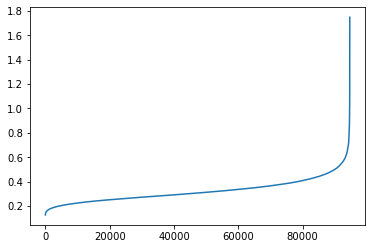

In [107]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(std_metric)
distances, _ = neigh.kneighbors(std_metric)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

# The elbow on this plot is around 0.5, so will try a eps around that value

In [99]:
outlier_detection = DBSCAN(eps = 0.45, n_jobs = -1)

clusters = outlier_detection.fit_predict(std_metric)

In [100]:
# '-1' are the ones classified as outliers
Counter(clusters)

Counter({0: 92776, -1: 1769, 1: 25, 7: 5, 2: 11, 3: 11, 5: 6, 4: 5, 6: 5})

In [101]:
# Get outlier mask for this method
outdbscan = pd.Series(data=(clusters==-1), index=std_metric.index)

### 8.4. Final Outlier removal

In [102]:
outlier_labels = pd.concat([outlier_labels['outyjstd'],
                            outlier_labels['outqtstd'],
                            outyjmah,
                            outqtmah,
                            outif,
                            outdbscan], axis=1)

outlier_labels.columns = ["outyjstd", "outqtstd", "outyjmah", "outqtmah", "outif", "outdbscan"]

In [103]:
pd.DataFrame(np.round(outlier_labels.mean()*100, 2), columns=["Percentage of potential outliers in each method"])

Percentage of potential outliers in each method
outyjstd                                              4.02
outqtstd                                              4.87
outyjmah                                              3.00
outqtmah                                              3.00
outif                                                 3.00
outdbscan                                             1.87

Table with the methods used in this stage, the number of True values necessary for the final mask to have a True and consider the record as an outlier, and the percentage of outliers removed:

| Labels                                    | # of Trues | % of Outliers |
|-------------------------------------------|------------|---------------|
| 1. all methods                            | 2          | 4.04          |
| 2. outyjstd, outqtstd, outyjmah, outqtmah | 2          | 2.65          |
| 3. outyjmah, outqtmah, outif, outdbscan   | 2          | 1.92          |
| 4. outyjstd, outqtstd, outif, outdbscan   | 2          | 2.93          |
| 5. outyjstd, outqtstd                     | 2          | 1.50          |
| 6. outyjmah, outqtmah                     | 1          | 5.78          |
| 7. outif, outdbscan                       | 1          | 4.04          |

In [104]:
outlier_mask_1 = outlier_labels.apply(lambda x: x.sum(), axis=1)>=2

# outlier_mask_2 = outlier_labels.drop(['outif', 'outdbscan'], axis=1)\
# .apply(lambda x: x.sum(), axis=1)>=2

# outlier_mask_3 = outlier_labels.drop(['outyjstd', 'outqtstd'], axis=1)\
# .apply(lambda x: x.sum(), axis=1)>=2

# outlier_mask_4 = outlier_labels.drop(['outyjmah', 'outqtmah'], axis=1)\
# .apply(lambda x: x.sum(), axis=1)>=2

# outlier_mask_5 = outlier_labels.drop(['outyjmah', 'outqtmah', 'outif', 'outdbscan'], axis=1)\
# .apply(lambda x: x.sum(), axis=1)==2

# outlier_mask_6 = outlier_labels.drop(['outyjstd', 'outqtstd', 'outif', 'outdbscan'], axis=1)\
# .apply(lambda x: x.sum(), axis=1)>=1

# outlier_mask_7 = outlier_labels.drop(['outyjstd', 'outqtstd', 'outyjmah', 'outqtmah'], axis=1)\
# .apply(lambda x: x.sum(), axis=1)>=1

Checking the results:

In [ ]:
sns.set(style="whitegrid")

# Prepare dataframe layout
plot_data = selected_vars[~outlier_mask_1].reset_index().melt("CONTROLN")
plot_features = selected_vars[~outlier_mask_1].reset_index().drop("CONTROLN",1).columns

#Prepare figure layout
fig, axes = plt.subplots(1, len(plot_features[:16]), figsize=(15,8), constrained_layout=True)
    
# Draw the boxplots
for i in zip(axes, plot_features[:16]):
    sns.boxplot(x="variable", y="value", data=plot_data.loc[plot_data["variable"]==i[1]], ax=i[0])
    i[0].set_xlabel("")
    i[0].set_ylabel("")

# Finalize the plot
plt.suptitle("Outlier removal box plots - part 1", fontsize=25)
sns.despine(bottom=True)

plt.show()

In [ ]:
sns.set(style="whitegrid")

# Prepare dataframe layout
plot_data = selected_vars[~outlier_mask_1].reset_index().melt("CONTROLN")
plot_features = selected_vars[~outlier_mask_1].reset_index().drop("CONTROLN",1).columns

#Prepare figure layout
fig, axes = plt.subplots(1, len(plot_features[16:]), figsize=(15,8), constrained_layout=True)
    
# Draw the boxplots
for i in zip(axes, plot_features[16:]):
    sns.boxplot(x="variable", y="value", data=plot_data.loc[plot_data["variable"]==i[1]], ax=i[0])
    i[0].set_xlabel("")
    i[0].set_ylabel("")

# Finalize the plot
plt.suptitle("Outlier removal box plots - part 2", fontsize=25)
sns.despine(bottom=True)

plt.show()

**Final decision:** <br>
We used mask 1 (outlier_mask_1), and also decided to delete the donor with a 600 on MAXRAMNT, as he/she was the only one that was very isolated from the rest of the distribution, even after the outlier removal.

In [105]:
#selected_vars without outliers
selected_vars_wo = data[selected_vars.columns][~outlier_mask_1][selected_vars['MAXRAMNT']<600]

data = data[~outlier_mask_1][selected_vars['MAXRAMNT']<600]

## 9. Missing Values

In [108]:
extra = data[social_features_extra + economic_features_extra + donation_features_extra][~outlier_mask_1].copy()

selected_vars = selected_vars_wo.merge(extra, on = 'CONTROLN')

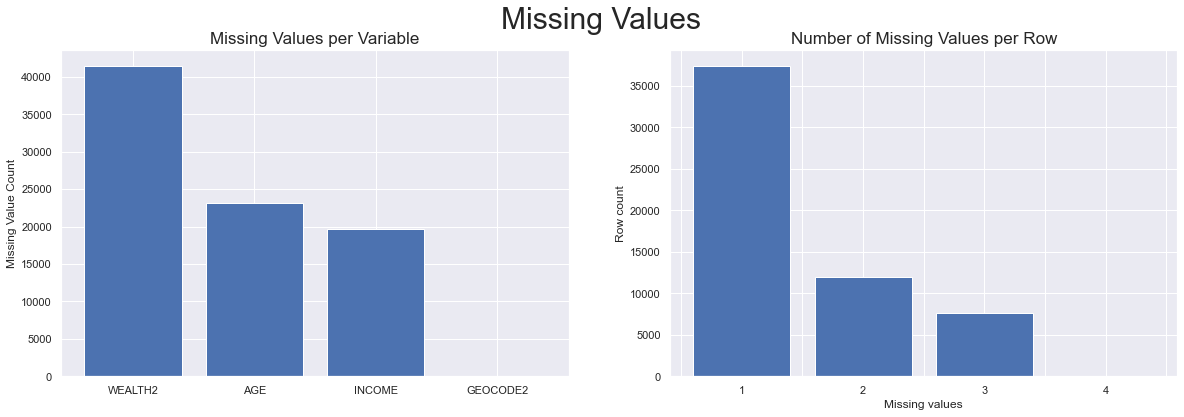

In [109]:
# Checking how many missing values exist
sns.set()

# Figure and axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

# Data
mv_vars=selected_vars.isna().sum().sort_values(ascending=False)[selected_vars.isna().sum()>0]
ax1.bar(x=mv_vars.index, height=mv_vars)
mv_rows=selected_vars.isna().apply(lambda x:sum(x), axis=1).value_counts().sort_index().drop(0, axis=0)
ax2.bar(x=mv_rows.index, height=mv_rows)

# Layout
plt.suptitle("Missing Values", fontsize=30)
ax1.set_ylabel("Missing Value Count")
ax1.set_title("Missing Values per Variable", fontsize=17)
ax1.get_xticklabels()
ax2.set_xlabel("Missing values")
ax2.set_ylabel("Row count")
ax2.set_xticklabels(["","",1,"",2,"",3,"",4])
ax2.set_title("Number of Missing Values per Row", fontsize=17)
plt.show()

In [370]:
non_metric_vars = selected_vars.loc[:, np.array(selected_vars.dtypes=="object")]
metric_vars = selected_vars.loc[:, ~selected_vars.columns.isin(non_metric_vars)]

### 9.1. Imputation for metric variables (DataWig)

In [111]:
# Variables with missing values
(round((metric_vars.isna().sum()[metric_vars.isna().sum()>0])/len(metric_vars),4)).sort_values(ascending = False)

AGE    0.2552
dtype: float64

In [112]:
# Metric variables with no missing values
metric_vars_without_mv = metric_vars.loc[:, metric_vars.isna().sum()==0]

#### 9.1.1.  Metric Variables with more than 40% missing values: DataWig

In [113]:
# Variables with more than 40% missing values
(round((metric_vars.isna().sum()[metric_vars.isna().sum()>0])/len(metric_vars),4))[(metric_vars.isna().sum()[metric_vars.isna().sum()>0])/len(metric_vars) > 0.4].sort_values(ascending = False)

Series([], dtype: float64)

#### 9.1.2. Metric Variables with less than 40% Missing Values

In [115]:
# Variables with less than 40% missing values
(round((metric_vars.isna().sum()[metric_vars.isna().sum()>0])/len(metric_vars),4))[(metric_vars.isna().sum()[metric_vars.isna().sum()>0])/len(metric_vars) < 0.4].sort_values(ascending = False)

AGE    0.2552
dtype: float64

In [116]:
# Seeing rows with NaNs
nans_index_metric = metric_vars.isna().any(axis=1)
metric_vars[nans_index_metric]['AGE']

CONTROLN
15078    NaN
47784    NaN
109359   NaN
75768    NaN
106016   NaN
          ..
132458   NaN
131980   NaN
47945    NaN
156106   NaN
184568   NaN
Name: AGE, Length: 23174, dtype: float64

In [118]:
#selected_vars.fillna(selected_vars.median(), inplace=True)

# IMPUTE: AGE
# Merge column to be imputed with the numeric variables
imp_age = pd.merge(metric_vars_without_mv, metric_vars['AGE'], left_on='CONTROLN', right_on='CONTROLN')

# TRAIN: age without Missing Values
imp_age_train = imp_age[~imp_age.isna().any(axis=1)]

# TEST: age with Missing Values
imp_age_test = imp_age[imp_age.isna().any(axis=1)]

# Impute NaN's with datawig
imputer = datawig.SimpleImputer(
    input_columns= metric_vars_without_mv.columns,
    output_column='AGE')

imputer.fit(imp_age_train)

# Replace in data the NaN's with imputed values - rounded!
metric_vars.loc[metric_vars['AGE'].isna()==True,'AGE'] = round(imputer.predict(imp_age_test)['AGE_imputed'], 0)

2020-12-28 09:39:39,065 [INFO]  
========== start: fit model
2020-12-28 09:39:39,065 [WARNING]  Already bound, ignoring bind()
2020-12-28 09:39:41,192 [INFO]  Epoch[0] Batch [0-1902]	Speed: 15412.47 samples/sec	cross-entropy=14.299972	AGE-accuracy=0.000000
2020-12-28 09:39:43,283 [INFO]  Epoch[0] Train-cross-entropy=14.227252
2020-12-28 09:39:43,283 [INFO]  Epoch[0] Train-AGE-accuracy=0.000000
2020-12-28 09:39:43,283 [INFO]  Epoch[0] Time cost=4.194
2020-12-28 09:39:43,295 [INFO]  Saved checkpoint to "age\model-0000.params"
2020-12-28 09:39:43,489 [INFO]  Epoch[0] Validation-cross-entropy=14.215257
2020-12-28 09:39:43,490 [INFO]  Epoch[0] Validation-AGE-accuracy=0.000000
2020-12-28 09:39:45,653 [INFO]  Epoch[1] Batch [0-1902]	Speed: 14086.52 samples/sec	cross-entropy=13.984466	AGE-accuracy=0.000000
2020-12-28 09:39:47,912 [INFO]  Epoch[1] Train-cross-entropy=14.009415
2020-12-28 09:39:47,913 [INFO]  Epoch[1] Train-AGE-accuracy=0.000000
2020-12-28 09:39:47,914 [INFO]  Epoch[1] Time cost

2020-12-28 09:40:46,663 [INFO]  Saved checkpoint to "age\model-0014.params"
2020-12-28 09:40:46,840 [INFO]  Epoch[14] Validation-cross-entropy=14.093741
2020-12-28 09:40:46,841 [INFO]  Epoch[14] Validation-AGE-accuracy=0.000000
2020-12-28 09:40:48,671 [INFO]  Epoch[15] Batch [0-1902]	Speed: 16658.80 samples/sec	cross-entropy=13.633909	AGE-accuracy=0.000000
2020-12-28 09:40:50,509 [INFO]  Epoch[15] Train-cross-entropy=13.712968
2020-12-28 09:40:50,510 [INFO]  Epoch[15] Train-AGE-accuracy=0.000000
2020-12-28 09:40:50,511 [INFO]  Epoch[15] Time cost=3.668
2020-12-28 09:40:50,515 [INFO]  Saved checkpoint to "age\model-0015.params"
2020-12-28 09:40:50,698 [INFO]  Epoch[15] Validation-cross-entropy=14.081362
2020-12-28 09:40:50,698 [INFO]  Epoch[15] Validation-AGE-accuracy=0.000000
2020-12-28 09:40:52,873 [INFO]  Epoch[16] Batch [0-1902]	Speed: 13990.70 samples/sec	cross-entropy=13.622614	AGE-accuracy=0.000000
2020-12-28 09:40:54,754 [INFO]  Epoch[16] Train-cross-entropy=13.701006
2020-12-28

### 9.2. Imputation for non-metric variables (DataWig and Mode)

In [371]:
# Variables with Missing Values
(round((non_metric_vars.isna().sum()[non_metric_vars.isna().sum()>0])/len(non_metric_vars),4)).sort_values(ascending = False)

WEALTH2     0.4571
INCOME      0.2165
GEOCODE2    0.0008
dtype: float64

#### 9.2.1. Non Metric Variables 'WEALTH2', 'INCOME' : DataWig

In [372]:
# Seeing rows with NaNs
nans_index_non = non_metric_vars.isna().apply(lambda x: x.any(), axis=1)
non_metric_vars[nans_index_non][['WEALTH2', 'INCOME', 'GEOCODE2']].head()

WEALTH2 INCOME GEOCODE2
CONTROLN                        
95515          5    NaN        C
7112         NaN      3        A
47784        NaN    NaN        C
109359       NaN      2        C
49909          9    NaN        B

In [373]:
# IMPUTE: WEALTH2
# Merge column to be imputed with the numeric variables
imp_wealth2 = pd.merge(metric_vars_without_mv, non_metric_vars['WEALTH2'], left_on='CONTROLN', right_on='CONTROLN')

# TRAIN: WEALTH2 without Missing Values
imp_wealth2_train = imp_wealth2[~imp_wealth2.isna().any(axis=1)]

# TEST: WEALTH2 with Missing Values
imp_wealth2_test = imp_wealth2[imp_wealth2.isna().any(axis=1)]

# Impute NaN's with datawig
imputer = datawig.SimpleImputer(
    input_columns= metric_vars_without_mv.columns,
    output_column='WEALTH2')

imputer.fit(imp_wealth2_train)

# Replace in data the NaN's with imputed values
non_metric_vars.loc[non_metric_vars['WEALTH2'].isna()==True,'WEALTH2'] = imputer.predict(imp_wealth2_test)['WEALTH2_imputed']

INFO:root:
========== start: fit model
INFO:root:Epoch[0] Batch [0-1387]	Speed: 10434.90 samples/sec	cross-entropy=1.775912	WEALTH2-accuracy=0.294353
INFO:root:Epoch[0] Train-cross-entropy=1.757500
INFO:root:Epoch[0] Train-WEALTH2-accuracy=0.303642
INFO:root:Epoch[0] Time cost=4.632
INFO:root:Saved checkpoint to "wealth2\model-0000.params"
INFO:root:Epoch[0] Validation-cross-entropy=1.714478
INFO:root:Epoch[0] Validation-WEALTH2-accuracy=0.312905
INFO:root:Epoch[1] Batch [0-1387]	Speed: 10719.49 samples/sec	cross-entropy=1.714739	WEALTH2-accuracy=0.319705
INFO:root:Epoch[1] Train-cross-entropy=1.715096
INFO:root:Epoch[1] Train-WEALTH2-accuracy=0.321448
INFO:root:Epoch[1] Time cost=3.974
INFO:root:Saved checkpoint to "wealth2\model-0001.params"
INFO:root:Epoch[1] Validation-cross-entropy=1.700162
INFO:root:Epoch[1] Validation-WEALTH2-accuracy=0.332322
INFO:root:Epoch[2] Batch [0-1387]	Speed: 11456.88 samples/sec	cross-entropy=1.700217	WEALTH2-accuracy=0.334339
INFO:root:Epoch[2] Train-c

In [374]:
# IMPUTE: INCOME
# Merge column to be imputed with the numeric variables
imp_income = pd.merge(metric_vars_without_mv, non_metric_vars['INCOME'], left_on='CONTROLN', right_on='CONTROLN')

# TRAIN: INCOME without Missing Values
imp_income_train = imp_income[~imp_income.isna().any(axis=1)]

# TEST: INCOME with Missing Values
imp_income_test = imp_income[imp_income.isna().any(axis=1)]

# Impute NaN's with datawig
imputer = datawig.SimpleImputer(
    input_columns= metric_vars_without_mv.columns,
    output_column='INCOME')

imputer.fit(imp_income_train)

# Replace in data the NaN's with imputed values
non_metric_vars.loc[non_metric_vars['INCOME'].isna()==True,'INCOME'] = imputer.predict(imp_income_test)['INCOME_imputed']

#### 9.2.2. Non Metric Variables 'GEOCODE2' : Mode

In [388]:
# IMPUTE: GEOCODE2
imputer_GEO = SimpleImputer(strategy="most_frequent")
imputer_GEO.fit(non_metric_vars)
imputer_GEO = imputer_GEO.transform(non_metric_vars)

In [389]:
non_metric_vars = pd.DataFrame(imputer_GEO, columns=non_metric_vars.columns, index=non_metric_vars.index)

## 10. Feature Engineering (repeated on purpose)

In [446]:
all_vars = non_metric_vars.merge(metric_vars, on = 'CONTROLN')

In [447]:
# CARDPROM was already dropped
# For this, we used data (without the outliers), because CARPROM was dropped due to correlations 
# and since it had no missing values, this could be done
all_vars['CARDPROM_AVG'] = data['CARDPROM'] / (data['ODATEDW_days'] / 30 / 12)

all_vars['NUMPROM_AVG'] = all_vars['NUMPROM'] / (all_vars['ODATEDW_days'] / 30 / 12)

all_vars['RAMNTALL_AVG'] = all_vars['RAMNTALL'] / (all_vars['ODATEDW_days'] / 30 / 12)

all_vars['NGIFTALL_AVG'] = all_vars['NGIFTALL'] / (all_vars['ODATEDW_days'] / 30 / 12)

# CARDGIFT was already dropped
# For this, we used data (without the outliers) because CARDGIFT was dropped due to correlations 
# and since it had no missing values, this could be done
all_vars['CARDGIFT_AVG'] = data['CARDGIFT'] / (data['ODATEDW_days'] / 30 / 12)

all_vars['TIMELAG2'] = all_vars['ODATEDW_days'] - all_vars['LASTDATE_days']

## 11. Data Cleaning Validation

Check boxplots and correlations, again, after the Data Cleaning phase is finished. Data Cleaning included Coherence Checking, Outliers, Missing Values and Feature Engineering.

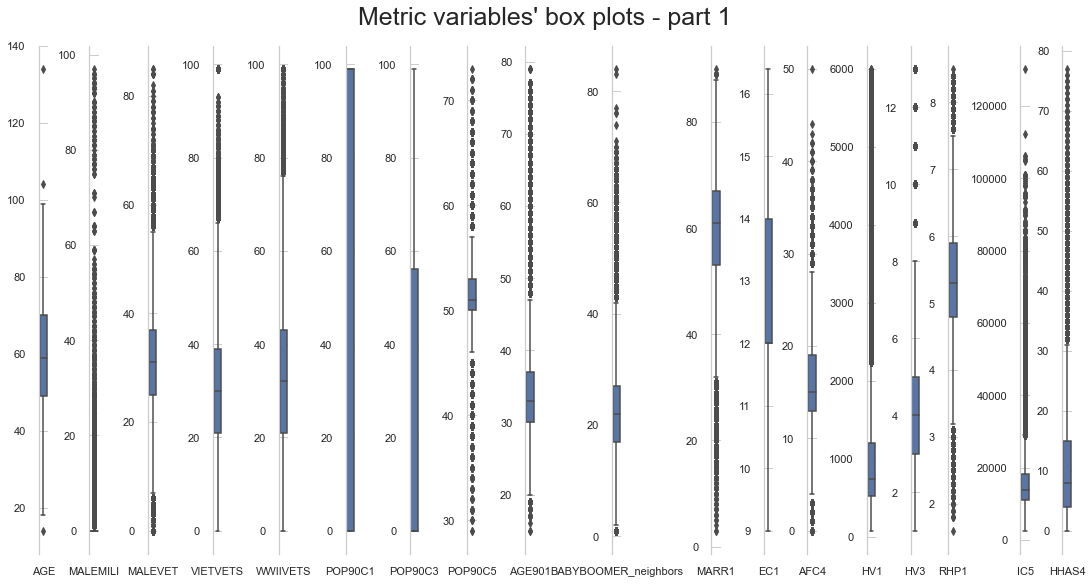

In [847]:
# Metric Variables Boxplots - part 1 
sns.set(style="whitegrid")

# Prepare dataframe layout
plot_data = all_vars[social_features+economic_features+donation_features].reset_index().melt("CONTROLN")
plot_features = all_vars[social_features+economic_features+donation_features].reset_index().drop("CONTROLN",1).columns

# Prepare figure layout
fig, axes = plt.subplots(1, len(plot_features[:18]), figsize=(15,8), constrained_layout=True)
    
# Draw the boxplots
for i in zip(axes, plot_features[:18]):
    sns.boxplot(x="variable", y="value", data=plot_data.loc[plot_data["variable"]==i[1]], ax=i[0])
    i[0].set_xlabel("")
    i[0].set_ylabel("")

# Finalize the plot
plt.suptitle("Metric variables' box plots - part 1", fontsize=25)
sns.despine(bottom=True)

plt.show()

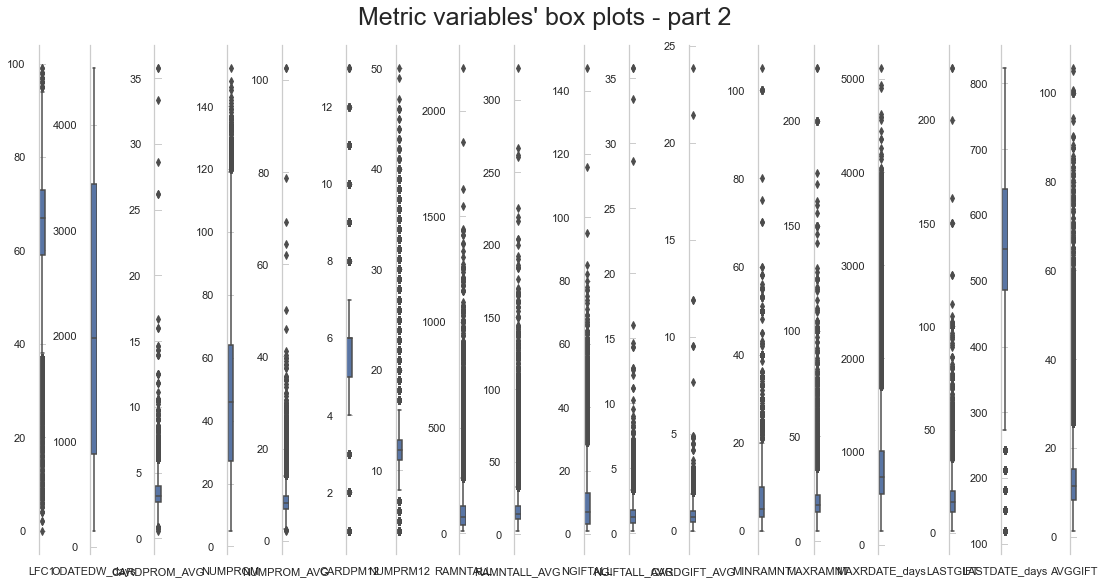

In [848]:
# Metric Variables Boxplots - part 2
sns.set(style="whitegrid")

# Prepare dataframe layout
plot_data = all_vars[social_features+economic_features+donation_features].reset_index().melt("CONTROLN")
plot_features = all_vars[social_features+economic_features+donation_features].reset_index().drop("CONTROLN",1).columns

# Prepare figure layout
fig, axes = plt.subplots(1, len(plot_features[18:]), figsize=(15,8), constrained_layout=True)
    
# Draw the boxplots
for i in zip(axes, plot_features[18:]):
    sns.boxplot(x="variable", y="value", data=plot_data.loc[plot_data["variable"]==i[1]], ax=i[0])
    i[0].set_xlabel("")
    i[0].set_ylabel("")

# Finalize the plot
plt.suptitle("Metric variables' box plots - part 2", fontsize=25)
sns.despine(bottom=True)

plt.show()

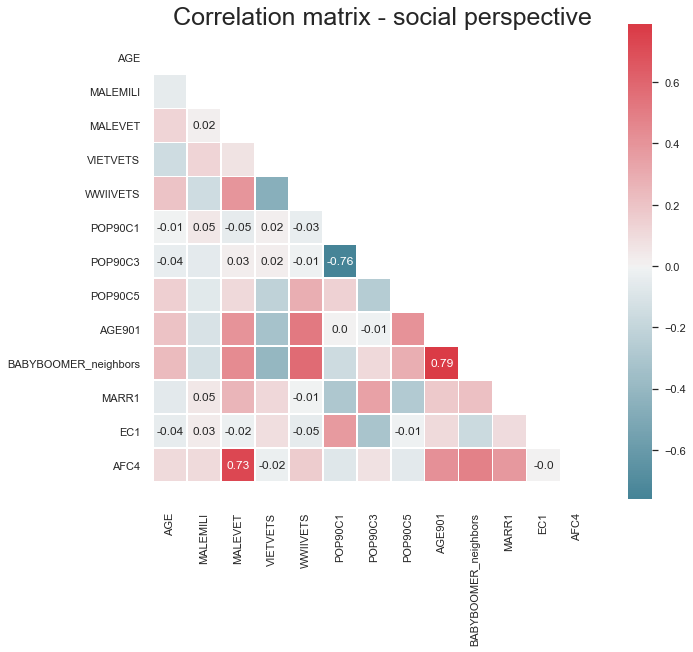

In [830]:
sns.set(style="white")

# Compute the correlation matrix
corr = all_vars[social_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) # Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True # The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Return a matplotlib colormap object.

# Pass 2D Numpy array to annot parameter
mask_annot = (np.absolute(corr.values)>=0.70) | (np.absolute(corr.values)<=0.05) # Annotate correlations above abs(0.7) or below abs(0.05)
annot_arr = np.where(mask_annot, corr.values.round(2), np.full((13,13),""))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, mask=mask, linewidths=.5, ax=ax, annot=annot_arr, fmt="s")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix - social perspective", fontsize=25)
plt.yticks(rotation=0)

# Fixing a bug
b, t = plt.ylim() # Discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # Update the ylim(bottom, top) values
plt.show()

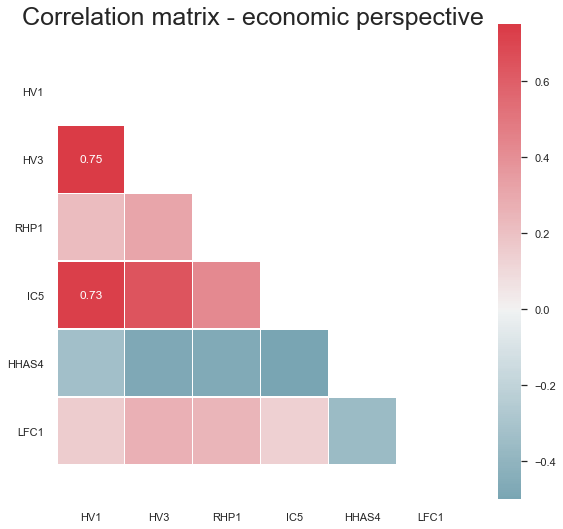

In [832]:
sns.set(style="white")

# Compute the correlation matrix
corr = all_vars[economic_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) # Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True # The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Return a matplotlib colormap object.

# Pass 2D Numpy array to annot parameter
mask_annot = (np.absolute(corr.values)>=0.70) | (np.absolute(corr.values)<=0.05) # Annotate correlations above abs(0.7) or below abs(0.05)
annot_arr = np.where(mask_annot, corr.values.round(2), np.full((6,6),""))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, mask=mask, linewidths=.5, ax=ax, annot=annot_arr, fmt="s")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix - economic perspective", fontsize=25)
plt.yticks(rotation=0)

# Fixing a bug
b, t = plt.ylim() # Discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # Update the ylim(bottom, top) values
plt.show()

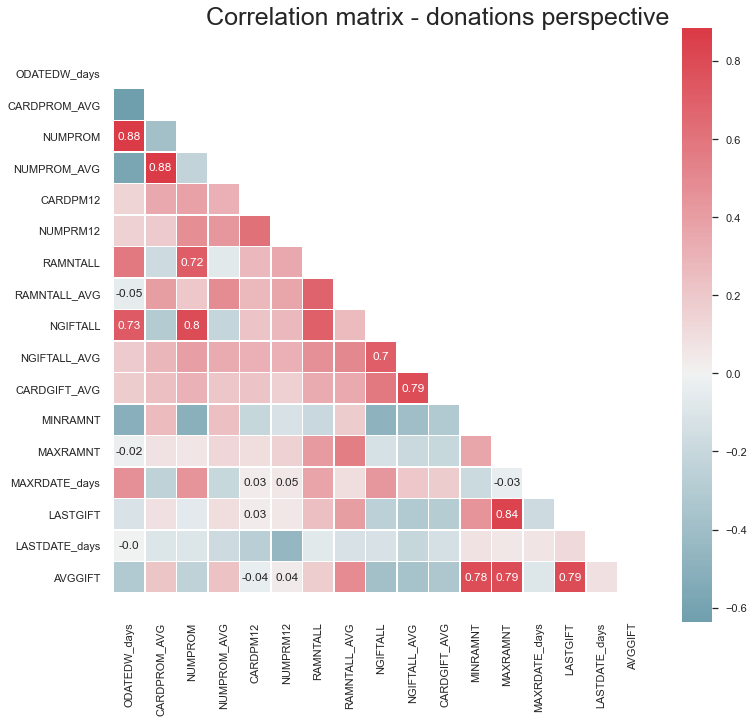

In [834]:
sns.set(style="white")

# Compute the correlation matrix
corr = all_vars[donation_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) # Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True # The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Return a matplotlib colormap object.

# Pass 2D Numpy array to annot parameter
mask_annot = (np.absolute(corr.values)>=0.70) | (np.absolute(corr.values)<=0.05) # Annotate correlations above abs(0.7) or below abs(0.05)
annot_arr = np.where(mask_annot, corr.values.round(2), np.full((17,17),""))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, mask=mask, linewidths=.5, ax=ax, annot=annot_arr, fmt="s")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix - donations perspective", fontsize=25)
plt.yticks(rotation=0)

# Fixing a bug
b, t = plt.ylim() # Discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # Update the ylim(bottom, top) values
plt.show()

## 12. Final Feature Selection

In [448]:
# Also, separate between LAPSED_OR_RECENT and the rest
all_vars_lapsed = all_vars[data['LAPSED_OR_RECENT']=='1']
all_vars_nonlapsed = all_vars[data['LAPSED_OR_RECENT']=='0']

In [452]:
# Standardize input data because we want every one of them to have the same importance
scaler = MinMaxScaler()
all_vars_lapsed_std = pd.DataFrame(scaler.fit_transform(all_vars_lapsed.drop(columns=social_features_extra+economic_features_extra+donation_features_extra)), 
                                   index=all_vars_lapsed.drop(columns=social_features_extra+economic_features_extra+donation_features_extra).index, 
                                   columns=all_vars_lapsed.drop(columns=social_features_extra+economic_features_extra+donation_features_extra).columns)

In [453]:
# all_vars_lapsed with standardized data
all_vars_lapsed = all_vars_lapsed_std.merge(all_vars_lapsed[social_features_extra+economic_features_extra+donation_features_extra], on = 'CONTROLN')

In [454]:
# Separate dataframes
data_social = all_vars_lapsed[social_features + social_features_extra].copy()
data_eco = all_vars_lapsed[economic_features + economic_features_extra].copy()
data_donation = all_vars_lapsed[donation_features + donation_features_extra].copy()

### 12.1. Assess feature importance: Using the R²

In [269]:
def get_ss(df):
    """
    Computes the sum of squares for all variables given a dataset.
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss # Return sum of sum of squares of each df variable

In [270]:
def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst

In [271]:
def get_r2_scores(df, clusterer, min_k=2, max_k=11):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust

In [280]:
def kmeans_FS(df):
    # Set up the clusterer
    kmeans = KMeans(
        n_clusters=2000,
        init='k-means++',
        n_init=10,
        random_state=42
    )

    # Get cluster labels
    km_labels = kmeans.fit_predict(df)
    
    # Dataframe to put the labels on
    kmeans_df = df.copy()
    
    # Characterizing the final clusters
    df_merge_km = kmeans_df.merge(pd.Series(km_labels, name='labels', index=kmeans_df.index), on='CONTROLN')
    
    # Get the centroids of each cluster given by K-means
    kmeans_2000 = df_merge_km.groupby('labels').mean()
    
    return kmeans_2000

In [281]:
def r_sq_plot(df):
    r2_scores = {}

    hierarchical = AgglomerativeClustering(affinity='euclidean')
    
    # Doing hierarchical on top of the K-means
    for linkage in ['complete', 'average', 'single', 'ward']:
        r2_scores[linkage] = get_r2_scores(
            df, hierarchical.set_params(linkage=linkage)
        )

    # Visualizing the R² scores for each cluster solution
    pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

    plt.title("R² plot for various clustering methods\n", fontsize=21)
    plt.legend(title="Cluster methods", title_fontsize=11)
    plt.xlabel("Number of clusters", fontsize=13)
    plt.ylabel("R² metric", fontsize=13)
    plt.show()

In [274]:
def get_ss_variables(df):
    """
    Get the SS for each variable.
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

In [275]:
def r2_variables(df, labels):
    """
    Get the R² for each variable.
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

#### 12.1.1. Social Perspective

In [306]:
# K-means on data_social
kmeans_2000_social = kmeans_FS(data_social.drop(columns=social_features_extra))

Checking how many clusters to keep and the best method.

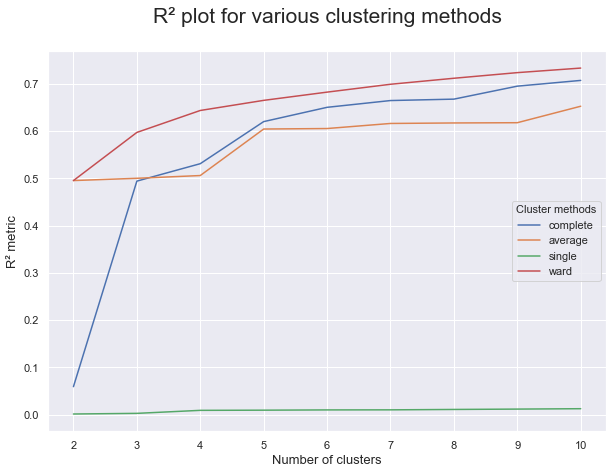

In [307]:
# Data Social Perspective
r_sq_plot(kmeans_2000_social)

In [308]:
hclust_social = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)

hclust_labels_social = hclust_social.fit_predict(kmeans_2000_social)

In [309]:
df_merge_h_social = kmeans_2000_social.merge(pd.Series(hclust_labels_social, name='h_labels', 
                                                       index=kmeans_2000_social.index), on = 'labels')

In [310]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df_merge_h_social, 'h_labels').drop('h_labels').sort_values(ascending=False)

POP90C1                 0.948101
POP90C3                 0.888630
MARR1                   0.121909
EC1                     0.080763
POP90C5                 0.061004
AFC4                    0.021406
BABYBOOMER_neighbors    0.014393
AGE                     0.004428
MALEVET                 0.004406
MALEMILI                0.002355
WWIIVETS                0.001419
VIETVETS                0.000489
AGE901                  0.000393
dtype: float64

POP90C1 and POP90C3 have only very high values (1) or very low values (0), that's why their R-square is so high. We will try without those two.

In [329]:
# K-means on data_social without the 2 variables
kmeans_2000_social_2 = kmeans_FS(data_social.drop(columns=['POP90C1', 'POP90C3']+social_features_extra))

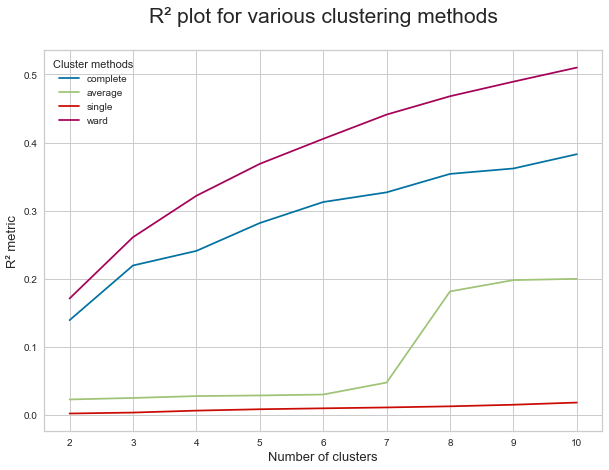

In [331]:
# Data Social Perspective
r_sq_plot(kmeans_2000_social_2)

In [332]:
hclust_social_2 = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)

hclust_labels_social_2 = hclust_social_2.fit_predict(kmeans_2000_social_2)

In [333]:
df_merge_h_social_2 = kmeans_2000_social_2.merge(pd.Series(hclust_labels_social_2, name='h_labels', 
                                                           index=kmeans_2000_social_2.index), on = 'labels')

In [334]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df_merge_h_social_2, 'h_labels').drop('h_labels').sort_values(ascending=False)

EC1                     0.430079
BABYBOOMER_neighbors    0.418594
AGE901                  0.405430
WWIIVETS                0.348958
MALEVET                 0.268272
AFC4                    0.179033
VIETVETS                0.111302
POP90C5                 0.094069
MARR1                   0.054853
AGE                     0.053022
MALEMILI                0.043946
dtype: float64

This gives much more acceptable results.

#### 12.1.2. Economic Perspective

In [314]:
# K-means on data_eco
kmeans_2000_eco = kmeans_FS(data_eco.drop(columns=economic_features_extra))

Checking how many clusters to keep and the best method.

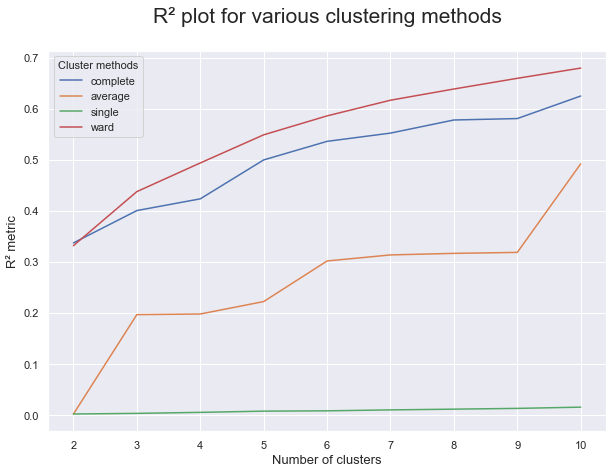

In [315]:
# Data Economic Perspective
r_sq_plot(kmeans_2000_eco)

In [316]:
hclust_eco = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)

hclust_labels_eco = hclust_eco.fit_predict(kmeans_2000_eco)

In [317]:
df_merge_h_eco = kmeans_2000_eco.merge(pd.Series(hclust_labels_eco, name='h_labels', 
                                                 index=kmeans_2000_eco.index), on = 'labels')

In [318]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df_merge_h_eco, 'h_labels').drop('h_labels').sort_values(ascending=False)

HV1      0.673260
HV3      0.554571
IC5      0.481621
RHP1     0.244636
HHAS4    0.233718
LFC1     0.030935
dtype: float64

#### 12.1.3. Donation Perspective

In [288]:
# K-means on data_donation
kmeans_2000_donation = kmeans_FS(data_donation.drop(columns=donation_features_extra))

Checking how many clusters to keep and the best method.

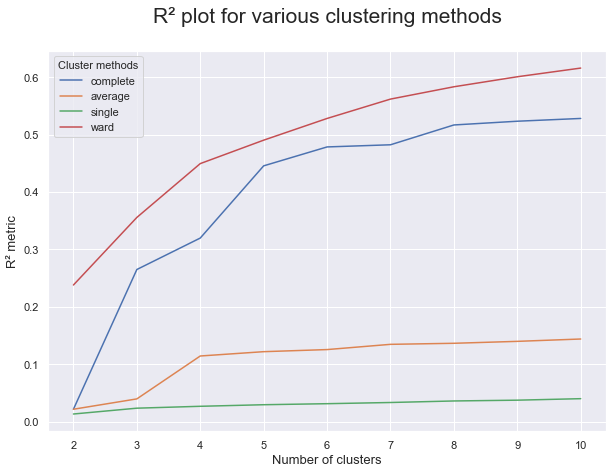

In [289]:
# Data Donation Perspective
r_sq_plot(kmeans_2000_donation)

In [290]:
hclust_donation = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=4
)

hclust_labels_donation = hclust_donation.fit_predict(kmeans_2000_donation)

In [302]:
df_merge_h_donation = kmeans_2000_donation.merge(pd.Series(hclust_labels_donation, name='h_labels', 
                                                index=kmeans_2000_donation.index), on = 'labels')

In [305]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df_merge_h_donation, 'h_labels').drop('h_labels').sort_values(ascending=False)

ODATEDW_days     0.633283
AVGGIFT          0.615945
LASTDATE_days    0.553542
MAXRAMNT         0.536801
LASTGIFT         0.517049
NUMPROM          0.491448
MINRAMNT         0.337914
NGIFTALL         0.313655
NUMPRM12         0.254151
RAMNTALL         0.238773
RAMNTALL_AVG     0.230460
MAXRDATE_days    0.212148
CARDPROM_AVG     0.089769
NUMPROM_AVG      0.086390
CARDPM12         0.084253
NGIFTALL_AVG     0.007181
CARDGIFT_AVG     0.006284
dtype: float64

### 12.2. Selection for each perspective

We drop the variables that have lowest R-square on the tables above, thus, the ones that have less feature importance for clustering. However, we will keep some for the "extra" variables, as they might still be useful to interpret the clusters after the algorithm is applied.

In [455]:
# Social Perspective - The first 5 variables on the R-square rank will be used for the cluster analysis
social_features_extra = social_features_extra + ['MARR1', 'AGE', 'MALEMILI']
data_social = data_social.drop(columns=['AFC4', 'VIETVETS', 'POP90C5'] + ['POP90C1', 'POP90C3']) # The POP features need to
                                                                                                 # be dropped

In [456]:
# Economic Perspective - The first 5 variables on the R-square rank will be used for the cluster analysis
economic_features_extra = economic_features_extra + ['LFC1']

In [457]:
# Donation Perspective - The first 6 variables on the R-square rank will be used for the cluster analysis
donation_features_extra = donation_features_extra + ['NGIFTALL', 'RAMNTALL_AVG']
data_donation = data_donation.drop(columns=['MINRAMNT', 'NUMPRM12', 'RAMNTALL', 'MAXRDATE_days', 'CARDPROM_AVG',
                                           'NUMPROM_AVG', 'CARDPM12', 'NGIFTALL_AVG', 'CARDGIFT_AVG'])

### 12.3. Encoding of the non-metric variables that were selected

In [461]:
# Social Perspective 
df_ohc = data_social.copy()
ohc = prep.OneHotEncoder(sparse=False, dtype=int)
ohc_feat = ohc.fit_transform(df_ohc[['GENDER', 'GEOCODE2']])
ohc_feat_names = ohc.get_feature_names(df_ohc[['GENDER', 'GEOCODE2']].columns)
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)

In [463]:
data_social=data_social.merge(ohc_df, on='CONTROLN').drop(columns=['GENDER', 'GEOCODE2'])

In [464]:
social_features_extra=social_features_extra + list(ohc_df.columns)

In [465]:
social_features_extra.remove('GENDER')
social_features_extra.remove('GEOCODE2')

In [466]:
# Economic Perspective 
df_ohc = data_eco.copy()
ohc = prep.OneHotEncoder(sparse=False, dtype=int)
ohc_feat = ohc.fit_transform(df_ohc[['INCOME', 'WEALTH2']])
ohc_feat_names = ohc.get_feature_names(df_ohc[['INCOME', 'WEALTH2']].columns)
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)

In [471]:
data_eco=data_eco.merge(ohc_df, on='CONTROLN').drop(columns=['INCOME', 'WEALTH2'])

In [472]:
economic_features_extra=economic_features_extra + list(ohc_df.columns)

In [474]:
economic_features_extra.remove('INCOME')
economic_features_extra.remove('WEALTH2')

In [476]:
# Donation Perspective - All object variables are already binary, so there's no need to OneHotEncode

## 13. Cluster Analysis

### 13.1. Functions

The functions defined above, on 12.1., are related to Hierarchical Clustering and may also be reused on this Cluster Analysis.

In [477]:
def kelbowplots(clus, data):
    """
    This function produces the k-elbow plot for a given clustering estimator according to 2 quality measures: 
    Silhouette and Calinski Harabasz.
    """
    sns.set()
    fig, axes = plt.subplots(1, 2, figsize=(15,6))

    # Plot the data
    metrics = ["silhouette", "calinski_harabasz"]
    ylabels = ["Silhouette", "Calinski and Harabasz"]
    titles = ["Silhouette measure plot", "Calinski and Harabasz measure plot"]
    for ax, m, ylabel, title in zip(axes.flatten(), metrics, ylabels, titles):
        # KElbowVisualizer produces the elbow plot for several quality measures
        KElbowVisualizer(clus, metric=m, timings=False, locate_elbow=True, ax=ax).fit(data)
        ax.set_ylabel(ylabel, fontsize=12)
        ax.set_xlabel("Number of clusters", fontsize=12)
        ax.set_title(title, fontsize=12)

    # Top title
    plt.suptitle("K-Elbow Plots", fontsize=20)

    plt.show()

In [494]:
def silhouette_analysis(df, estimator, shape, figsize, max_nclus, min_nclus=2, dist="euclidean"):
    """
    This function builds the Silhouette plots for a given range of cluster solutions. This is useful to find out the 
    most appropriate number of clusters.
    """
    range_n_clusters = list(range(min_nclus, max_nclus+1))
    
    sns.set()
    fig, axes = plt.subplots(nrows=shape[0], ncols=shape[1], figsize=figsize)
    
    if len(range_n_clusters)==1: # In case we want to seed the silhouette for just one cluster solution
        axes_final = [axes]
    else:
        axes_final = axes.flatten()
        
    n = []
    avgs = []
    for ax, n_clusters in zip(axes_final, range_n_clusters):
        # Get parameter that defines number of clusters
        if "n_clusters" in estimator.get_params():
            param = "n_clusters"

        else:
            print("Estimator has no parameter to define number of clusters")
            return None # To stop if this happens
        
        # Get the cluster labels by applying the algorithm
        clustering = estimator.set_params(**{param:n_clusters}) # Set the parameters of the estimator
        labels = clustering.fit_predict(df)
        
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        n.append(n_clusters)
        silhouette_avg = silhouette_score(df, labels, metric=dist)
        avgs.append(silhouette_avg)
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df, labels, metric=dist)
        
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
            ith_cluster_silhouette_values.sort()

            # Get y_upper to demarcate silhouette y range size
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # Filling the silhouette
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        
        ax.set_title("{} Clusters".format(n_clusters), fontsize=13)
        
        ax.set_xlabel("The silhouette coefficient values")
        ax.set_ylabel("Cluster label")
        
        ax.set_yticks([]) # Clear the y axis labels / ticks
        ax.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette") 
        # The vertical line for average silhouette score of all the values
    
    plt.subplots_adjust(hspace=0.35)
    plt.suptitle(("Clustering Silhouette Plots"), fontsize=23)
    plt.show()
    
    for i in range(len(n)):
        print(f"For n_clusters = {n[i]}, the average silhouette_score is: {round(avgs[i], 4)}")

In [479]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

### 13.2. Social Perspective

#### 13.2.1. K-means

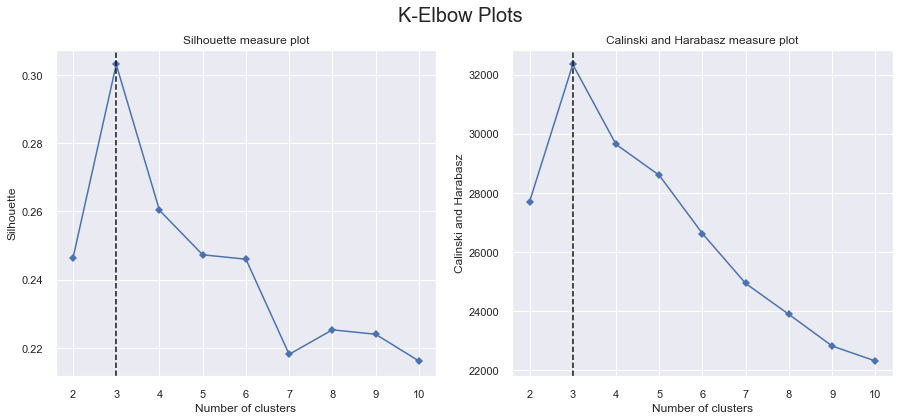

In [482]:
# Instantiate a K-Means model
clus_estim = KMeans(random_state=42) # Default is already 'k-means++' on init, and 10 on n_init, which is good

# K-elbow plots
kelbowplots(clus_estim, data_social.drop(columns=social_features_extra))

The measures represented above help us assess how many clusters we should retain. Here, we are using 2 quality measures: Silhouette score, and Calisnki and Harabasz score. These represent the mean ratio of intra-cluster and nearest-cluster distance, and ratio of within to between cluster dispersion, respectively, and their values should be high.

In this case, we agree with the elbows located by the KElbowVisualizer function, because at 3 clusters there is an elbow (the highest value in both measures is reached at that point), and after that we can clearly see a steep drop in quality and performance.

Besides, we should also try to find a relatively small number of clusters, as it becomes increasingly hard to interpret and deal with larger numbers.

We will complement this analysis with the visualization of the Silhouette Plots, to get a better understanding of the quality of this cluster analysis with 2, 3, 4 or 5 clusters.

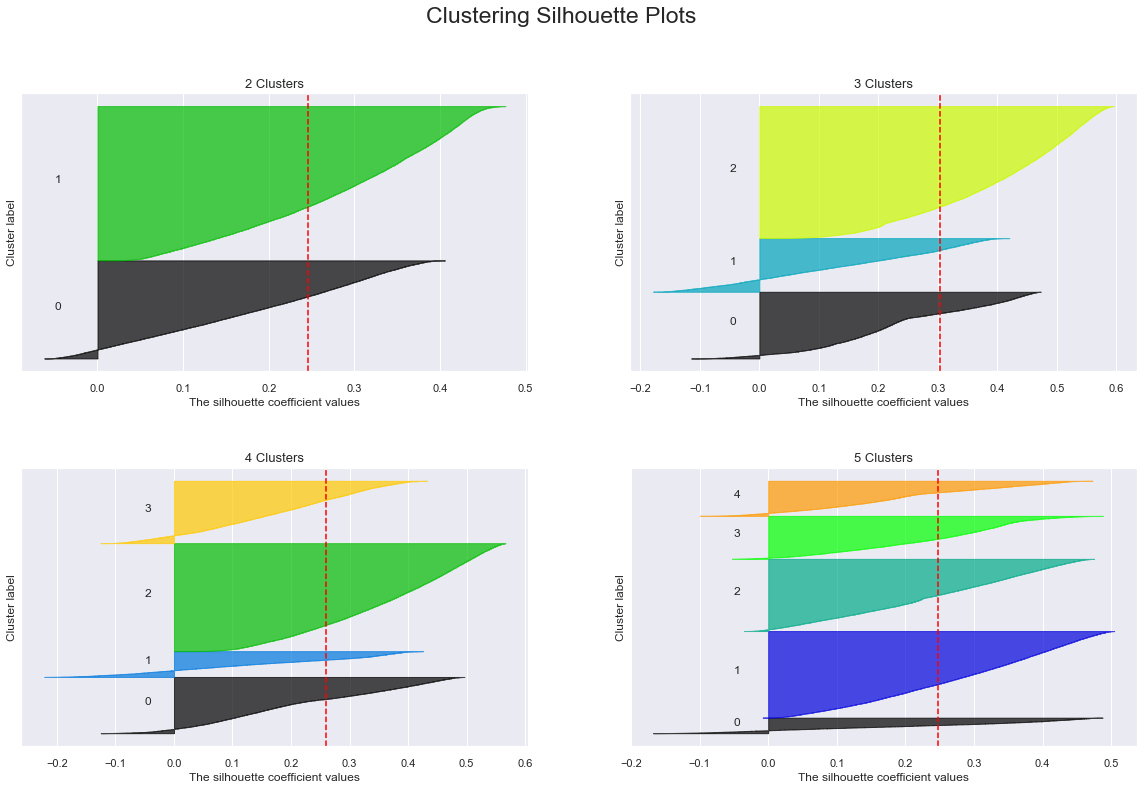

For n_clusters = 2, the average silhouette_score is: 0.2463
For n_clusters = 3, the average silhouette_score is: 0.303
For n_clusters = 4, the average silhouette_score is: 0.2603
For n_clusters = 5, the average silhouette_score is: 0.2473


In [495]:
kmeans = KMeans(random_state=42)
silhouette_analysis(data_social.drop(columns=social_features_extra), kmeans, (2,2), (20,12), max_nclus=6)

"Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]." (from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

It is also important to note that negative values on the scores indicate that those samples might have been assigned to the wrong cluster.

From these plots, we visualize that 2 clusters seems to have a good definition, but according to the elbow plots it would not make as much sense to select that number of clusters.

Thus, we conclude that the 3 clusters solution is the most appropriate, as it has the highest Silhouette score, Calinski and Harabasz score, and it also produces good results on the Silhouette plot.

In [496]:
# Perform k-means
model_km_social = KMeans(3, random_state=42)
model_km_social.fit(data_social.drop(columns=social_features_extra))
clust_labels_km_social = model_km_social.predict(data_social.drop(columns=social_features_extra))
cent_km_social = model_km_social.cluster_centers_

In [497]:
# Appending the cluster labels to a new dataframe
kmeans_social_df = data_social.copy()
kmeans_social_df["k_means_labels"] = clust_labels_km_social

#### 13.2.2. K-means and Hierarchical Clustering

In this section we will apply the K-means algorithm together with the Hierarchical clustering algorithm.

We will first perform a k-means in order to reduce the number of observations to a smaller number (500 centroids) and then we will perform Hierarchical Clustering, to find out the appropriate cluster solution, without having to define the number of clusters.

In [502]:
# First, perform k-means with a high n_clusters (500)
model_km_hc_social = KMeans(500, random_state=42)
model_km_hc_social.fit(data_social.drop(columns=social_features_extra))
clust_labels_km_hc_social = model_km_hc_social.predict(data_social.drop(columns=social_features_extra))
cent_km_hc_social = model_km_hc_social.cluster_centers_

In [518]:
# Appending the cluster labels to a new dataframe
kmeans_hc_social_df = data_social.copy()
kmeans_hc_social_df["k_means_hc_labels"] = clust_labels_km_hc_social

In [520]:
# Getting the centroids of each cluster given by the K-means
kmeans_hc_social_centroids = kmeans_hc_social_df.drop(columns=social_features_extra).groupby("k_means_hc_labels").mean()

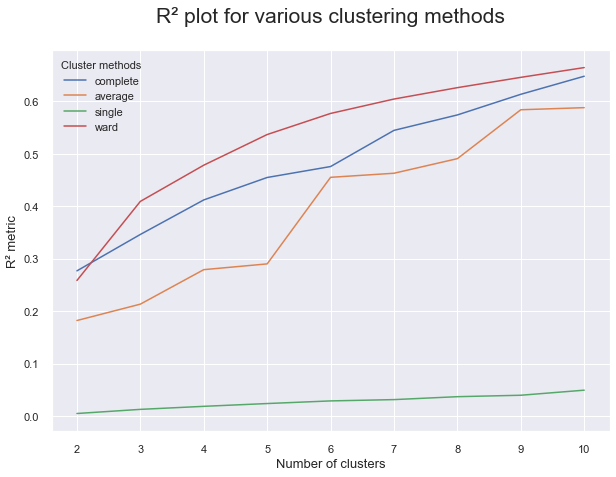

In [522]:
# R-square Plot, using the function from the previous step
r_sq_plot(kmeans_hc_social_centroids)

From the plot above, it is possible to compare the performance of the various Hierarchical Clustering linkages (Ward, complete, average and single) according to R-square. In this case, it can be seen that the Ward's method outperforms the others, and therefore should be used for linking the clusters.

With this, we were able to choose the most adequate method, and it looks like there is an elbow at 3 clusters, which leads us to believe 3 is a good number of clusters. We will also produce some visualizations to further help us.

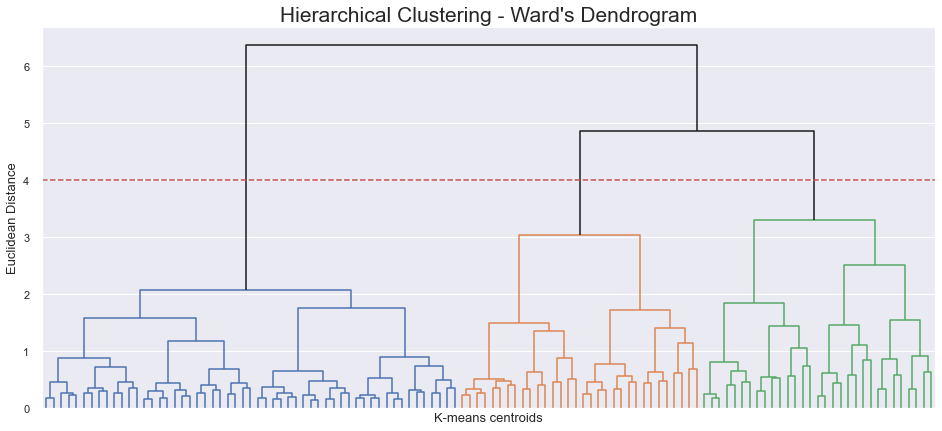

In [537]:
# Hierarchical clustering assessment using scipy
linkage_matrix = linkage(kmeans_hc_social_centroids, method="ward")

# Plot the corresponding Dendrogram
sns.set()
fig = plt.figure(figsize=(16,7))

y_threshold = 4
dendrogram(linkage_matrix, truncate_mode='level', p=6, no_labels=True, 
           color_threshold=y_threshold, above_threshold_color='k')

plt.hlines(y_threshold, 0, 10000, colors="r", linestyles="dashed")
plt.title('Hierarchical Clustering - Ward\'s Dendrogram', fontsize=21)
plt.xlabel('K-means centroids', fontsize=13)
plt.ylabel('Euclidean Distance', fontsize=13)
plt.show()

Here we can visualize the clustering through the Dendrogram, in which we can define a cut-off at the first big jump of euclidean distance between merged clusters.

With the cut-off defined above, we would retain 3 clusters, so the orange and the green clusters don't get merged together and the process is stopped.

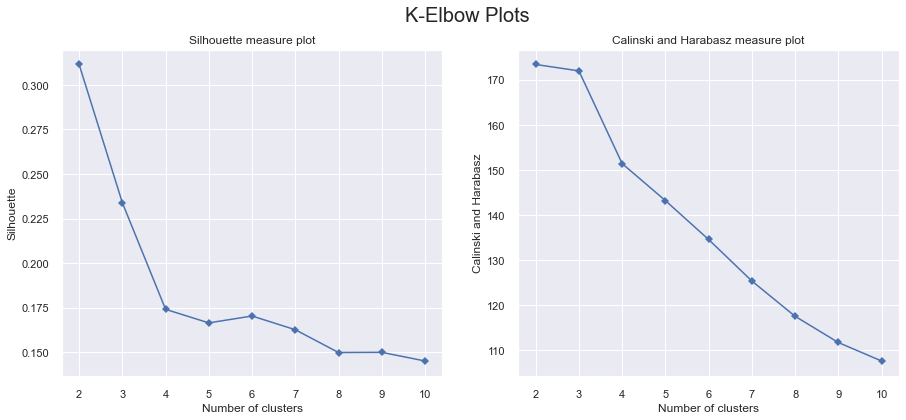

In [539]:
# Hierarchical clustering with linkage according to the plot above
hc_centroids = AgglomerativeClustering(linkage='ward')

# K-elbow plots
kelbowplots(hc_centroids, kmeans_hc_social_centroids)

By analyzing the elbow plots, we get 2 different visualizations. The Silhouette elbow plot seems to have an elbow on 4, although the Calinski and Harabasz elbow plot seems to have it on 3.

Finally, we will complete this analysis with the Clustering Silhouette plots.

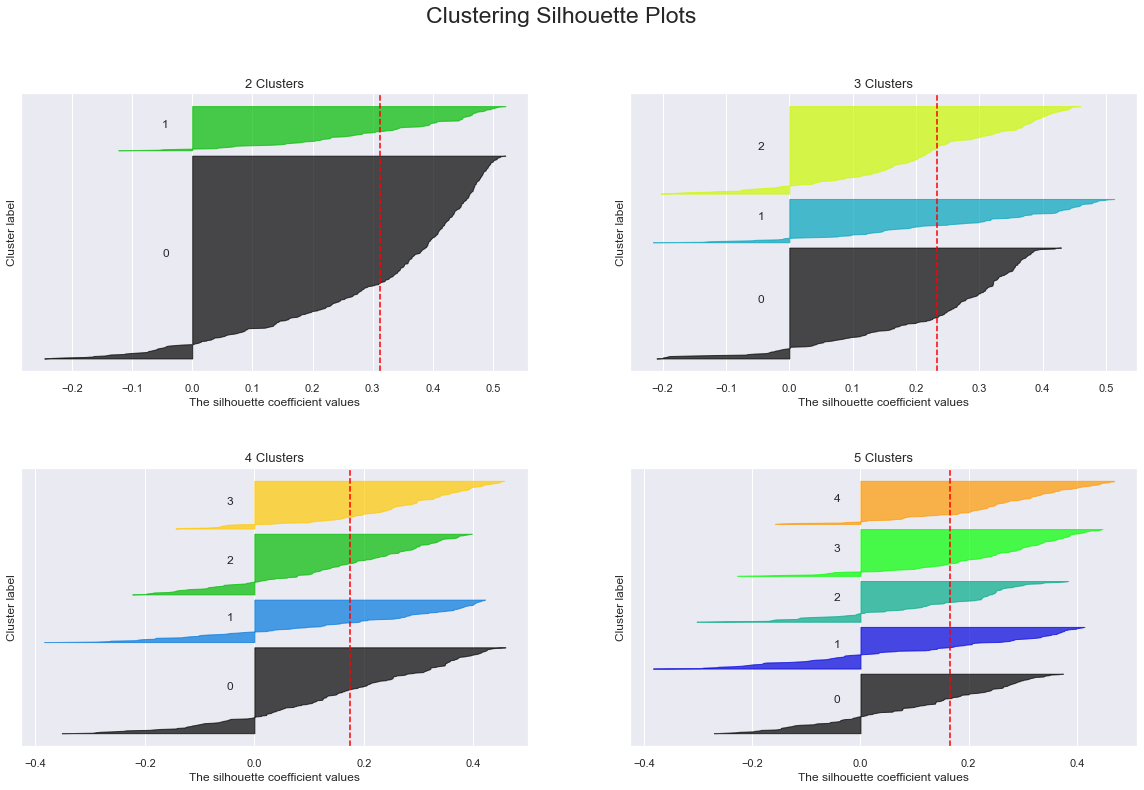

For n_clusters = 2, the average silhouette_score is: 0.3114
For n_clusters = 3, the average silhouette_score is: 0.2339
For n_clusters = 4, the average silhouette_score is: 0.1741
For n_clusters = 5, the average silhouette_score is: 0.1665


In [540]:
hc_estimator = AgglomerativeClustering(linkage='ward')
silhouette_analysis(kmeans_hc_social_centroids, hc_estimator, (2,2), (20, 12), 5)

According to these plots, the solution with 2 clusters seems to have a good quality measure. However, all the other methods seem to indicate the 3 cluster solution is better (R-square plot, dendrogram and both elbow plots), so we decided to keep 3 clusters using this clustering method.

In [545]:
# Perform the final HC on the k-means centroids
model_km_hc_social_2 = AgglomerativeClustering(n_clusters=3, linkage='ward')
clust_labels_km_hc_social_2 = model_km_hc_social_2.fit_predict(kmeans_hc_social_centroids)

In [548]:
# Appending the cluster labels to a new dataframe
kmeans_hc_social_df_final = kmeans_hc_social_centroids.copy()
kmeans_hc_social_df_final["k_means_hc_labels"] = clust_labels_km_hc_social_2

#### 13.2.3. Self-Organizing Map and K-means

We decided to experiment the combination of these two algorithms, so we will perform a SOM with a big grid of neurons, which will then be grouped with K-means in order to find the appropriate number of clusters and an adequate solution.

In [551]:
# We're going to set a random seed for reproducibility
np.random.seed(42)

# Performing SOM
sm = sompy.SOMFactory().build(
    data_social.drop(columns=social_features_extra).values, 
    mapsize=(10, 10), # 10x10 grid
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=data_social.drop(columns=social_features_extra).columns
)
# Neighborhood function - 'gaussian': the units will update according to a Normal distribution (the closer points get 
# closer than the far away ones)

sm.train(n_job=-1, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.298000, quantization error: 2.314577

 epoch: 2 ---> elapsed time:  0.295000, quantization error: 1.922509

 epoch: 3 ---> elapsed time:  0.292000, quantization error: 1.864711

 epoch: 4 ---> elapsed time:  0.333000, quantization error: 1.816294

 epoch: 5 ---> elapsed time:  0.314000, quantization error: 1.792095

 epoch: 6 ---> elapsed time:  0.338000, quantization error: 1.784936

 epoch: 7 ---> elapsed time:  0.368000, quantization error: 1.777037

 epoch: 8 ---> elapsed time:  0.334000, quantization error: 1.772512

 epoch: 9 ---> elapsed time:  0.278000, quantization error: 1.769579

 epoch: 10 ---> elapsed time:  0.303000, quantization error: 1.766862

 epoch: 11 ---> elapsed time:  0.287000, quantization error: 1.764159

 epoch: 12 ---> elapsed time:  0.299000, quantization error: 1.761406

 epoch: 13 ---> 

 epoch: 14 ---> elapsed time:  0.292000, quantization error: 0.935139

 epoch: 15 ---> elapsed time:  0.302000, quantization error: 0.935181

 epoch: 16 ---> elapsed time:  0.342000, quantization error: 0.935221

 epoch: 17 ---> elapsed time:  0.312000, quantization error: 0.935274

 epoch: 18 ---> elapsed time:  0.309000, quantization error: 0.935296

 epoch: 19 ---> elapsed time:  0.326000, quantization error: 0.935280

 epoch: 20 ---> elapsed time:  0.350000, quantization error: 0.935258

 epoch: 21 ---> elapsed time:  0.318000, quantization error: 0.935224

 epoch: 22 ---> elapsed time:  0.318000, quantization error: 0.935093

 epoch: 23 ---> elapsed time:  0.325000, quantization error: 0.934776

 epoch: 24 ---> elapsed time:  0.300000, quantization error: 0.934234

 epoch: 25 ---> elapsed time:  0.313000, quantization error: 0.933954

 epoch: 26 ---> elapsed time:  0.284000, quantization error: 0.933918

 epoch: 27 ---> elapsed time:  0.305000, quantization error: 0.933930

 epoch

In [629]:
# Obtaining SOM's BMUs labels for each observation
som_bmus_social = pd.DataFrame(
    np.concatenate((data_social, np.expand_dims(sm._bmu[0], 1)), axis=1),
    index=data_social.index, columns=np.append(data_social.columns, "BMU")
)

In [563]:
print("SOM quantization error on the Social perspective: {0:.3f}".format(sm.calculate_quantization_error()))

SOM quantization error on the Social perspective: 0.352


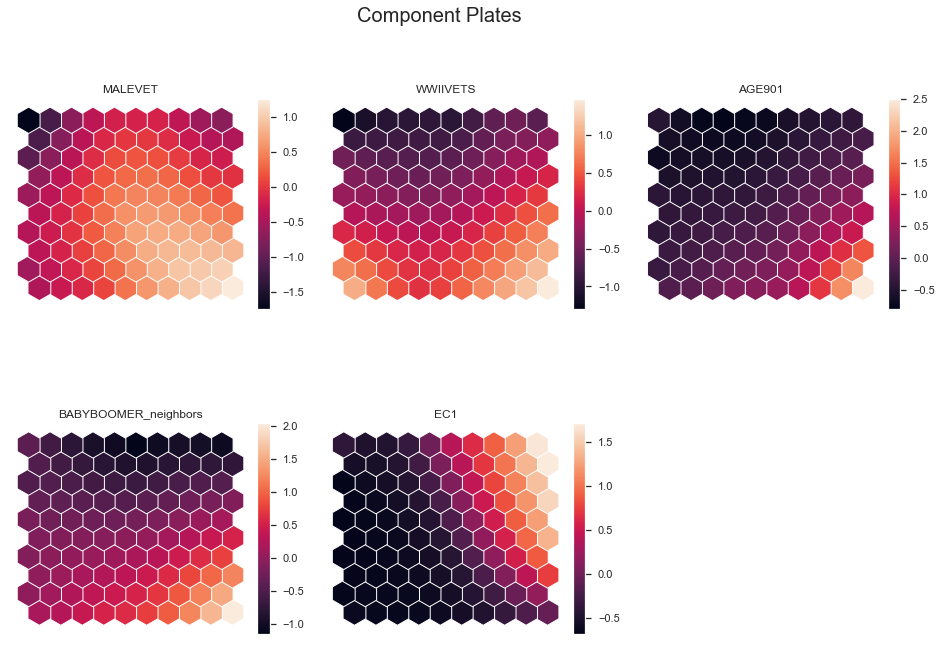

In [564]:
# Visualizing the Component plates (feature values) on the 10x10 grids
sns.set()

view2D = View2D(12, 12, "", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Plates", fontsize=20)
plt.show()

We will now proceed to group the units found by the Self-Organizing Map with K-means.

In [592]:
# Get the nodes
nodes_social = pd.DataFrame(sm.get_node_vectors(), columns=data_social.drop(columns=social_features_extra).columns)

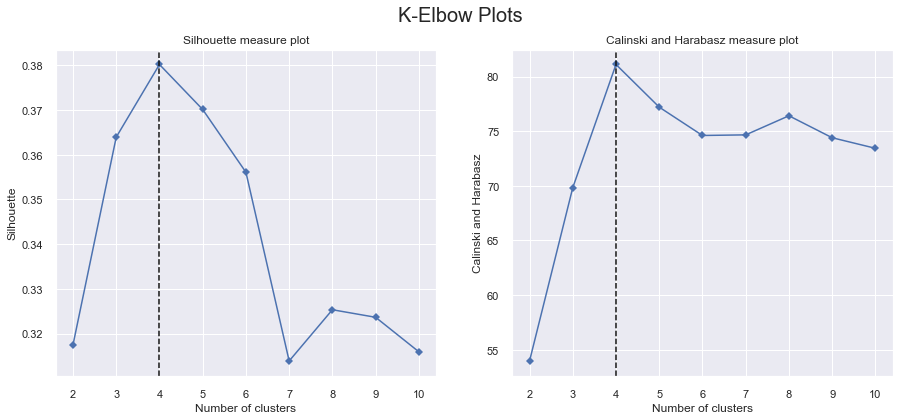

In [597]:
# Kmeans with sklearn
kmeans = KMeans(random_state=42)

# Elbow plots
kelbowplots(kmeans, nodes_social)

As located by the function, both plots have a very clear elbow on the 4 cluster solution.

We will, finally, visualize the Clustering Silhouette plots.

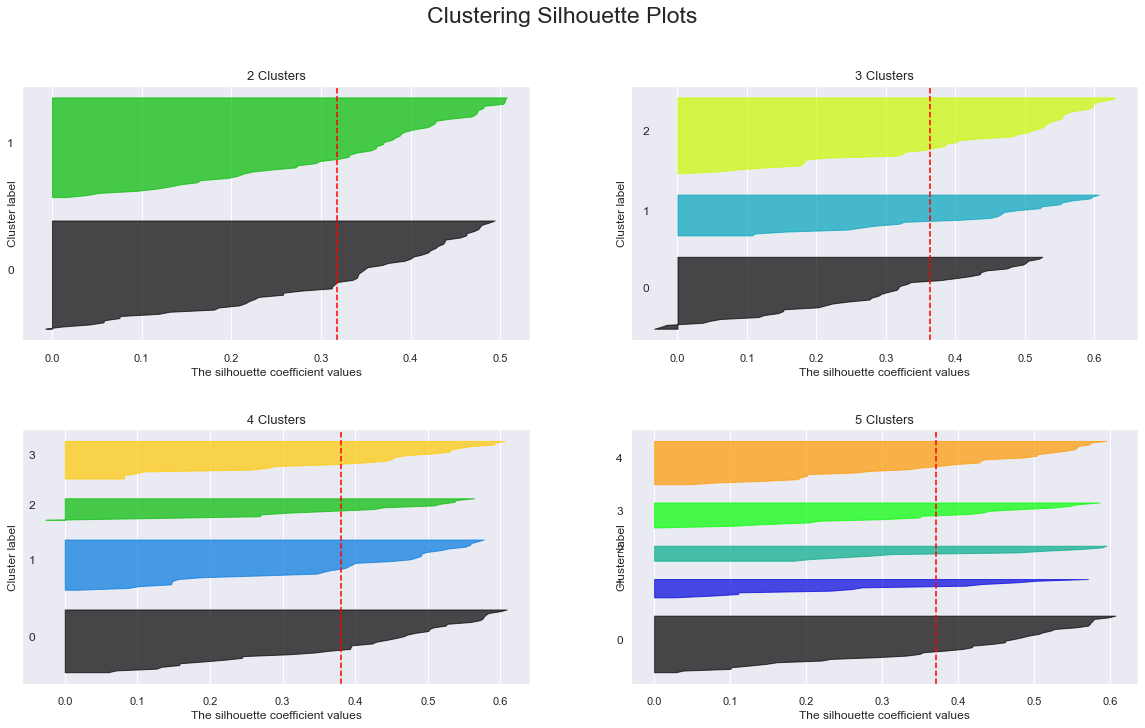

For n_clusters = 2, the average silhouette_score is: 0.3175
For n_clusters = 3, the average silhouette_score is: 0.3639
For n_clusters = 4, the average silhouette_score is: 0.3802
For n_clusters = 5, the average silhouette_score is: 0.3701


In [599]:
# Same function
estimator = KMeans(random_state=42)
silhouette_analysis(nodes_social, estimator, (2,2), (20, 11), 5)

In our opinion, we should keep 4 clusters, as the plot shows a very low amount of samples assigned to the wrong cluster, with a high Silhouette score, and the Calinski and Harabasz score, analyzed previously, is also high.

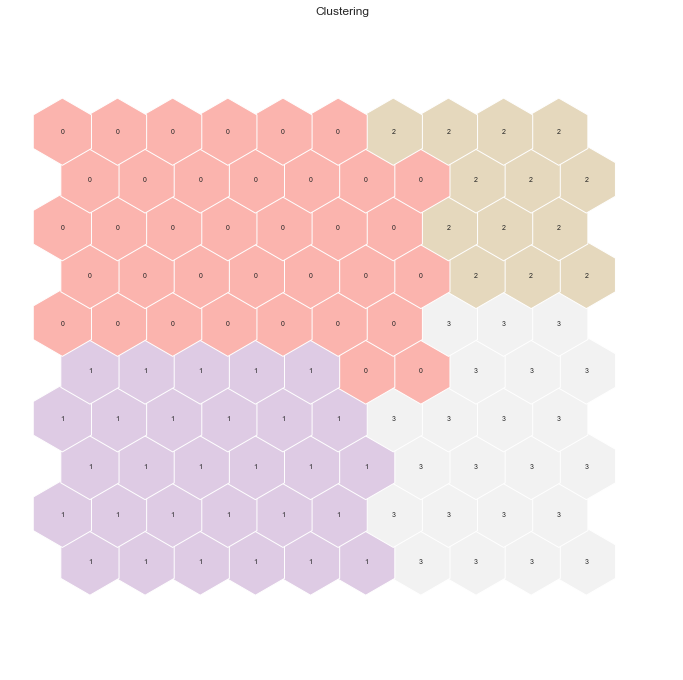

In [600]:
# Perform K-Means clustering on top of the 100 units
model_som_km_social = KMeans(n_clusters=4, random_state=42)
node_clus_labels = sm.cluster(model_som_km_social)

# Show hit map
hits = HitMapView(12, 12, "Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [603]:
# Associate the nodes with the clusters
nodes_social['km_label'] = node_clus_labels

In [639]:
# Get cluster labels for each observation
som_kmeans_social = som_bmus_social.merge(nodes_social['km_label'], 'left', left_on="BMU", right_index=True)

#### 13.2.4. Self-Organizing Map and Hierarchical Clustering

We also decided to experiment the combination of these two algorithms, so we will perform a SOM with a big grid of neurons, which will then be grouped with Hierarchical Clustering in order to find the appropriate number of clusters and an adequate solution.

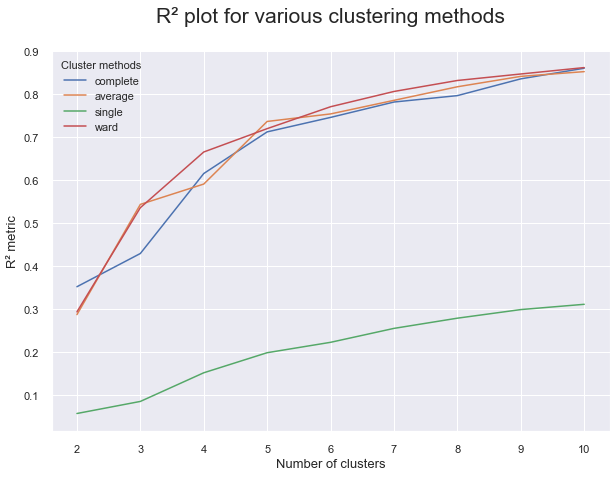

In [647]:
# R-square Plot, using the function from the previous step
r_sq_plot(nodes_social.drop(columns='km_label'))

When analyzing the R-square plot, we decided to try 2 clustering methods: average (elbow on 3 clusters) and Ward (elbow on 4 clusters). 

After comparing the two, 4 clusters with Ward led to too many samples wrongly assigned to the clusters, and also a somewhat low Silhouette score.

Thus, we proceeded with the average method.

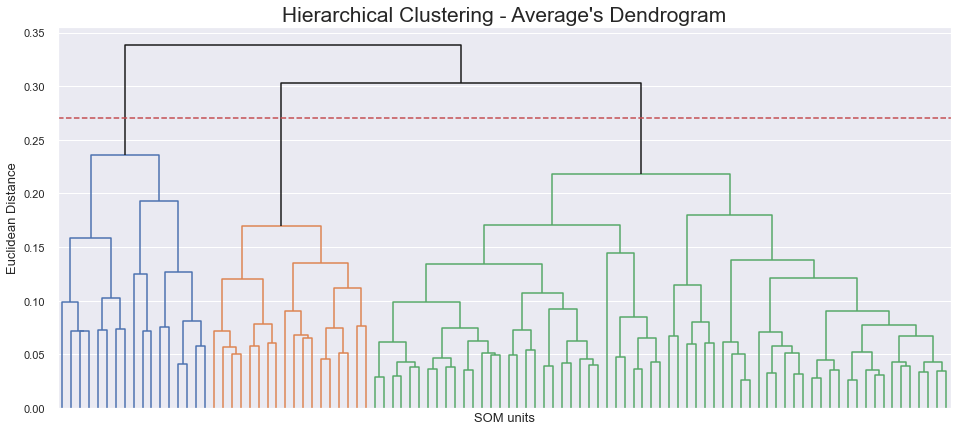

In [690]:
# Hierarchical clustering assessment using scipy
linkage_matrix = linkage(nodes_social.drop(columns='km_label'), method="average")

# Plot the corresponding Dendrogram
sns.set()
fig = plt.figure(figsize=(16,7))

y_threshold = 0.27
dendrogram(linkage_matrix, no_labels=True, 
           color_threshold=y_threshold, above_threshold_color='k')

plt.hlines(y_threshold, 0, 10000, colors="r", linestyles="dashed")
plt.title('Hierarchical Clustering - Average\'s Dendrogram', fontsize=21)
plt.xlabel('SOM units', fontsize=13)
plt.ylabel('Euclidean Distance', fontsize=13)
plt.show()

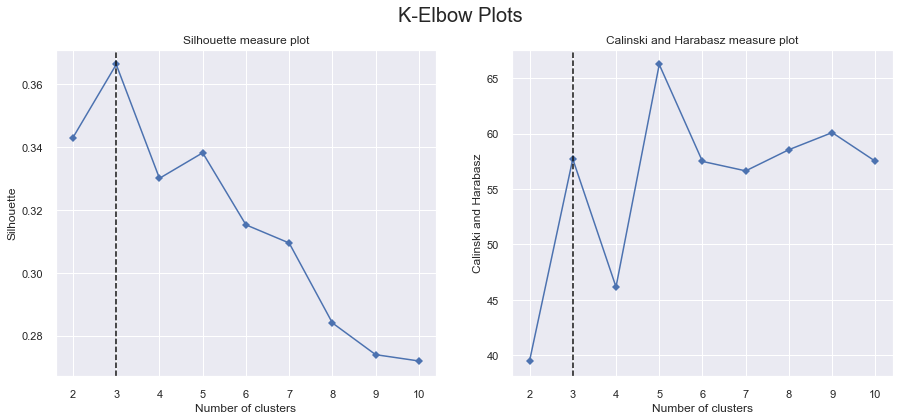

In [691]:
# Hierarchical clustering with sklearn
som_hc = AgglomerativeClustering(linkage='average')

# K-elbow plots
kelbowplots(som_hc, nodes_social.drop(columns='km_label'))

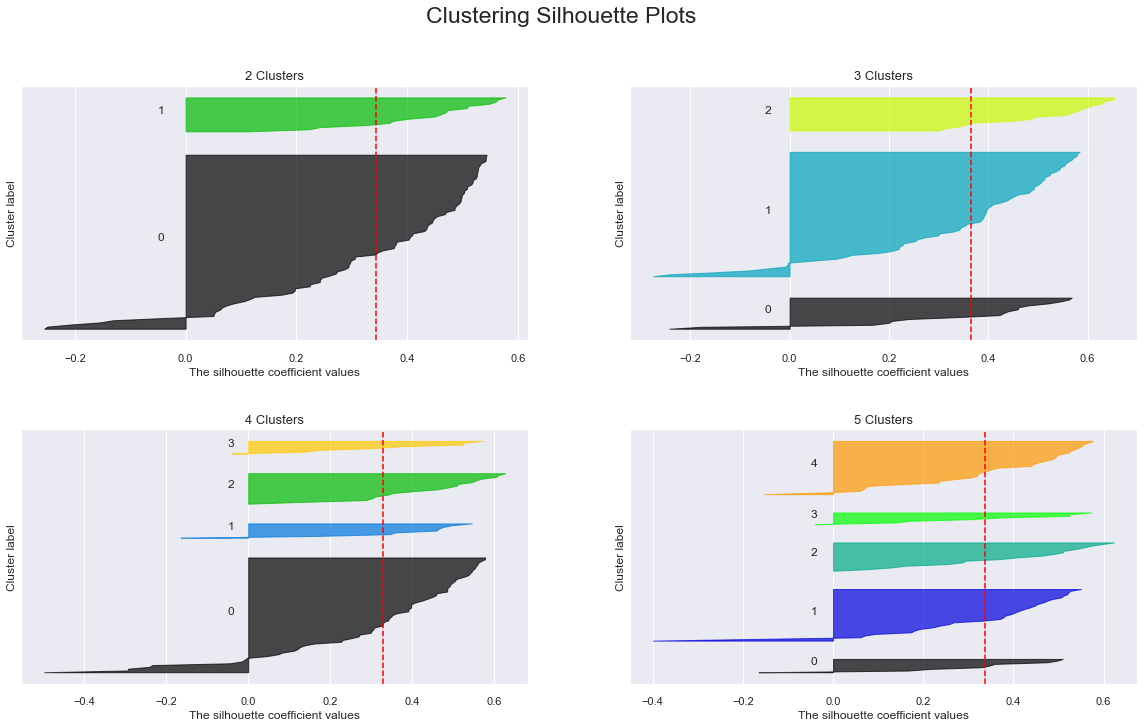

For n_clusters = 2, the average silhouette_score is: 0.343
For n_clusters = 3, the average silhouette_score is: 0.3662
For n_clusters = 4, the average silhouette_score is: 0.33
For n_clusters = 5, the average silhouette_score is: 0.3381


In [692]:
# Function defined above
estimator = AgglomerativeClustering(linkage='average')
silhouette_analysis(nodes_social.drop(columns='km_label'), estimator, (2,2), (20, 11), 5)

Using the average method, all metrics and plots (R-square plot, dendrogram, elbow plots, and Silhouette plots) indicate the 3 cluster solution as the best, so we will keep it.

However, this solution has one very large cluster (Cluster_1), and two smaller ones, so we think this is not a quality solution, although it was the best at this stage (SOM + HC).

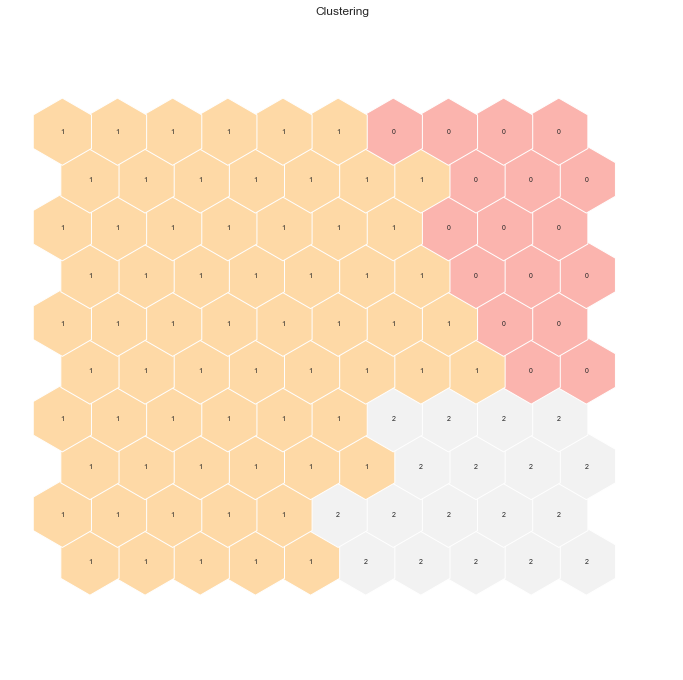

In [695]:
# Perform HC clustering on top of the 100 units
hierclust = AgglomerativeClustering(n_clusters=3, linkage='average')
node_clus_labels = sm.cluster(hierclust)

# Show hit map
hits = HitMapView(12, 12, "Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [696]:
# Associate the nodes with the clusters
nodes_social['hc_label'] = node_clus_labels

In [697]:
# Get cluster labels for each observation
som_hc_social = som_bmus_social.merge(nodes_social['hc_label'], 'left', left_on="BMU", right_index=True)

#### 13.2.5. Best clustering solution

| Clustering algorithms                           | # of Clusters | Silhouette | Calinski and Harabasz | R²    |
|-------------------------------------------------|---------------|------------|-----------------------|-------|
| K-means                                         | 3             | 0.303      | ~32000                | -     |
| K-means and Hierarchical Clustering             | 3             | 0.2339     | ~170                  | ~0.41 |
| Self-Organizing Map and K-means                 | 4             | 0.3802     | ~80                   | -     |
| Self-Organizing Map and Hierarchical Clustering | 3             | 0.3662     | ~57                   | ~0.55 |

To compare this four cluster solutions, we shouldn't compare the solutions with 3 clusters with the one with 4, as that is not a best practice (more clusters can lead to better scores and measures).

We will check the profilling of the K-means solution (3 clusters, and highest Calinski and Harabasz among the ones with 3 clusters) with the Self-Organizing Map and K-means (4 clusters, well defined clusters on the Silhouette plot) on the next step, and we will interpret and analyze the one we think has the best interpretability.

#### 13.2.6. Cluster Profilling

First, checking the cluster profiles of the K-means solution:

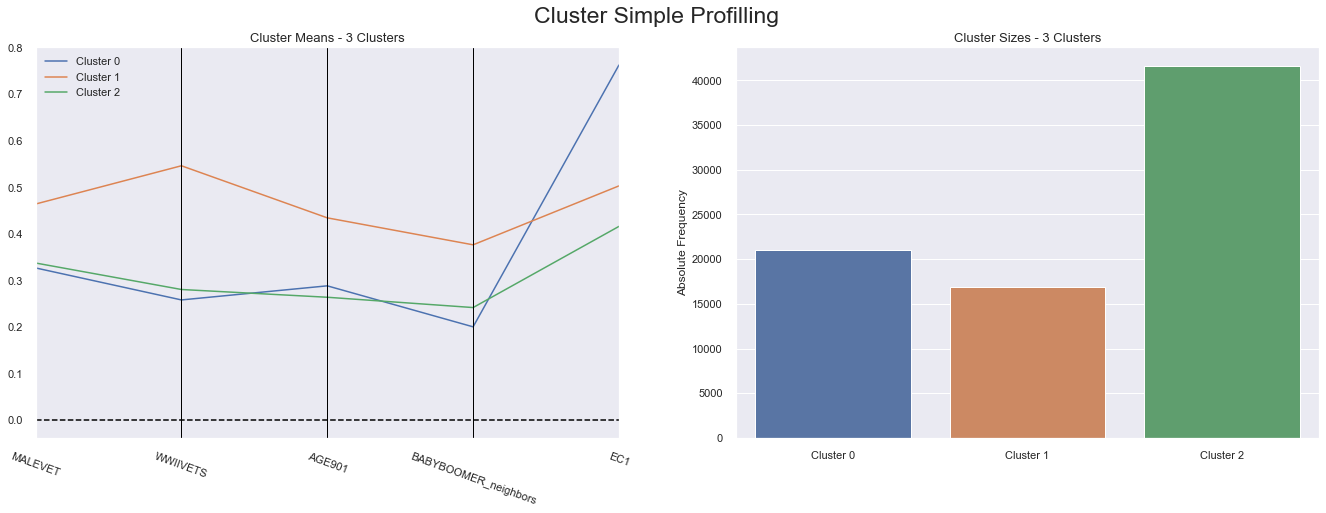

In [704]:
# K-means
cluster_profiles(kmeans_social_df.drop(columns=social_features_extra), ["k_means_labels"], (23, 7))

In [716]:
# Putting the binaries 'object' in int32
kmeans_social_df = kmeans_social_df.astype({'CHILD': 'int32', 'BABYBOOMER_donor': 'int32'})

In [718]:
# Getting the means of the 'extra' variables (means on binaries represent probabilities)
kmeans_social_df[social_features_extra + ['k_means_labels']].groupby('k_means_labels').mean()

CHILD      TPE3  BABYBOOMER_donor     MARR1       AGE  \
k_means_labels                                                             
0               0.165945  3.027166          0.243779  0.649836  0.357227   
1               0.105668  1.972047          0.300751  0.659991  0.415944   
2               0.156369  2.139740          0.265638  0.629994  0.369706   

                MALEMILI  GENDER_F  GENDER_J  GENDER_M  GENDER_U  GEOCODE2_A  \
k_means_labels                                                                 
0               0.014617  0.536039  0.003378  0.411152  0.049431    0.539892   
1               0.004355  0.534779  0.003605  0.412151  0.049465    0.315466   
2               0.010188  0.545935  0.003917  0.403672  0.046476    0.285896   

                GEOCODE2_B  GEOCODE2_C  GEOCODE2_D  
k_means_labels                                      
0                 0.330035    0.105952    0.024121  
1                 0.291945    0.182200    0.210389  
2                 0.285175    0.183933    0.244996

Now, checking the cluster profiles of the SOM + K-means solution:

In [724]:
# Putting the variables 'object' in the right data types and drop 'BMU'
som_kmeans_social = som_kmeans_social.drop(columns='BMU').astype({'AGE': float, 
                                                                  'MALEMILI': float, 
                                                                  'MALEVET': float,
                                                                  'WWIIVETS': float,
                                                                  'AGE901': float,
                                                                  'BABYBOOMER_neighbors': float,
                                                                  'MARR1': float,
                                                                  'EC1': float,
                                                                  'CHILD': 'int32', 
                                                                  'TPE3': 'int32', 
                                                                  'BABYBOOMER_donor': 'int32', 
                                                                  'GENDER_F': 'int32', 
                                                                  'GENDER_J': 'int32', 
                                                                  'GENDER_M': 'int32', 
                                                                  'GENDER_U': 'int32', 
                                                                  'GEOCODE2_A': 'int32', 
                                                                  'GEOCODE2_B': 'int32', 
                                                                  'GEOCODE2_C': 'int32', 
                                                                  'GEOCODE2_D': 'int32', 
                                                                 })

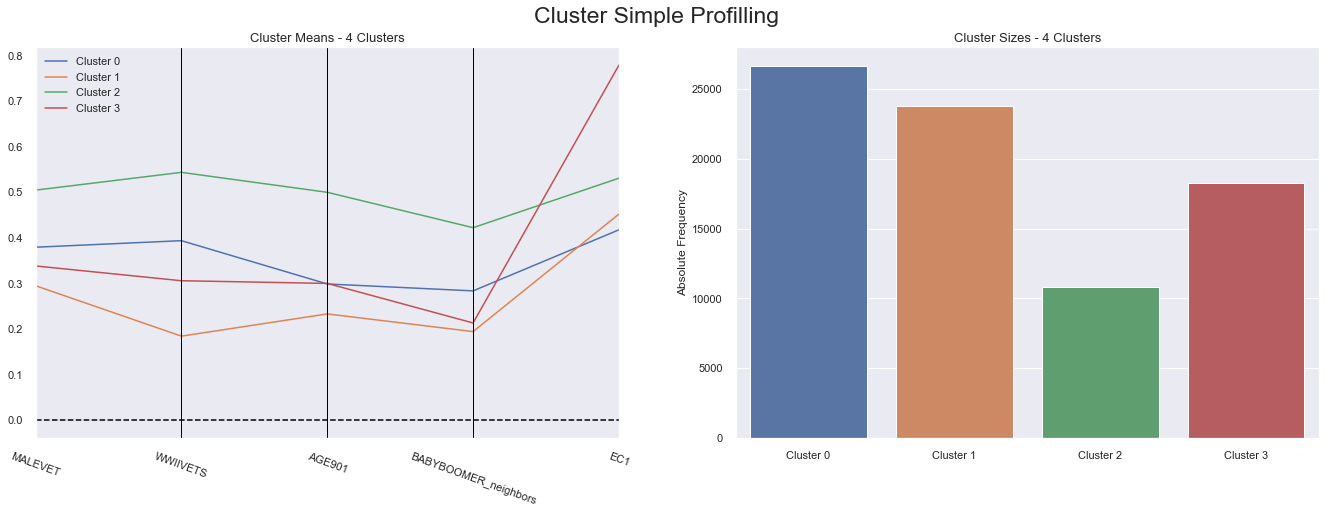

In [727]:
# SOM + K-means
cluster_profiles(som_kmeans_social.drop(columns=social_features_extra), ["km_label"], (23, 7))

In [728]:
# Getting the means of the 'extra' variables (means on binaries represent probabilities)
som_kmeans_social[social_features_extra + ['km_label']].groupby('km_label').mean()

CHILD      TPE3  BABYBOOMER_donor     MARR1       AGE  MALEMILI  \
km_label                                                                       
0         0.133916  1.849884          0.278032  0.638204  0.387504  0.005607   
1         0.183135  2.550076          0.245509  0.623258  0.351284  0.017994   
2         0.094565  1.605103          0.316232  0.682323  0.425004  0.004976   
3         0.154892  3.211400          0.251192  0.646442  0.363465  0.009472   

          GENDER_F  GENDER_J  GENDER_M  GENDER_U  GEOCODE2_A  GEOCODE2_B  \
km_label                                                                   
0         0.545076  0.003788  0.404073  0.047064    0.216380    0.256544   
1         0.546550  0.003946  0.403627  0.045878    0.389229    0.321734   
2         0.520521  0.003790  0.424478  0.051211    0.325106    0.313459   
3         0.539710  0.003234  0.407290  0.049767    0.549356    0.320471   

          GEOCODE2_C  GEOCODE2_D  
km_label                          
0           0.185555    0.341521  
1           0.166429    0.122607  
2           0.198281    0.163154  
3           0.104467    0.025706

In this first perspective, we compared all cluster solutions and decided to check the profiling of the K-means solution with 3 clusters, that had a good Silhouette score and the highest Calinski and Harabasz, and the SOM and K-means with 4 clusters, that presented well defined clusters on the Silhouette plot.

After better analyzing these two options, we decided to interpret the 4-cluster solution with SOM and K-means, because the K-means only solution has a disproportionately large cluster compared to the other two, which is not the case on the SOM and K-means. Also, we believed this second solution would provide good insights.

From the graphs and the table with the average values on the binary variables, we will characterize and attribute a label to each cluster.

**Cluster_0: Low Education and Rural Donors –** This cluster is characterized by having the lowest years of education, with an older population living in mostly rural zones (GEOCODE2), with the second highest percentage of veterans in the neighborhood. This is the biggest segment with more than 25 000 donors.

**Cluster_1: Young Population in Large Cities –** This cluster has the lowest values for veterans in the neighborhood, and also the youngest population, mostly living in larger and urbanized cities. Although they are younger, they have the highest probability of having at least one child, but the lowest on being married. This cluster has almost 25 000 donors.

**Cluster_2: Retired Donors –** This is the smallest cluster, containing only about 10 000 donors, that are specially characterized for living in neighborhoods with the highest percentage of veterans, an older population (more baby-boomers), and more probability of being married. They are mainly situated in large cities but have a strong presence in more rural areas as well.

**Cluster_3: Urban Donors –** This segment has the neighborhood with the highest level of education, but an old population living almost exclusively in the large cities. They are also characterized for having a big use of public transportation. This segment has between 15 000 and 20 000 donors.

### 13.3. Economic Perspective

#### 13.3.1. K-means

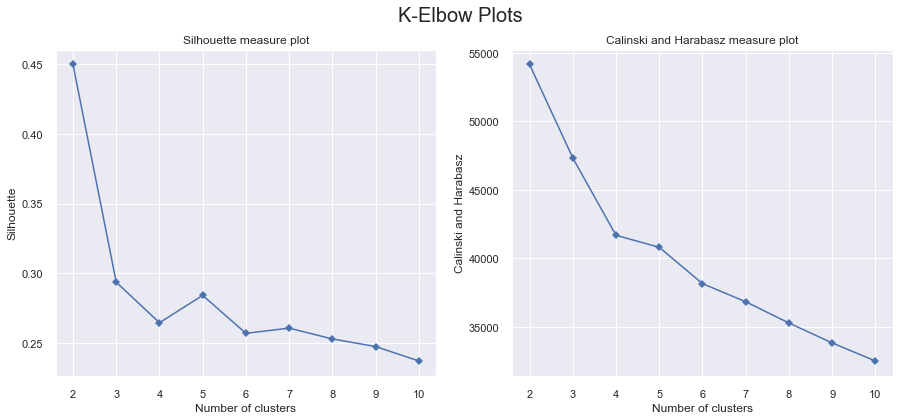

In [730]:
# Instantiate a K-Means model
clus_estim = KMeans(random_state=42) # Default is already 'k-means++' on init, and 10 on n_init, which is good

# K-elbow plots
kelbowplots(clus_estim, data_eco.drop(columns=economic_features_extra))

In this case, the elbows are not so clear and the conclusions differ on these plots. From the Silhouette plot, it looks like the elbow is on 3 clusters, although on the Calinski and Harabasz plot it is on 4.

We will complement this analysis with the visualization of the Silhouette plots, to get a better understanding of the quality of this cluster analysis with 2, 3, 4 or 5 clusters, focusing especially on 3 and 4.

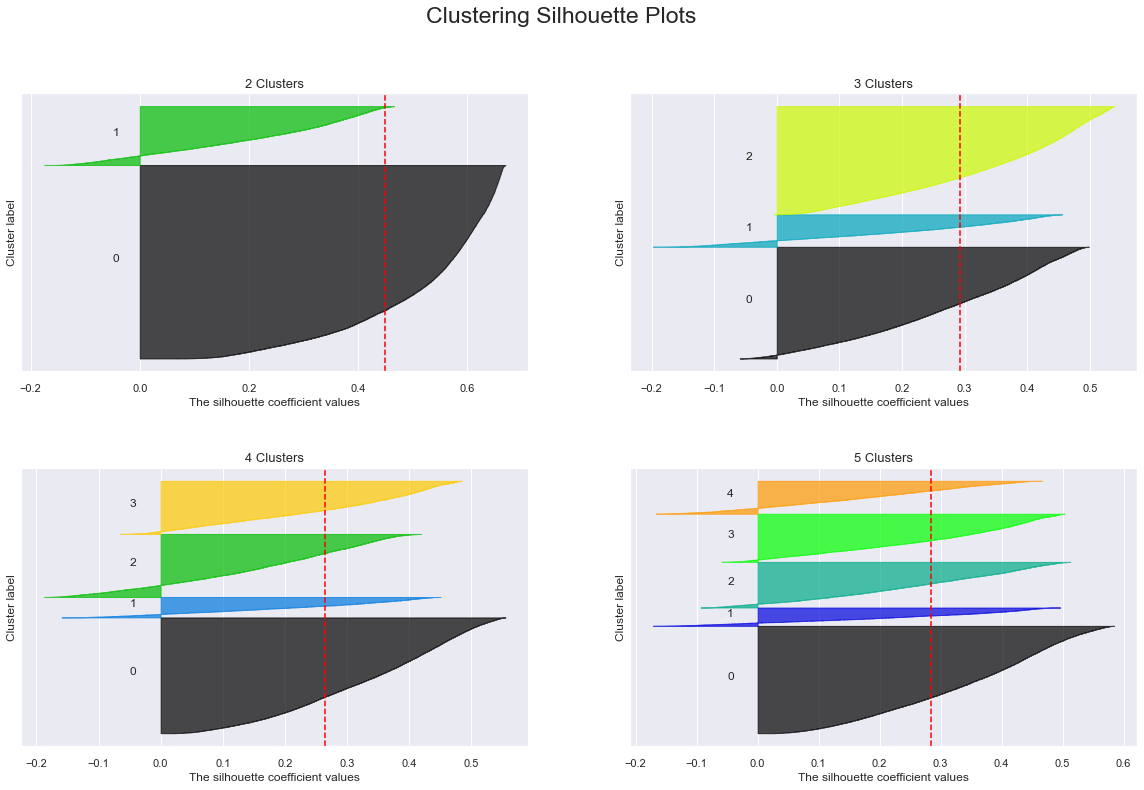

For n_clusters = 2, the average silhouette_score is: 0.4499
For n_clusters = 3, the average silhouette_score is: 0.2935
For n_clusters = 4, the average silhouette_score is: 0.2644
For n_clusters = 5, the average silhouette_score is: 0.284


In [731]:
kmeans = KMeans(random_state=42)
silhouette_analysis(data_eco.drop(columns=economic_features_extra), kmeans, (2,2), (20,12), max_nclus=6)

From these plots, we visualize that the 4 cluster solution produces more samples wrongly assigned, and one cluster has a very small amount of samples. Also, the Silhouette score is higher on k=3.

Thus, we conclude that the 3 clusters solution is the most appropriate, as it has a higher Silhouette score (and Calinski and Harabasz score) and it also seems to produce better results on the Silhouette plot.

In [732]:
# Perform k-means
model_km_eco = KMeans(3, random_state=42)
model_km_eco.fit(data_eco.drop(columns=economic_features_extra))
clust_labels_km_eco = model_km_eco.predict(data_eco.drop(columns=economic_features_extra))
cent_km_eco = model_km_eco.cluster_centers_

In [733]:
# Appending the cluster labels to a new dataframe
kmeans_eco_df = data_eco.copy()
kmeans_eco_df["k_means_labels"] = clust_labels_km_eco

#### 13.3.2. K-means and Hierarchical Clustering

In this section we will apply the K-means algorithm together with the Hierarchical clustering algorithm.

We will first perform a k-means in order to reduce the number of observations to a smaller number (500 centroids) and then we will perform Hierarchical Clustering, to find out the appropriate cluster solution, without having to define the number of clusters.

In [736]:
# First, perform k-means with a high n_clusters (500)
model_km_hc_eco = KMeans(500, random_state=42)
model_km_hc_eco.fit(data_eco.drop(columns=economic_features_extra))
clust_labels_km_hc_eco = model_km_hc_eco.predict(data_eco.drop(columns=economic_features_extra))
cent_km_hc_eco = model_km_hc_eco.cluster_centers_

In [737]:
# Appending the cluster labels to a new dataframe
kmeans_hc_eco_df = data_eco.copy()
kmeans_hc_eco_df["k_means_hc_labels"] = clust_labels_km_hc_eco

In [741]:
# Getting the centroids of each cluster given by the K-means
kmeans_hc_eco_centroids = kmeans_hc_eco_df.drop(columns=economic_features_extra).groupby("k_means_hc_labels").mean()

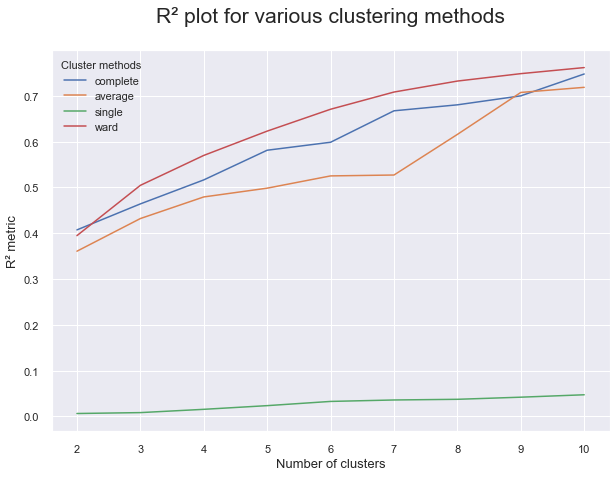

In [742]:
# R-square Plot, using the function from the previous step
r_sq_plot(kmeans_hc_eco_centroids)

With the R-square plot, we were able to choose the most adequate method, Ward, and it looks like there is an elbow at 3 clusters, which leads us to believe 3 is a good number of clusters. We will also produce some visualizations to further help us.

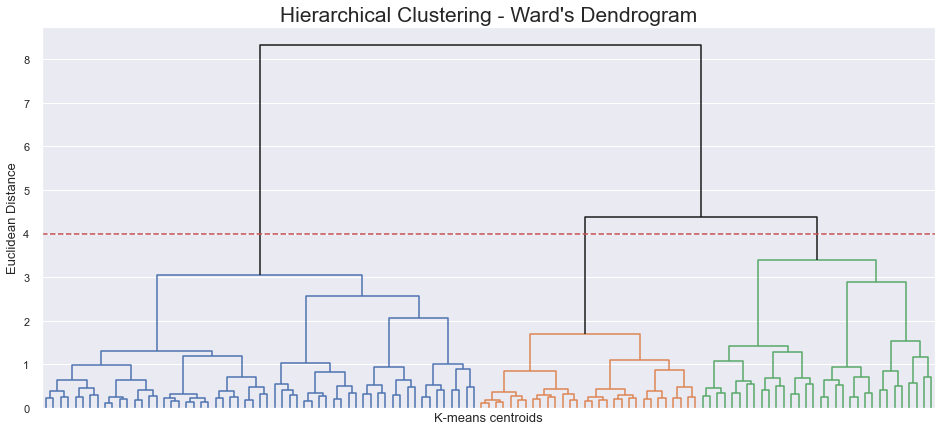

In [743]:
# Hierarchical clustering assessment using scipy
linkage_matrix = linkage(kmeans_hc_eco_centroids, method="ward")

# Plot the corresponding Dendrogram
sns.set()
fig = plt.figure(figsize=(16,7))

y_threshold = 4
dendrogram(linkage_matrix, truncate_mode='level', p=6, no_labels=True, 
           color_threshold=y_threshold, above_threshold_color='k')

plt.hlines(y_threshold, 0, 10000, colors="r", linestyles="dashed")
plt.title('Hierarchical Clustering - Ward\'s Dendrogram', fontsize=21)
plt.xlabel('K-means centroids', fontsize=13)
plt.ylabel('Euclidean Distance', fontsize=13)
plt.show()

With the cut-off defined above, we would retain 3 clusters, so the orange and green clusters don't get merged together and the process is stopped.

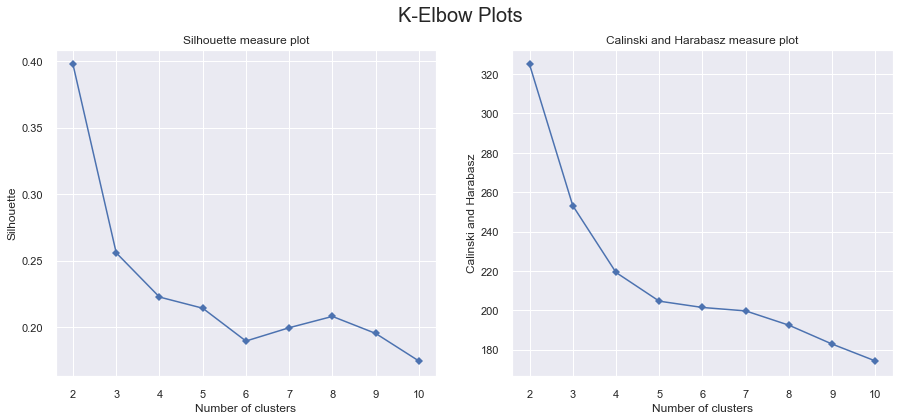

In [744]:
# Hierarchical clustering with linkage according to the plot above
hc_centroids = AgglomerativeClustering(linkage='ward')

# K-elbow plots
kelbowplots(hc_centroids, kmeans_hc_eco_centroids)

By analyzing the elbow plots, we get 2 different visualizations. The Silhouette elbow plot seems to have an elbow on 3, although the Calinski and Harabasz elbow plot seems to have it on 4.

Finally, we will complete this analysis with the Clustering Silhouette plots.

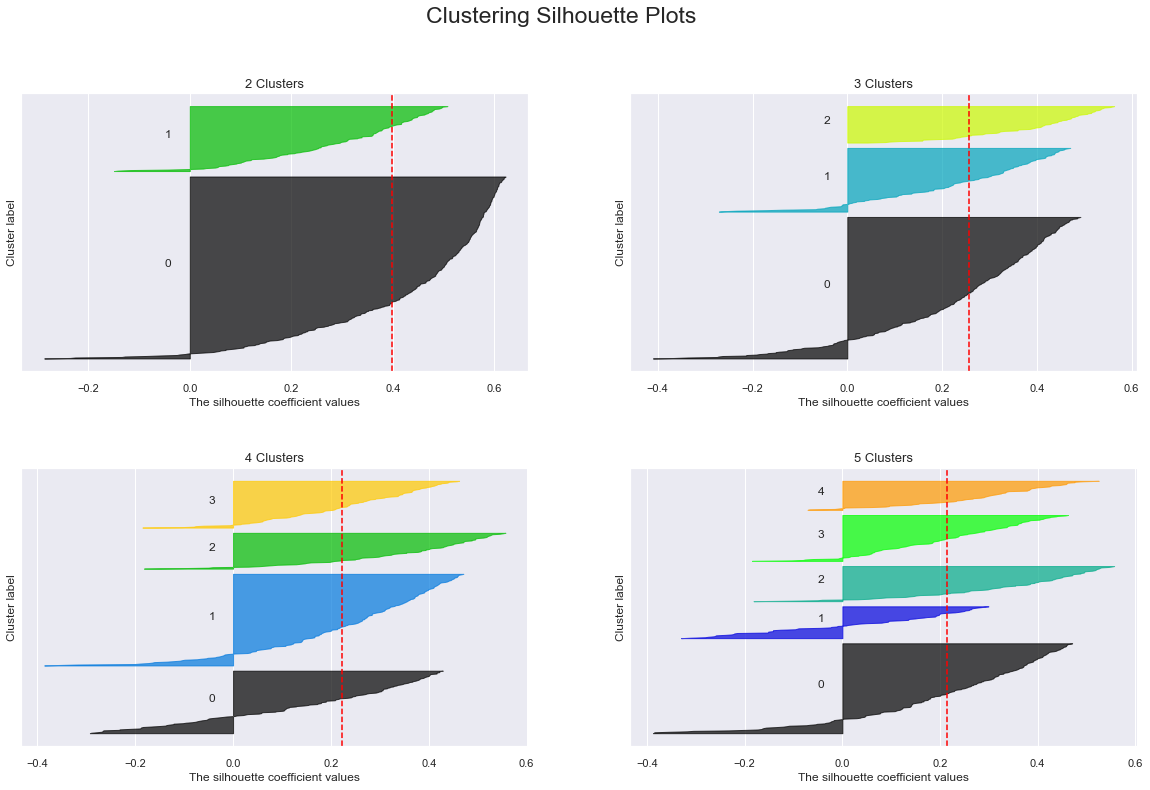

For n_clusters = 2, the average silhouette_score is: 0.3973
For n_clusters = 3, the average silhouette_score is: 0.2559
For n_clusters = 4, the average silhouette_score is: 0.2227
For n_clusters = 5, the average silhouette_score is: 0.2143


In [745]:
hc_estimator = AgglomerativeClustering(linkage='ward')
silhouette_analysis(kmeans_hc_eco_centroids, hc_estimator, (2,2), (20, 12), 5)

All methods seem to indicate the 3 cluster solution is better, except the Calinski and Harabasz plot, so we decided to keep 3 clusters even though there are some samples wrongly assigned to clusters, as that also happens on the 4 cluster solution.

In [746]:
# Perform the final HC on the k-means centroids
model_km_hc_eco_2 = AgglomerativeClustering(n_clusters=3, linkage='ward')
clust_labels_km_hc_eco_2 = model_km_hc_eco_2.fit_predict(kmeans_hc_eco_centroids)

In [747]:
# Appending the cluster labels to a new dataframe
kmeans_hc_eco_df_final = kmeans_hc_eco_centroids.copy()
kmeans_hc_eco_df_final["k_means_hc_labels"] = clust_labels_km_hc_eco_2

#### 13.3.3. Self-Organizing Map and K-means

We decided to experiment the combination of these two algorithms, so we will perform a SOM with a big grid of neurons, which will then be grouped with K-means in order to find the appropriate number of clusters and an adequate solution.

In [749]:
# We're going to set a random seed for reproducibility
np.random.seed(42)

# Performing SOM
sm = sompy.SOMFactory().build(
    data_eco.drop(columns=economic_features_extra).values, 
    mapsize=(10, 10), # 10x10 grid
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=data_eco.drop(columns=economic_features_extra).columns
)
# Neighborhood function - 'gaussian': the units will update according to a Normal distribution (the closer points get 
# closer than the far away ones)

sm.train(n_job=-1, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.072000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  2.707000, quantization error: 1.975851

 epoch: 2 ---> elapsed time:  0.329000, quantization error: 1.834395

 epoch: 3 ---> elapsed time:  0.265000, quantization error: 1.767865

 epoch: 4 ---> elapsed time:  0.288000, quantization error: 1.728415

 epoch: 5 ---> elapsed time:  0.277000, quantization error: 1.703893

 epoch: 6 ---> elapsed time:  0.293000, quantization error: 1.684188

 epoch: 7 ---> elapsed time:  0.265000, quantization error: 1.680101

 epoch: 8 ---> elapsed time:  0.289000, quantization error: 1.677155

 epoch: 9 ---> elapsed time:  0.286000, quantization error: 1.674068

 epoch: 10 ---> elapsed time:  0.267000, quantization error: 1.670375

 epoch: 11 ---> elapsed time:  0.259000, quantization error: 1.661562

 epoch: 12 ---> elapsed time:  0.259000, quantization error: 1.649394

 epoch: 13 ---> 

 epoch: 14 ---> elapsed time:  0.260000, quantization error: 0.793746

 epoch: 15 ---> elapsed time:  0.277000, quantization error: 0.793748

 epoch: 16 ---> elapsed time:  0.259000, quantization error: 0.793753

 epoch: 17 ---> elapsed time:  0.259000, quantization error: 0.793765

 epoch: 18 ---> elapsed time:  0.257000, quantization error: 0.793765

 epoch: 19 ---> elapsed time:  0.267000, quantization error: 0.793775

 epoch: 20 ---> elapsed time:  0.265000, quantization error: 0.793759

 epoch: 21 ---> elapsed time:  0.262000, quantization error: 0.793742

 epoch: 22 ---> elapsed time:  0.263000, quantization error: 0.793737

 epoch: 23 ---> elapsed time:  0.258000, quantization error: 0.793730

 epoch: 24 ---> elapsed time:  0.258000, quantization error: 0.793721

 epoch: 25 ---> elapsed time:  0.256000, quantization error: 0.793699

 epoch: 26 ---> elapsed time:  0.259000, quantization error: 0.793685

 epoch: 27 ---> elapsed time:  0.265000, quantization error: 0.793674

 epoch

In [750]:
# Obtaining SOM's BMUs labels for each observation
som_bmus_eco = pd.DataFrame(
    np.concatenate((data_eco, np.expand_dims(sm._bmu[0], 1)), axis=1),
    index=data_eco.index, columns=np.append(data_eco.columns, "BMU")
)

In [753]:
print("SOM quantization error on the Social perspective: {0:.3f}".format(sm.calculate_quantization_error()))

SOM quantization error on the Social perspective: 0.291


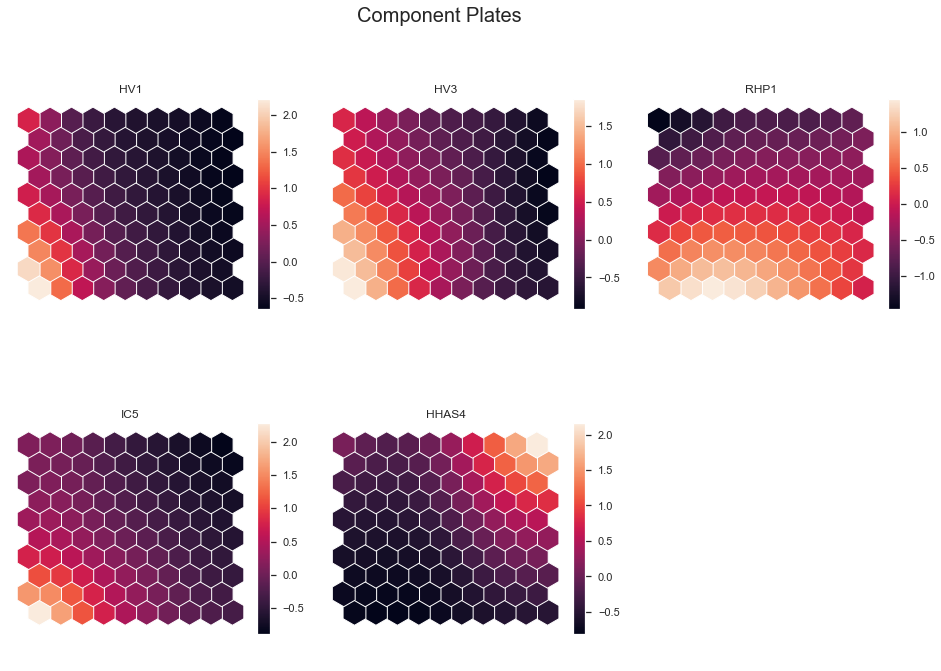

In [754]:
# Visualizing the Component plates (feature values) on the 10x10 grids
sns.set()

view2D = View2D(12, 12, "", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Plates", fontsize=20)
plt.show()

We will now proceed to group the units found by the Self-Organizing Map with K-means.

In [755]:
# Get the nodes
nodes_eco = pd.DataFrame(sm.get_node_vectors(), columns=data_eco.drop(columns=economic_features_extra).columns)

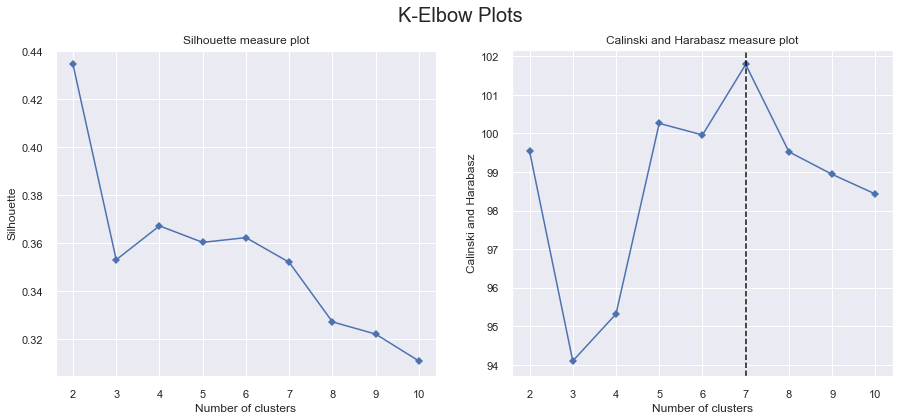

In [757]:
# Kmeans with sklearn
kmeans = KMeans(random_state=42)

# Elbow plots
kelbowplots(kmeans, nodes_eco)

The 2 elbow graphs are hard to interpret. 

The Calinski and Harabasz elbow, located by the function, is on the 7 cluster solution, however that number of clusters is too high, as it becomes hard to deal with such a big number of clusters (especially in terms of interpretability and the production of marketing campaigns for each of them). In our opinion, a value of 5 or even 4 would be acceptable, because the differences are not large (5 clusters: coef = ~100 and 4 clusters: coef = ~95).

In the Silhouette plot, there seems to be an elbow on the 4 cluster option, because from that point forward, the score is always decreasing.

To complement these visualizations, we will plot the clustering silhouettes to, hopefully, get a better understanding on what is the ideal number of clusters.

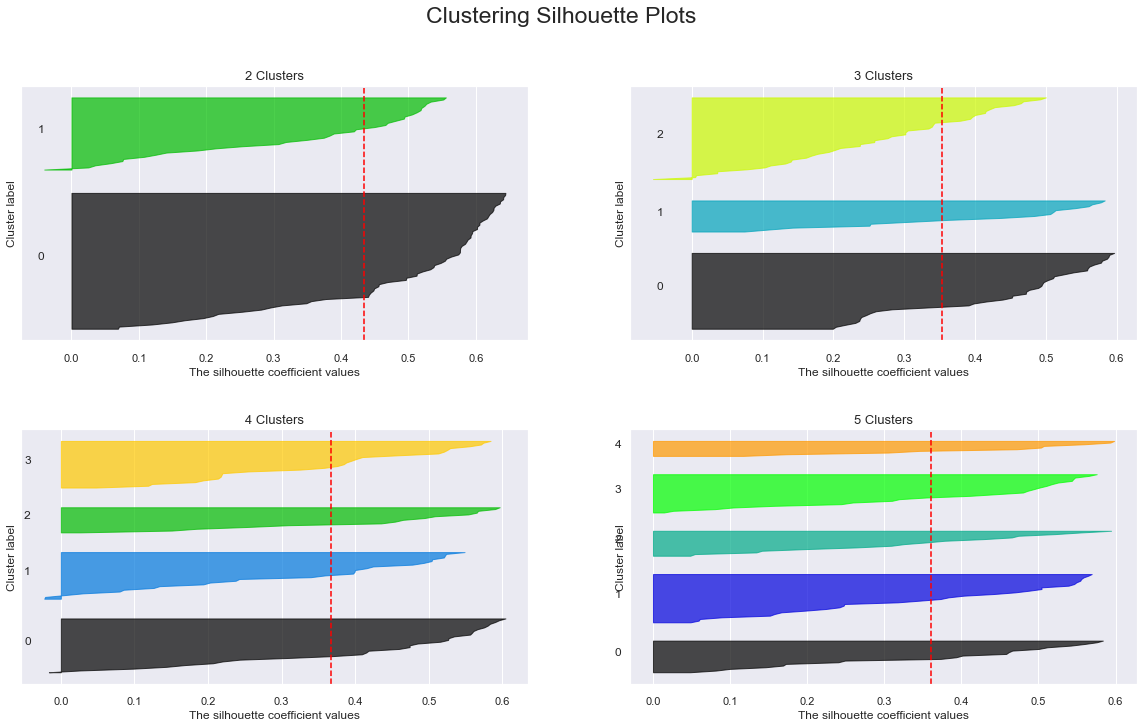

For n_clusters = 2, the average silhouette_score is: 0.4344
For n_clusters = 3, the average silhouette_score is: 0.3531
For n_clusters = 4, the average silhouette_score is: 0.3672
For n_clusters = 5, the average silhouette_score is: 0.3603


In [758]:
# Same function
estimator = KMeans(random_state=42)
silhouette_analysis(nodes_eco, estimator, (2,2), (20, 11), 5)

After visualizing these last plots, in our opinion, we should keep 4 clusters, as the plot shows a very low amount of samples assigned to the wrong cluster, with a high Silhouette score.

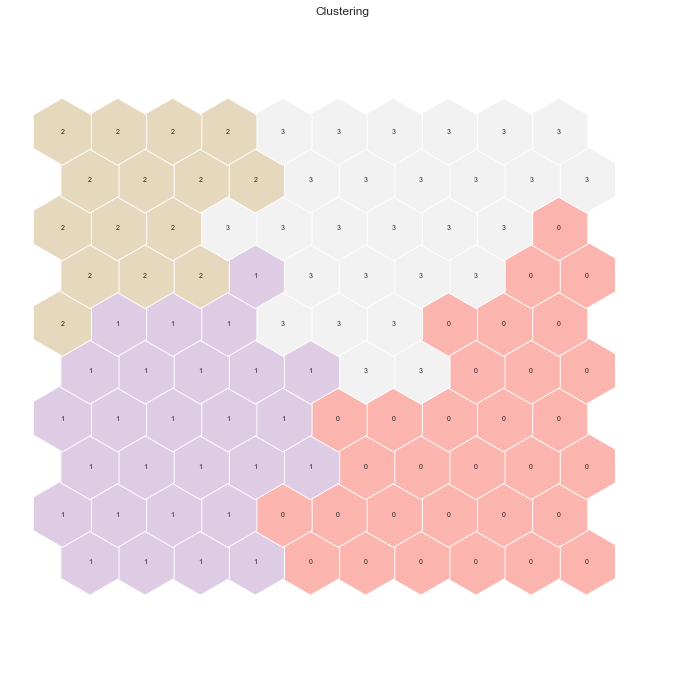

In [759]:
# Perform K-Means clustering on top of the 100 units
model_som_km_eco = KMeans(n_clusters=4, random_state=42)
node_clus_labels = sm.cluster(model_som_km_eco)

# Show hit map
hits = HitMapView(12, 12, "Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [760]:
# Associate the nodes with the clusters
nodes_eco['km_label'] = node_clus_labels

In [762]:
# Get cluster labels for each observation
som_kmeans_eco = som_bmus_eco.merge(nodes_eco['km_label'], 'left', left_on="BMU", right_index=True)

#### 13.3.4. Self-Organizing Map and Hierarchical Clustering

We also decided to experiment the combination of these two algorithms, so we will perform a SOM with a big grid of neurons, which will then be grouped with Hierarchical Clustering in order to find the appropriate number of clusters and an adequate solution.

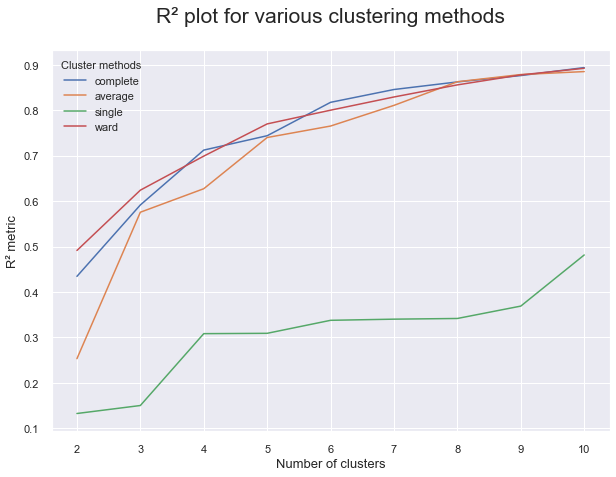

In [765]:
# R-square Plot, using the function from the previous step
r_sq_plot(nodes_eco.drop(columns='km_label'))

When analyzing the R-square plot, we decided to try 2 clustering methods: complete and Ward. 

After comparing the two, complete linkage seemed to have a elbow on 4 on the R-square plot, although the dendrogram pointed more towards 3. Furthermore, the Calinski and Harabasz plot was very inconsistent, and both the 3 and 4 cluster solutions led to too many samples wrongly assigned to the clusters, and also a somewhat low Silhouette score.

Thus, we proceeded with the Ward method.

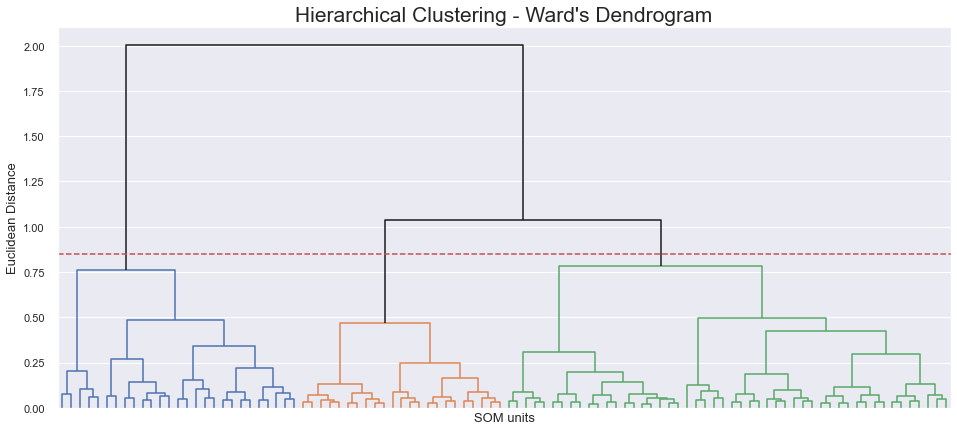

In [779]:
# Hierarchical clustering assessment using scipy
linkage_matrix = linkage(nodes_eco.drop(columns='km_label'), method="ward")

# Plot the corresponding Dendrogram
sns.set()
fig = plt.figure(figsize=(16,7))

y_threshold = 0.85
dendrogram(linkage_matrix, no_labels=True, 
           color_threshold=y_threshold, above_threshold_color='k')

plt.hlines(y_threshold, 0, 10000, colors="r", linestyles="dashed")
plt.title('Hierarchical Clustering - Ward\'s Dendrogram', fontsize=21)
plt.xlabel('SOM units', fontsize=13)
plt.ylabel('Euclidean Distance', fontsize=13)
plt.show()

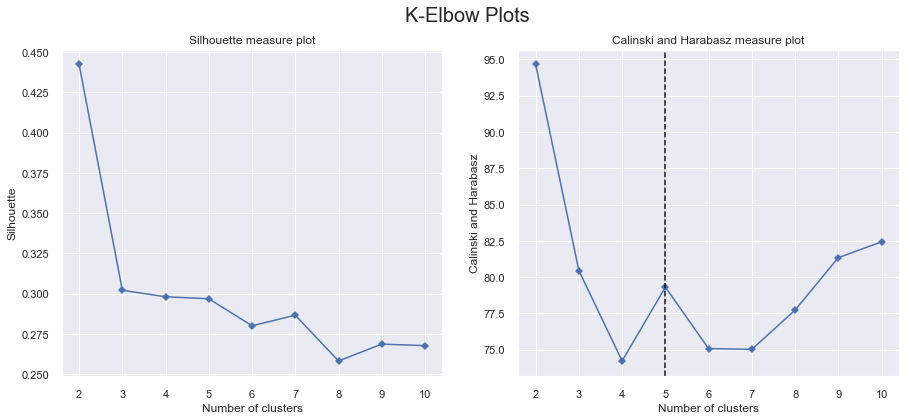

In [780]:
# Hierarchical clustering with sklearn
som_hc = AgglomerativeClustering(linkage='ward')

# K-elbow plots
kelbowplots(som_hc, nodes_eco.drop(columns='km_label'))

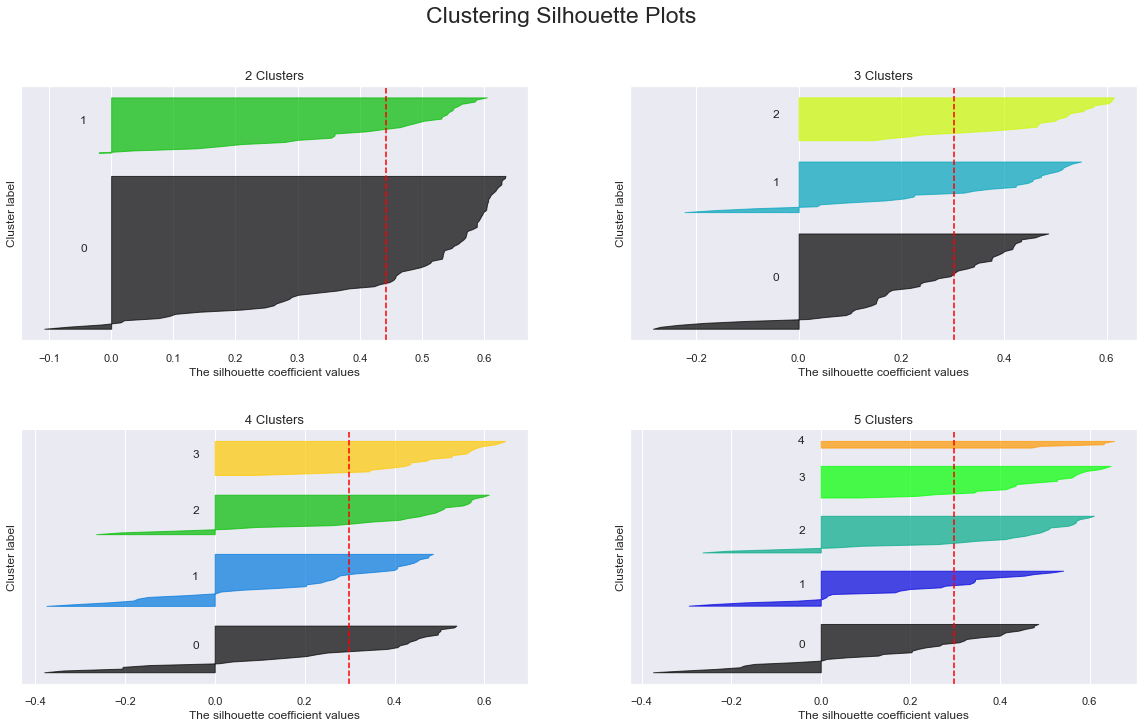

For n_clusters = 2, the average silhouette_score is: 0.4424
For n_clusters = 3, the average silhouette_score is: 0.3021
For n_clusters = 4, the average silhouette_score is: 0.2981
For n_clusters = 5, the average silhouette_score is: 0.2969


In [781]:
# Function defined above
estimator = AgglomerativeClustering(linkage='ward')
silhouette_analysis(nodes_eco.drop(columns='km_label'), estimator, (2,2), (20, 11), 5)

Using the Ward linkage, all metrics and plots (except the Calinski and Harabasz elbow plot) indicate the 3 cluster solution as the best, so we will keep it, even though some quality metrics are not great.

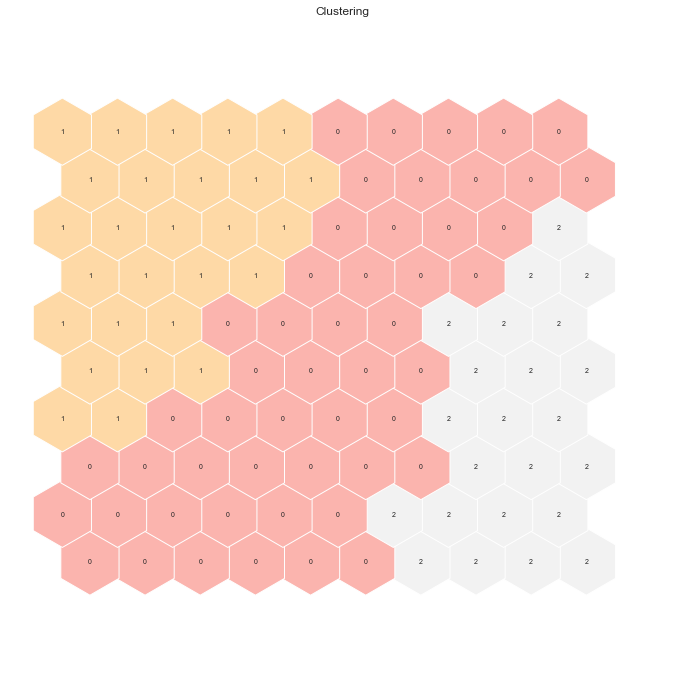

In [793]:
# Perform HC clustering on top of the 100 units
hierclust = AgglomerativeClustering(n_clusters=3, linkage='ward')
node_clus_labels = sm.cluster(hierclust)

# Show hit map
hits = HitMapView(12, 12, "Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [794]:
# Associate the nodes with the clusters
nodes_eco['hc_label'] = node_clus_labels

In [797]:
# Get cluster labels for each observation
som_hc_eco = som_bmus_eco.merge(nodes_eco['hc_label'], 'left', left_on="BMU", right_index=True)

#### 13.3.5. Best clustering solution

| Clustering algorithms                           | # of Clusters | Silhouette | Calinski and Harabasz | R²    |
|-------------------------------------------------|---------------|------------|-----------------------|-------|
| K-means                                         | 3             | 0.2935     | ~47000                | -     |
| K-means and Hierarchical Clustering             | 3             | 0.2559     | ~255                  | ~0.5  |
| Self-Organizing Map and K-means                 | 4             | 0.3672     | ~95                   | -     |
| Self-Organizing Map and Hierarchical Clustering | 3             | 0.3021     | ~80                   | ~0.6  |

To compare this four cluster solutions, we shouldn't compare the solutions with 3 clusters with the one with 4, as that is not a best practice (more clusters can lead to better scores and measures).

We will check the profilling of the K-means solution (3 clusters, and highest Calinski and Harabasz among the ones with 3 clusters - also, that metric's plot on the SOM + HC is very inconsistent) with the Self-Organizing Map and K-means (4 clusters, well defined clusters on the Silhouette plot) on the next step, and we will interpret and analyze the one we think has the best interpretability.

#### 13.3.6. Cluster Profilling

First, checking the cluster profiles of the SOM + K-means solution:

In [810]:
# Putting the variables 'object' in the right data types and drop 'BMU'
som_kmeans_eco = som_kmeans_eco.drop(columns='BMU').astype({'HV1': float, 
                                                            'HV3': float, 
                                                            'RHP1': float,
                                                            'IC5': float,
                                                            'HHAS4': float,
                                                            'LFC1': float,
                                                            'HOMEOWNR': 'int32',
                                                            'IC15': 'int32',
                                                            'IC16': 'int32',
                                                            'IC17': 'int32', 
                                                            'IC18': 'int32', 
                                                            'IC19': 'int32', 
                                                            'IC20': 'int32', 
                                                            'IC21': 'int32', 
                                                            'IC22': 'int32', 
                                                            'IC23': 'int32', 
                                                            'INCOME_1.0': 'int32', 
                                                            'INCOME_2.0': 'int32', 
                                                            'INCOME_3.0': 'int32', 
                                                            'INCOME_4.0': 'int32', 
                                                            'INCOME_5.0': 'int32', 
                                                            'INCOME_6.0': 'int32', 
                                                            'INCOME_7.0': 'int32', 
                                                            'WEALTH2_0.0': 'int32', 
                                                            'WEALTH2_1.0': 'int32', 
                                                            'WEALTH2_2.0': 'int32', 
                                                            'WEALTH2_3.0': 'int32', 
                                                            'WEALTH2_4.0': 'int32', 
                                                            'WEALTH2_5.0': 'int32', 
                                                            'WEALTH2_6.0': 'int32', 
                                                            'WEALTH2_7.0': 'int32', 
                                                            'WEALTH2_8.0': 'int32', 
                                                            'WEALTH2_9.0': 'int32', 
                                                          })

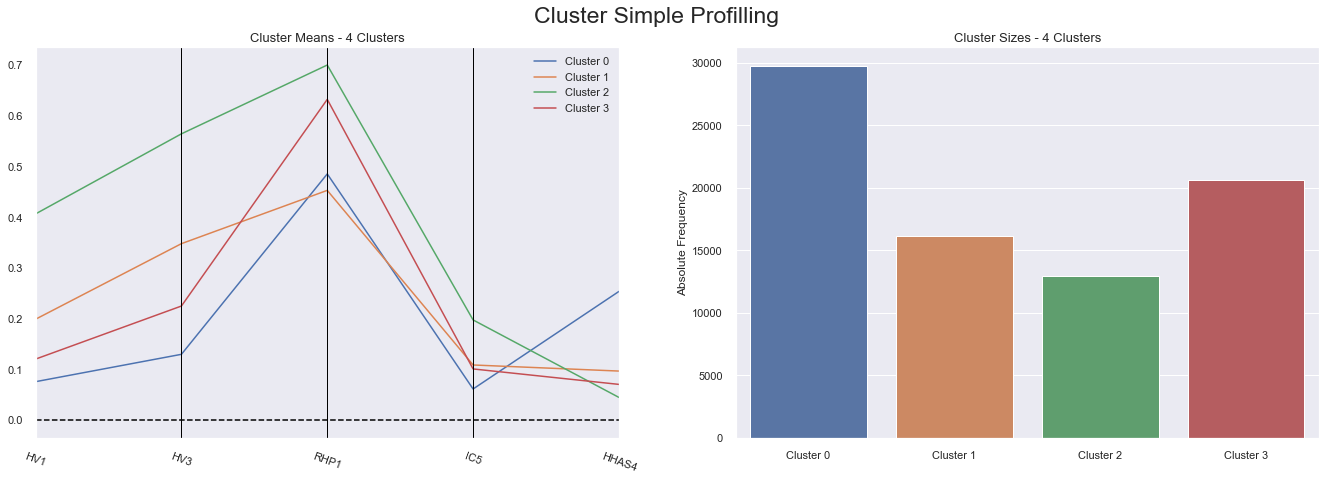

In [811]:
# SOM + K-means
cluster_profiles(som_kmeans_eco.drop(columns=economic_features_extra), ["km_label"], (23, 7))

In [813]:
# Getting the means of the 'extra' variables (means on binaries represent probabilities)
pd.set_option('display.max_columns', 30)
som_kmeans_eco[economic_features_extra + ['km_label']].groupby('km_label').mean()

HOMEOWNR       IC15       IC16       IC17       IC18       IC19  \
km_label                                                                    
0         0.477593  25.960461  22.244692  19.007928  18.263840  10.750571   
1         0.555672  10.848470  15.757898  17.921360  23.761731  21.155240   
2         0.644064   4.001774   5.818792   8.666512  16.715961  27.694284   
3         0.611711   8.637768  13.905071  17.376907  25.312103  23.482443   

               IC20      IC21      IC22      IC23      LFC1  INCOME_1.0  \
km_label                                                                  
0          2.309628  0.707001  0.255039  0.474066  0.611243    0.161415   
1          6.432148  2.082906  0.789861  1.263493  0.670384    0.086121   
2         16.250945  8.260896  3.909203  8.689578  0.701630    0.028466   
3          6.956023  2.143653  0.823413  1.363879  0.700794    0.067128   

          INCOME_2.0  INCOME_3.0  INCOME_4.0  INCOME_5.0  INCOME_6.0  \
km_label                                                               
0           0.354374    0.109816    0.124698    0.174651    0.039438   
1           0.180031    0.090448    0.181700    0.339165    0.073818   
2           0.036026    0.038571    0.096428    0.208517    0.238062   
3           0.164431    0.104906    0.177023    0.319707    0.086017   

          INCOME_7.0  WEALTH2_0.0  WEALTH2_1.0  WEALTH2_2.0  WEALTH2_3.0  \
km_label                                                                   
0           0.035609     0.114855     0.160642     0.203675     0.158761   
1           0.048717     0.018053     0.028068     0.069552     0.071036   
2           0.353930     0.003934     0.005709     0.009951     0.011263   
3           0.080787     0.012593     0.014917     0.030852     0.054294   

          WEALTH2_4.0  WEALTH2_5.0  WEALTH2_6.0  WEALTH2_7.0  WEALTH2_8.0  \
km_label                                                                    
0            0.135985     0.088619     0.074039     0.034433     0.016662   
1            0.150108     0.136631     0.209150     0.148624     0.119320   
2            0.023914     0.036797     0.067191     0.114943     0.212605   
3            0.076573     0.113963     0.177701     0.176781     0.230494   

          WEALTH2_9.0  
km_label               
0            0.012329  
1            0.049459  
2            0.513693  
3            0.111832

Now, checking the cluster profiles of the K-means solution:

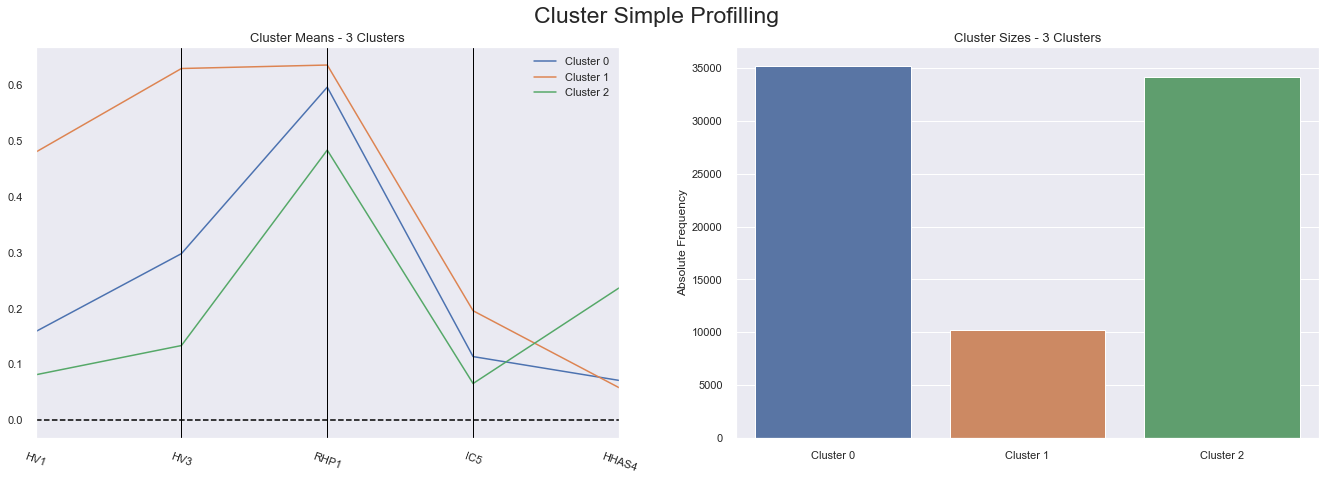

In [799]:
# K-means
cluster_profiles(kmeans_eco_df.drop(columns=economic_features_extra), ["k_means_labels"], (23, 7))

In [816]:
# Putting the binaries 'object' in int32
kmeans_eco_df = kmeans_eco_df.astype({'HOMEOWNR': 'int32'})

In [817]:
# Getting the means of the 'extra' variables (means on binaries represent probabilities)
kmeans_eco_df[economic_features_extra + ['k_means_labels']].groupby('k_means_labels').mean()

HOMEOWNR       IC15       IC16       IC17       IC18  \
k_means_labels                                                         
0               0.615398   8.196960  13.110057  16.409119  24.328352   
1               0.615873   5.070863   6.633076   9.367901  16.678526   
2               0.475382  24.561016  21.987398  19.148555  18.766075   

                     IC19       IC20      IC21      IC22      IC23      LFC1  \
k_means_labels                                                                 
0               24.117727   8.022301  2.759744  1.099602  1.959403  0.693418   
1               26.412179  15.474245  8.004301  3.838432  8.537289  0.698988   
2               11.338286   2.531299  0.792685  0.295030  0.557881  0.616723   

                INCOME_1.0  INCOME_2.0  INCOME_3.0  INCOME_4.0  INCOME_5.0  \
k_means_labels                                                               
0                 0.063437    0.140966    0.091222    0.179517    0.330028   
1                 0.033428    0.045450    0.038901    0.091291    0.220115   
2                 0.157611    0.348631    0.111043    0.126106    0.179356   

                INCOME_6.0  INCOME_7.0  WEALTH2_0.0  WEALTH2_1.0  WEALTH2_2.0  \
k_means_labels                                                                  
0                 0.092017    0.102813     0.010540     0.015256     0.035341   
1                 0.252663    0.318151     0.005962     0.006744     0.015639   
2                 0.041205    0.036047     0.105211     0.146885     0.191958   

                WEALTH2_3.0  WEALTH2_4.0  WEALTH2_5.0  WEALTH2_6.0  \
k_means_labels                                                       
0                  0.048068     0.086392     0.108608     0.171591   
1                  0.017691     0.054345     0.064119     0.103998   
2                  0.154417     0.139793     0.093752     0.088594   

                WEALTH2_7.0  WEALTH2_8.0  WEALTH2_9.0  
k_means_labels                                         
0                  0.162358     0.206875     0.154972  
1                  0.136644     0.188251     0.406607  
2                  0.042670     0.021482     0.015239

After analyzing both options, we decided to interpret the 3 cluster solution with K-means for the following reasons: <br>
- Because it has a more useful interpretation than the 4 clusters on SOM + K-means (here, the two middle-classes are very hard to separate, and the variable RHP1, on these algorithms, was not as useful as we initially thought); <br>
- Although Cluster_1 on the K-means solution has much less donors than the other two, we believe it has an useful reasoning: the more wealthy donors are part of this cluster and, generally, there are less wealthier people than middle-class and low income citizens in any country, even the USA. Also, these individuals are worth the development of a specific strategy, because they are wealthy, and may be willing to share their money with, in this case, an organization like PVA. <br>

From these results and the table with the average values on the binary variables, we will characterize and attribute a label to each cluster.

**Cluster_0: Middle-class Donors –** This cluster has average values for each feature that are always in between Cluster_1 and Cluster_2. In the generality of the variables, it is not characterized by a lot of wealth, neither poverty. The home value and rents on the neighborhood are below the median (which is 0.5, because they are scaled with MinMax). They live in neighborhoods with housing units that have a number of rooms above the median (bigger houses). Per capita income of the neighborhood is below median, but with a low percentage of people below poverty level. It is composed of around 35 000 donors.

**Cluster_1: Elite Donors –** In the generality of the variables, this cluster is characterized by being composed of many wealthy donors. The home value and rents on the neighborhood are high (expensive houses); they live in neighborhoods with housing units that have a lot of rooms (big houses); per capita income of the neighborhood is higher than in the other two clusters, and the percentage of people below poverty level is very low. It has the highest proportion of homeowners, families with high incomes, and donors with maximum ranking on the INCOME and WEALTH2 features (highest income groups of their states). It is composed of around 10 000 donors.

**Cluster_2: Low-Income Donors –** This cluster is almost the exact opposite of Cluster_1. It is characterized by having more poverty. The home value and rents on the neighborhood are the lowest; they live in neighborhoods with smaller houses; per capita income of the neighborhood is lower than in the other two clusters, and the percentage of people below poverty level is the highest. It has the highest proportion of families with low incomes, and donors with the minimum ranking on the INCOME (minimum rank is 1) and WEALTH2 (minimum rank is 0) features, which indicates many donors are part of the lowest income groups. It is composed of almost 35 000 donors.

### 13.4. Donation Perspective

#### 13.4.1. K-means

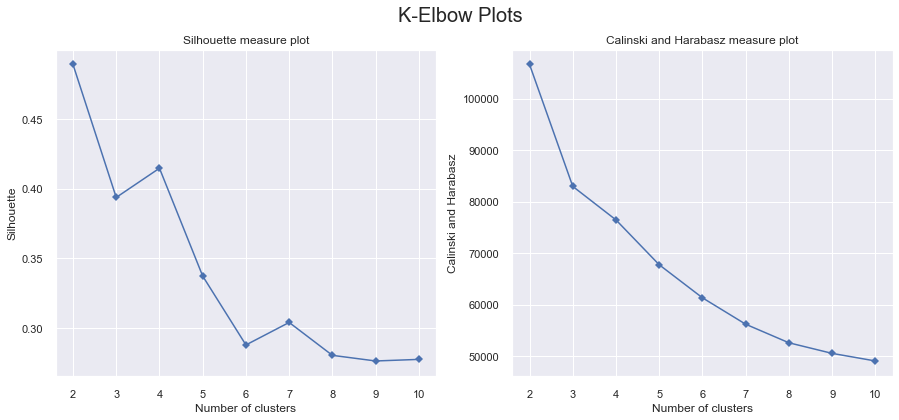

In [850]:
# Instantiate a K-Means model
clus_estim = KMeans(random_state=42) # Default is already 'k-means++' on init, and 10 on n_init, which is good

# K-elbow plots
kelbowplots(clus_estim, data_donation.drop(columns=donation_features_extra))

In this case, both elbow plots seem to have an elbow on 3 clusters. The Silhouette plot has a slight increase on 4 clusters, but it is very minimal.

We will complement this analysis with the visualization of the Silhouette plots, to get a better understanding of the quality of this cluster analysis with 2, 3, 4 or 5 clusters, focusing especially on 3 and 4.

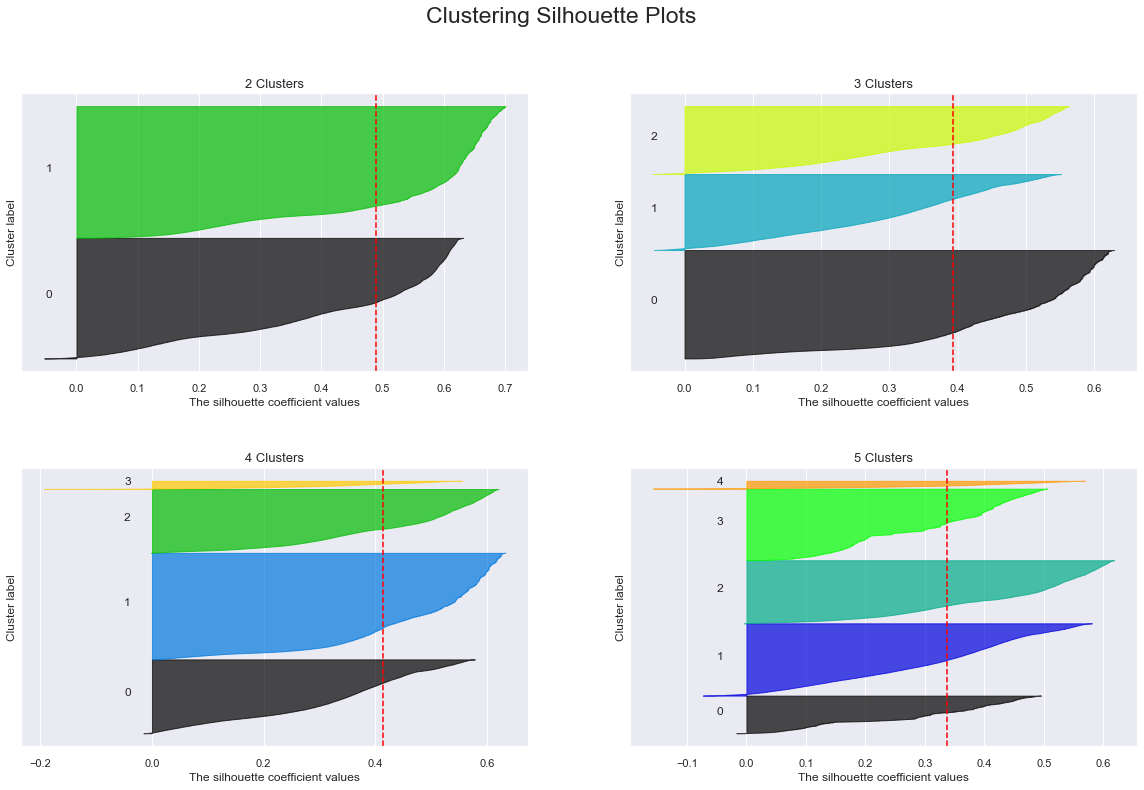

For n_clusters = 2, the average silhouette_score is: 0.4892
For n_clusters = 3, the average silhouette_score is: 0.3936
For n_clusters = 4, the average silhouette_score is: 0.4146
For n_clusters = 5, the average silhouette_score is: 0.3371


In [851]:
kmeans = KMeans(random_state=42)
silhouette_analysis(data_donation.drop(columns=donation_features_extra), kmeans, (2,2), (20,12), max_nclus=6)

From these plots, we visualize that the 4 cluster solution produces more samples wrongly assigned, and one cluster has a very small amount of samples.

Thus, we conclude that the 3 clusters solution is the most appropriate, as it has a higher Calinski and Harabasz score, and it also seems to produce better results on the Silhouette plot.

In [932]:
# Perform k-means
model_km_donation = KMeans(3, random_state=42)
model_km_donation.fit(data_donation.drop(columns=donation_features_extra))
clust_labels_km_donation = model_km_donation.predict(data_donation.drop(columns=donation_features_extra))
cent_km_donation = model_km_donation.cluster_centers_

In [933]:
# Appending the cluster labels to a new dataframe
kmeans_donation_df = data_donation.copy()
kmeans_donation_df["k_means_labels"] = clust_labels_km_donation

#### 13.4.2. K-means and Hierarchical Clustering

In this section we will apply the K-means algorithm together with the Hierarchical clustering algorithm.

We will first perform a k-means in order to reduce the number of observations to a smaller number (500 centroids) and then we will perform Hierarchical Clustering, to find out the appropriate cluster solution, without having to define the number of clusters.

In [856]:
# First, perform k-means with a high n_clusters (500)
model_km_hc_donation = KMeans(500, random_state=42)
model_km_hc_donation.fit(data_donation.drop(columns=donation_features_extra))
clust_labels_km_hc_donation = model_km_hc_donation.predict(data_donation.drop(columns=donation_features_extra))
cent_km_hc_donation = model_km_hc_donation.cluster_centers_

In [857]:
# Appending the cluster labels to a new dataframe
kmeans_hc_donation_df = data_donation.copy()
kmeans_hc_donation_df["k_means_hc_labels"] = clust_labels_km_hc_donation

In [858]:
# Getting the centroids of each cluster given by the K-means
kmeans_hc_donation_centroids = kmeans_hc_donation_df.drop(columns=donation_features_extra).groupby("k_means_hc_labels").mean()

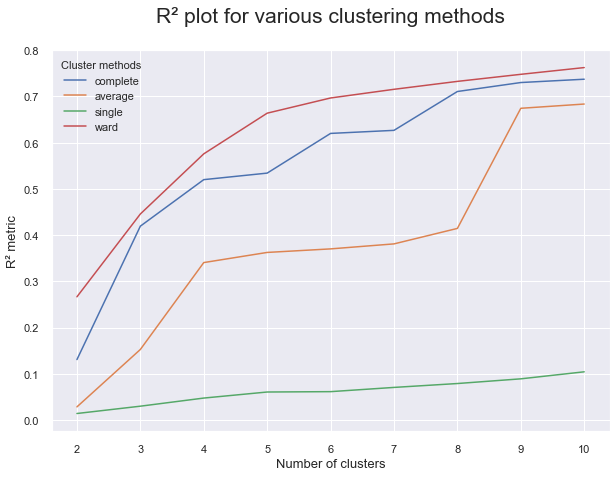

In [859]:
# R-square Plot, using the function from the previous step
r_sq_plot(kmeans_hc_donation_centroids)

With the R-square plot, we were able to choose the most adequate method, Ward, and it looks like there is an elbow at 5 clusters. We will also produce some visualizations to further help us.

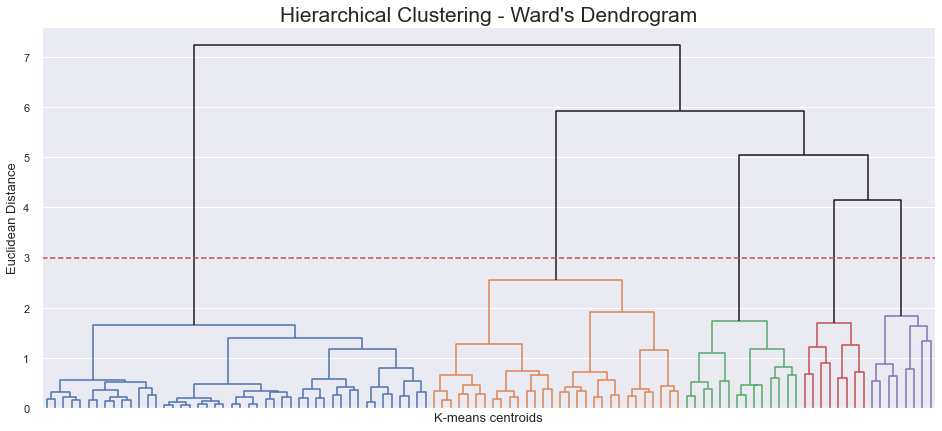

In [863]:
# Hierarchical clustering assessment using scipy
linkage_matrix = linkage(kmeans_hc_donation_centroids, method="ward")

# Plot the corresponding Dendrogram
sns.set()
fig = plt.figure(figsize=(16,7))

y_threshold = 3
dendrogram(linkage_matrix, truncate_mode='level', p=6, no_labels=True, 
           color_threshold=y_threshold, above_threshold_color='k')

plt.hlines(y_threshold, 0, 10000, colors="r", linestyles="dashed")
plt.title('Hierarchical Clustering - Ward\'s Dendrogram', fontsize=21)
plt.xlabel('K-means centroids', fontsize=13)
plt.ylabel('Euclidean Distance', fontsize=13)
plt.show()

With the cut-off defined above, we would retain 5 clusters, but this is a big number of clusters and there are some which have a low number of samples.

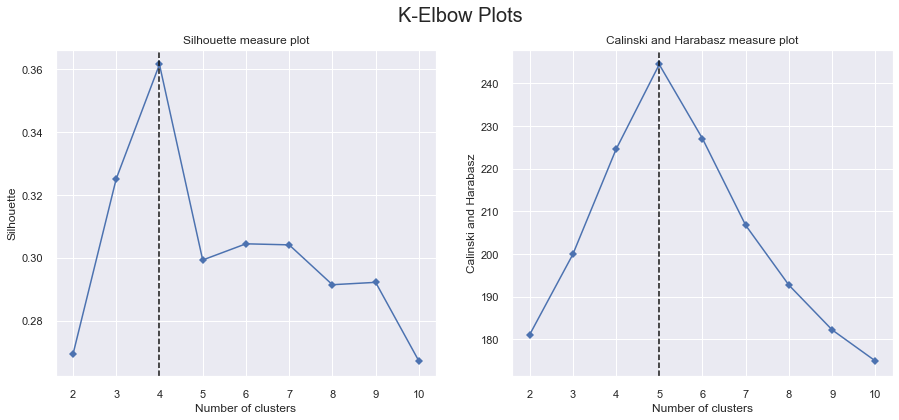

In [861]:
# Hierarchical clustering with linkage according to the plot above
hc_centroids = AgglomerativeClustering(linkage='ward')

# K-elbow plots
kelbowplots(hc_centroids, kmeans_hc_donation_centroids)

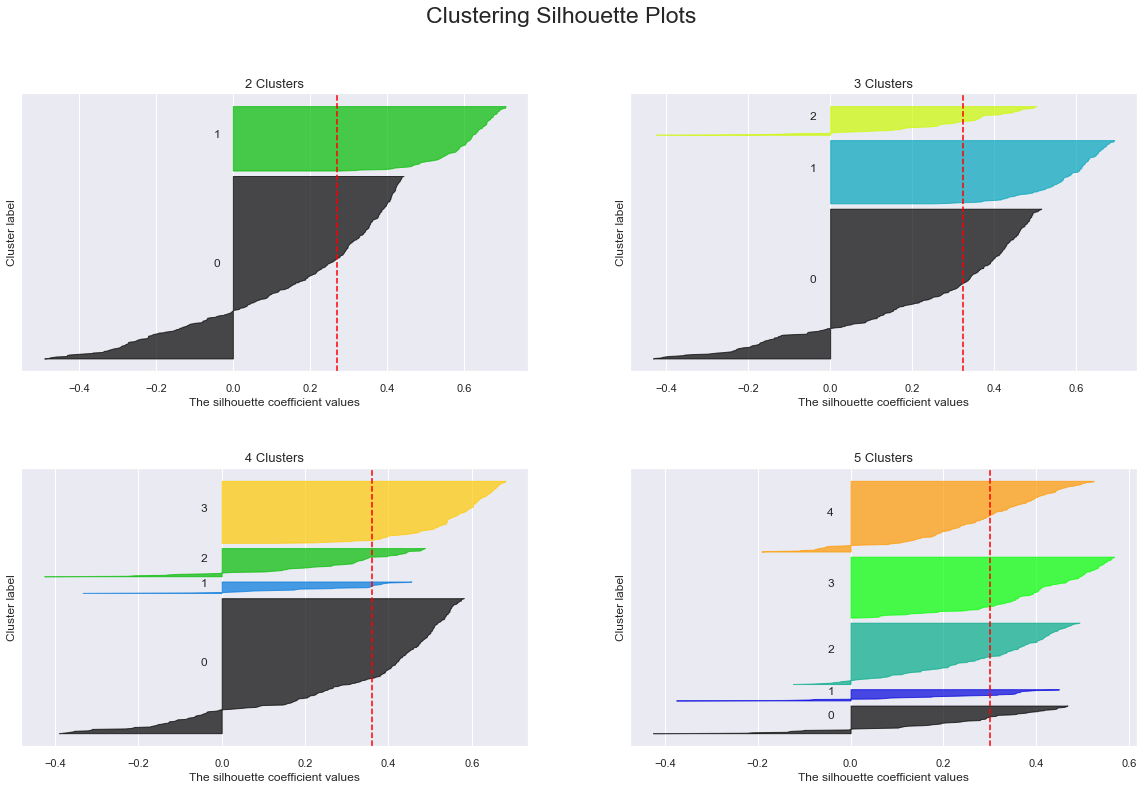

For n_clusters = 2, the average silhouette_score is: 0.2693
For n_clusters = 3, the average silhouette_score is: 0.3251
For n_clusters = 4, the average silhouette_score is: 0.3614
For n_clusters = 5, the average silhouette_score is: 0.2993


In [862]:
hc_estimator = AgglomerativeClustering(linkage='ward')
silhouette_analysis(kmeans_hc_donation_centroids, hc_estimator, (2,2), (20, 12), 5)

After analyzing the elbow plots and the Clustering Silhouette plots, there doesn't seem to be a clear choice for the number of clusters, and all of them lead to a lot of samples wrongly assigned to the clusters.

With this, we decided not to use this method, because it yielded very poor results, in terms of quality metrics.

#### 13.4.3. Self-Organizing Map and K-means

We decided to experiment the combination of these two algorithms, so we will perform a SOM with a big grid of neurons, which will then be grouped with K-means in order to find the appropriate number of clusters and an adequate solution.

In [864]:
# We're going to set a random seed for reproducibility
np.random.seed(42)

# Performing SOM
sm = sompy.SOMFactory().build(
    data_donation.drop(columns=donation_features_extra).values, 
    mapsize=(10, 10), # 10x10 grid
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=data_donation.drop(columns=donation_features_extra).columns
)
# Neighborhood function - 'gaussian': the units will update according to a Normal distribution (the closer points get 
# closer than the far away ones)

sm.train(n_job=-1, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.108000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  2.644000, quantization error: 4.753271

 epoch: 2 ---> elapsed time:  0.337000, quantization error: 2.089125

 epoch: 3 ---> elapsed time:  0.355000, quantization error: 1.998728

 epoch: 4 ---> elapsed time:  0.330000, quantization error: 1.928116

 epoch: 5 ---> elapsed time:  0.323000, quantization error: 1.910386

 epoch: 6 ---> elapsed time:  0.398000, quantization error: 1.904665

 epoch: 7 ---> elapsed time:  0.303000, quantization error: 1.899370

 epoch: 8 ---> elapsed time:  0.286000, quantization error: 1.890590

 epoch: 9 ---> elapsed time:  0.290000, quantization error: 1.880736

 epoch: 10 ---> elapsed time:  0.280000, quantization error: 1.875541

 epoch: 11 ---> elapsed time:  0.284000, quantization error: 1.871706

 epoch: 12 ---> elapsed time:  0.262000, quantization error: 1.868102

 epoch: 13 ---> 

 epoch: 14 ---> elapsed time:  0.280000, quantization error: 0.951740

 epoch: 15 ---> elapsed time:  0.300000, quantization error: 0.951107

 epoch: 16 ---> elapsed time:  0.308000, quantization error: 0.950430

 epoch: 17 ---> elapsed time:  0.325000, quantization error: 0.949852

 epoch: 18 ---> elapsed time:  0.287000, quantization error: 0.949514

 epoch: 19 ---> elapsed time:  0.304000, quantization error: 0.949171

 epoch: 20 ---> elapsed time:  0.306000, quantization error: 0.948874

 epoch: 21 ---> elapsed time:  0.297000, quantization error: 0.948515

 epoch: 22 ---> elapsed time:  0.278000, quantization error: 0.948033

 epoch: 23 ---> elapsed time:  0.277000, quantization error: 0.947545

 epoch: 24 ---> elapsed time:  0.302000, quantization error: 0.947065

 epoch: 25 ---> elapsed time:  0.276000, quantization error: 0.946550

 epoch: 26 ---> elapsed time:  0.279000, quantization error: 0.946183

 epoch: 27 ---> elapsed time:  0.301000, quantization error: 0.945850

 epoch

In [865]:
# Obtaining SOM's BMUs labels for each observation
som_bmus_donation = pd.DataFrame(
    np.concatenate((data_donation, np.expand_dims(sm._bmu[0], 1)), axis=1),
    index=data_donation.index, columns=np.append(data_donation.columns, "BMU")
)

In [867]:
print("SOM quantization error on the Donation perspective: {0:.3f}".format(sm.calculate_quantization_error()))

SOM quantization error on the Donation perspective: 0.314


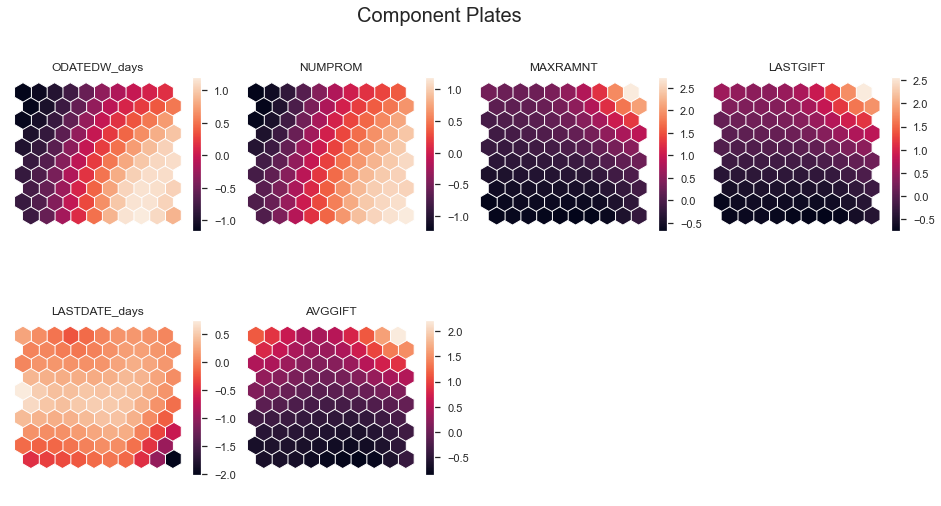

In [877]:
# Visualizing the Component plates (feature values) on the 10x10 grids
sns.set()

view2D = View2D(12, 12, "", text_size=10)
view2D.show(sm, col_sz=4, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Plates", fontsize=20)
plt.show()

We will now proceed to group the units found by the Self-Organizing Map with K-means.

In [878]:
# Get the nodes
nodes_donation = pd.DataFrame(sm.get_node_vectors(), columns=data_donation.drop(columns=donation_features_extra).columns)

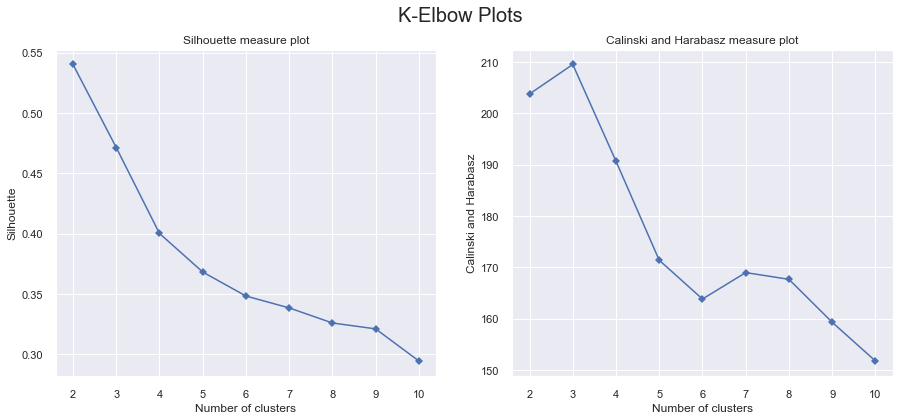

In [879]:
# Kmeans with sklearn
kmeans = KMeans(random_state=42)

# Elbow plots
kelbowplots(kmeans, nodes_donation)

The 2 elbow graphs seem to have elbows on different numbers of clusters: 4 on the Silhouette plot, and 3 on the Calinski and Harabasz plot.

To complement these visualizations, we will plot the Clustering Silhouettes to, hopefully, get a better understanding on what is the ideal number of clusters.

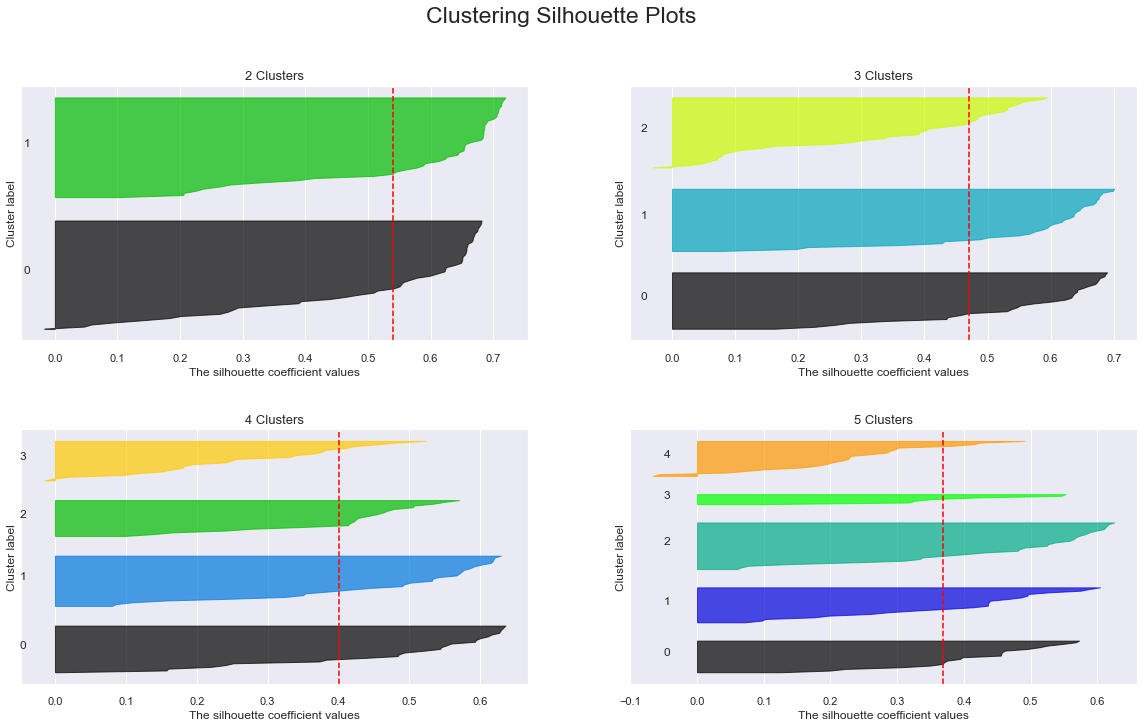

For n_clusters = 2, the average silhouette_score is: 0.5402
For n_clusters = 3, the average silhouette_score is: 0.4714
For n_clusters = 4, the average silhouette_score is: 0.4002
For n_clusters = 5, the average silhouette_score is: 0.3682


In [880]:
# Same function
estimator = KMeans(random_state=42)
silhouette_analysis(nodes_donation, estimator, (2,2), (20, 11), 5)

After visualizing these last plots, in our opinion, we should keep 3 clusters, as the plot shows a very low amount of samples assigned to the wrong cluster, with a high Silhouette score and Calinski and Harabasz score.

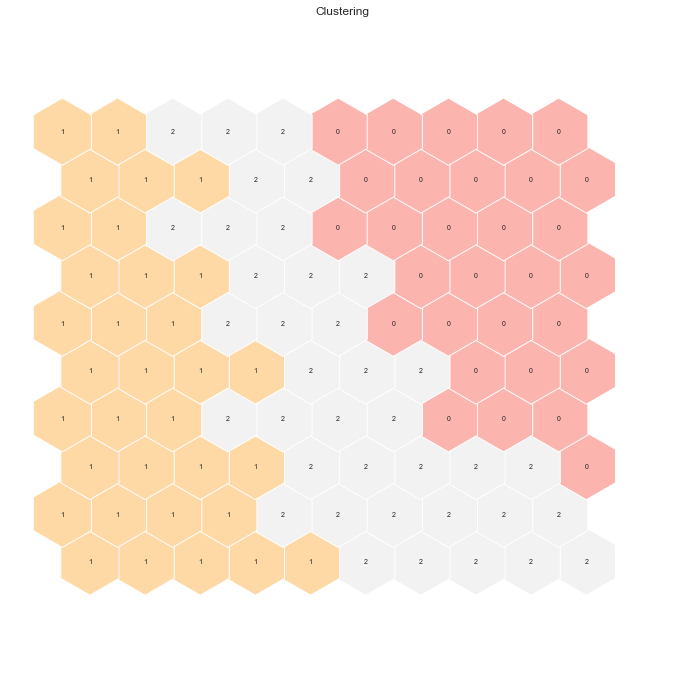

In [881]:
# Perform K-Means clustering on top of the 100 units
model_som_km_donation = KMeans(n_clusters=3, random_state=42)
node_clus_labels = sm.cluster(model_som_km_donation)

# Show hit map
hits = HitMapView(12, 12, "Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [884]:
# Associate the nodes with the clusters
nodes_donation['km_label'] = node_clus_labels

In [885]:
# Get cluster labels for each observation
som_kmeans_donation = som_bmus_donation.merge(nodes_donation['km_label'], 'left', left_on="BMU", right_index=True)

#### 13.4.4. Self-Organizing Map and Hierarchical Clustering

We also decided to experiment the combination of these two algorithms, so we will perform a SOM with a big grid of neurons, which will then be grouped with Hierarchical Clustering in order to find the appropriate number of clusters and an adequate solution.

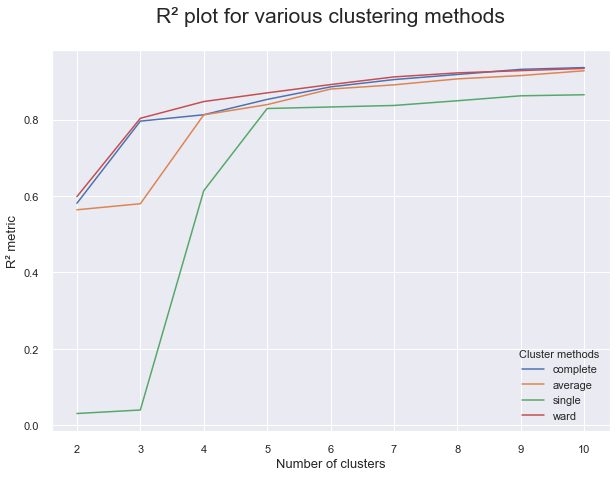

In [888]:
# R-square Plot, using the function from the previous step
r_sq_plot(nodes_donation.drop(columns='km_label'))

When analyzing the R-square plot, we decided to proceed with Ward, the best linkage above. Also, there is a clear elbow on the 3 cluster solution.

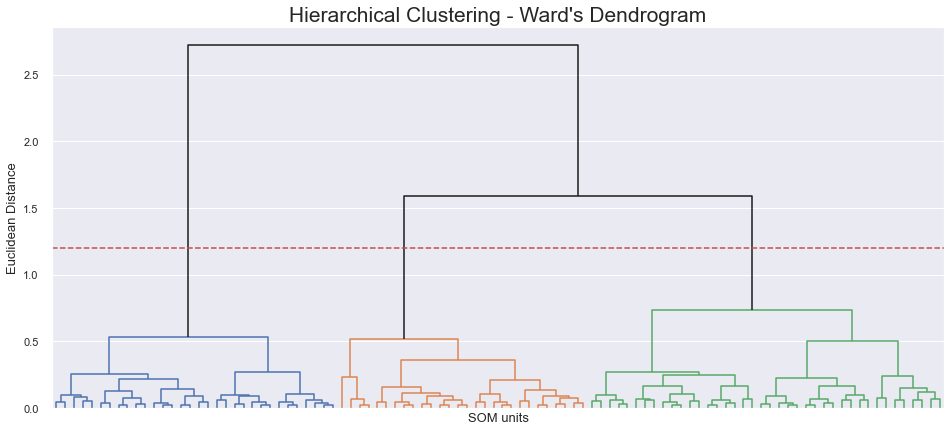

In [890]:
# Hierarchical clustering assessment using scipy
linkage_matrix = linkage(nodes_donation.drop(columns='km_label'), method="ward")

# Plot the corresponding Dendrogram
sns.set()
fig = plt.figure(figsize=(16,7))

y_threshold = 1.2
dendrogram(linkage_matrix, no_labels=True, 
           color_threshold=y_threshold, above_threshold_color='k')

plt.hlines(y_threshold, 0, 10000, colors="r", linestyles="dashed")
plt.title('Hierarchical Clustering - Ward\'s Dendrogram', fontsize=21)
plt.xlabel('SOM units', fontsize=13)
plt.ylabel('Euclidean Distance', fontsize=13)
plt.show()

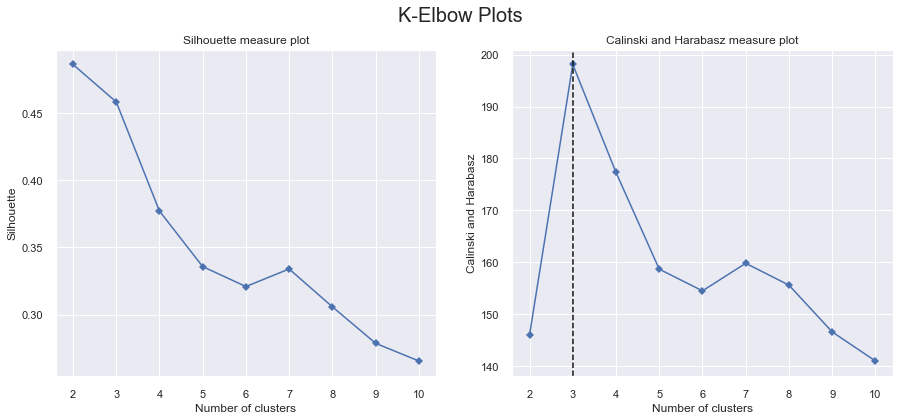

In [891]:
# Hierarchical clustering with sklearn
som_hc = AgglomerativeClustering(linkage='ward')

# K-elbow plots
kelbowplots(som_hc, nodes_donation.drop(columns='km_label'))

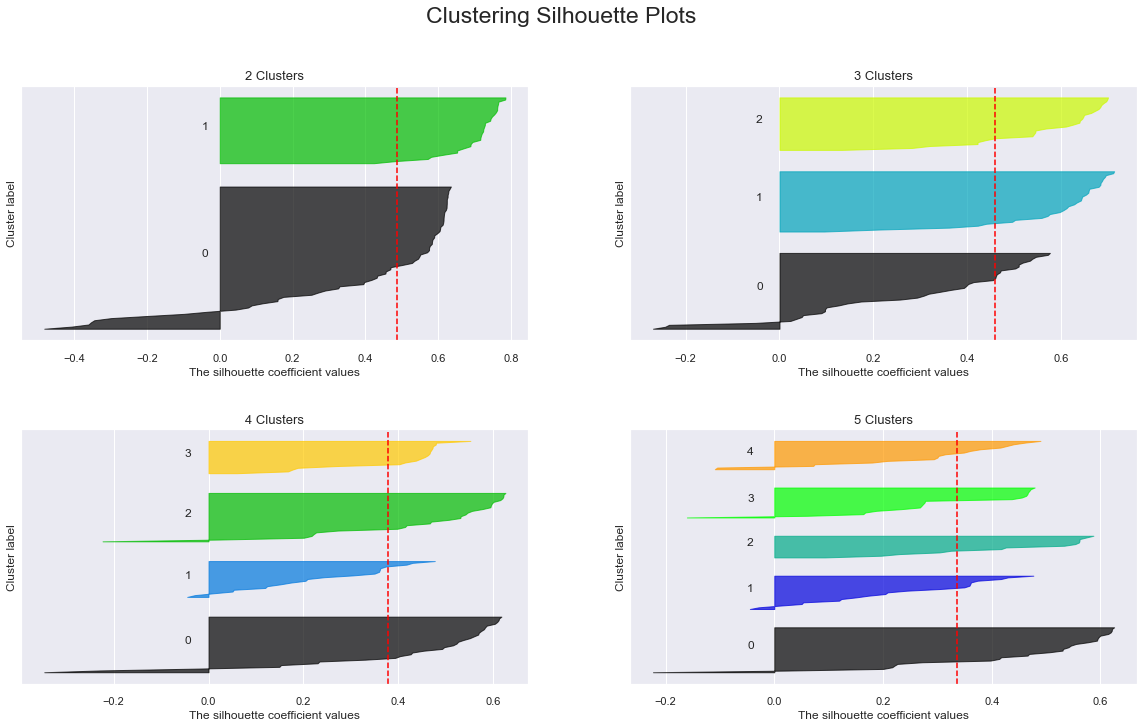

For n_clusters = 2, the average silhouette_score is: 0.486
For n_clusters = 3, the average silhouette_score is: 0.4582
For n_clusters = 4, the average silhouette_score is: 0.377
For n_clusters = 5, the average silhouette_score is: 0.3357


In [892]:
# Function defined above
estimator = AgglomerativeClustering(linkage='ward')
silhouette_analysis(nodes_donation.drop(columns='km_label'), estimator, (2,2), (20, 11), 5)

Using the Ward linkage, most metrics and plots indicate the 3 cluster solution as the best, so we will keep it, even though there are some wrongly assigned samples on Cluster_0.

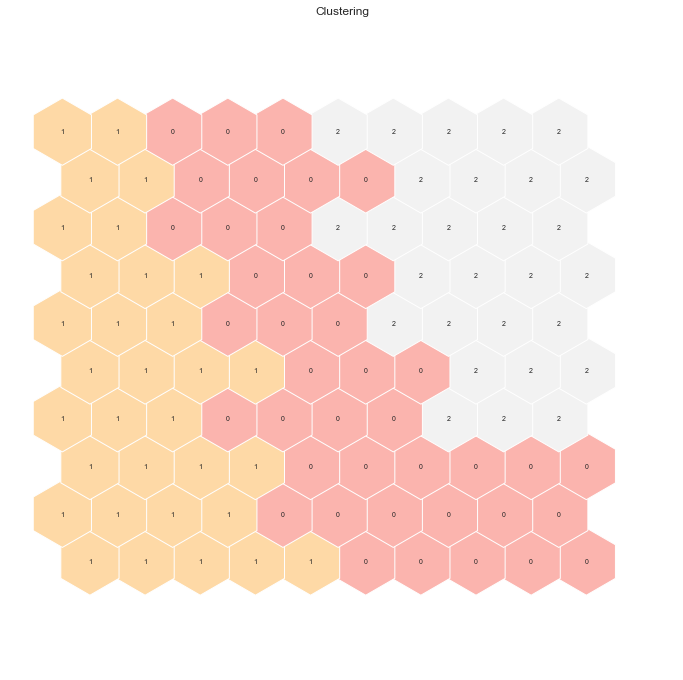

In [893]:
# Perform HC clustering on top of the 100 units
hierclust = AgglomerativeClustering(n_clusters=3, linkage='ward')
node_clus_labels = sm.cluster(hierclust)

# Show hit map
hits = HitMapView(12, 12, "Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [894]:
# Associate the nodes with the clusters
nodes_donation['hc_label'] = node_clus_labels

In [897]:
# Get cluster labels for each observation
som_hc_donation = som_bmus_donation.merge(nodes_donation['hc_label'], 'left', left_on="BMU", right_index=True)

#### 13.2.5. Best clustering solution

| Clustering algorithms                           | # of Clusters | Silhouette | Calinski and Harabasz | R²    |
|-------------------------------------------------|---------------|------------|-----------------------|-------|
| K-means                                         | 3             | 0.3936     | ~82000                | -     |
| K-means and Hierarchical Clustering             | -             | -          | -                     | -     |
| Self-Organizing Map and K-means                 | 3             | 0.4714     | ~210                  | -     |
| Self-Organizing Map and Hierarchical Clustering | 3             | 0.4582     | ~200                  | ~0.8  |

Among the 3 clustering solution found, we will compare the profilling of the Self-Organizing Map and K-means with the Self-Organizing Map and Hierarchical Clustering, as the solutions seem very similar in terms of quality metrics. The only thing that seems to improve on the SOM + K-means solution, is the very reduced number of samples wrongly assigned to the clusters.

In the next step, we will interpret and analyze the one we think has the best interpretability.

#### 13.2.6. Cluster Profilling

First, checking the cluster profiles of the SOM + HC solution:

In [903]:
# Putting the variables 'object' in the right data types and drop 'BMU'
som_hc_donation = som_hc_donation.drop(columns='BMU').astype({'ODATEDW_days': float, 
                                                              'NUMPROM': float, 
                                                              'RAMNTALL_AVG': float,
                                                              'NGIFTALL': float,
                                                              'MAXRAMNT': float,
                                                              'LASTGIFT': float,
                                                              'LASTDATE_days': float,
                                                              'AVGGIFT': float,
                                                              'VETERANS': 'int32', 
                                                              'PHOTO': 'int32', 
                                                              'WALKER': 'int32', 
                                                              'KIDSTUFF': 'int32', 
                                                              'RECPGVG': 'int32', 
                                                              'RECSWEEP': 'int32'
                                                            })

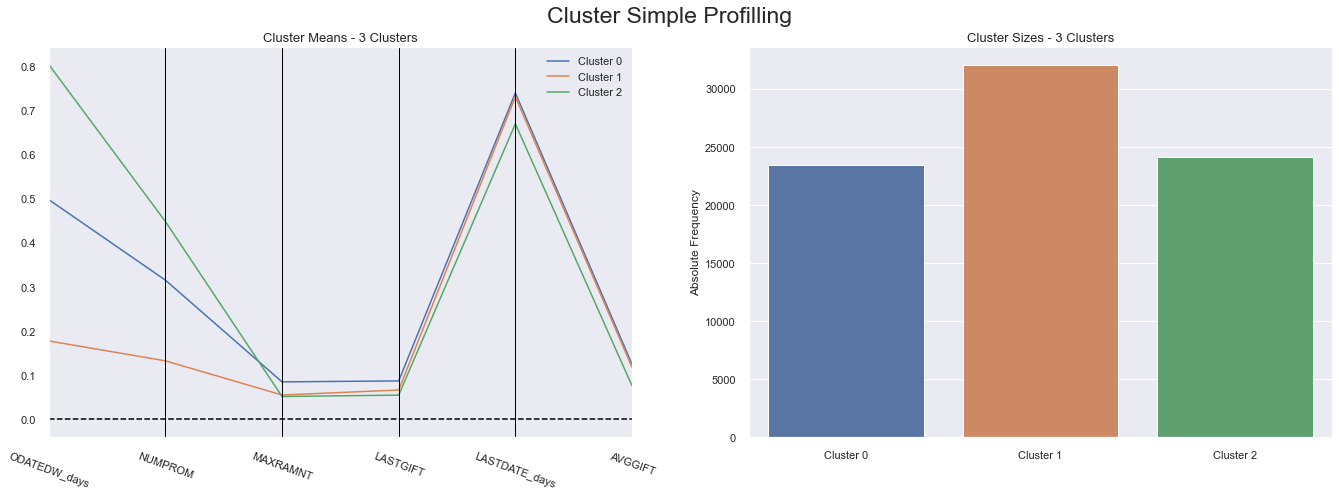

In [905]:
# SOM + K-means
cluster_profiles(som_hc_donation.drop(columns=donation_features_extra), ["hc_label"], (23, 7))

In [906]:
# Getting the means of the 'extra' variables (means on binaries represent probabilities)
som_hc_donation[donation_features_extra + ['hc_label']].groupby('hc_label').mean()

VETERANS     PHOTO    WALKER  KIDSTUFF   RECPGVG  RECSWEEP  \
hc_label                                                               
0         0.106840  0.048769  0.107394  0.015574  0.000981  0.006784   
1         0.106084  0.054464  0.113958  0.018592  0.000469  0.004406   
2         0.118816  0.046821  0.111226  0.013561  0.000954  0.024136   

          NGIFTALL  RAMNTALL_AVG  
hc_label                          
0         0.058081      0.053796  
1         0.017588      0.041247  
2         0.114756      0.042133

Now, checking the cluster profiles of the SOM + K-means solution:

In [908]:
# Putting the variables 'object' in the right data types and drop 'BMU'
som_kmeans_donation = som_kmeans_donation.drop(columns='BMU').astype({'ODATEDW_days': float, 
                                                                      'NUMPROM': float, 
                                                                      'RAMNTALL_AVG': float,
                                                                      'NGIFTALL': float,
                                                                      'MAXRAMNT': float,
                                                                      'LASTGIFT': float,
                                                                      'LASTDATE_days': float,
                                                                      'AVGGIFT': float,
                                                                      'VETERANS': 'int32', 
                                                                      'PHOTO': 'int32', 
                                                                      'WALKER': 'int32', 
                                                                      'KIDSTUFF': 'int32', 
                                                                      'RECPGVG': 'int32', 
                                                                      'RECSWEEP': 'int32'
                                                                    })

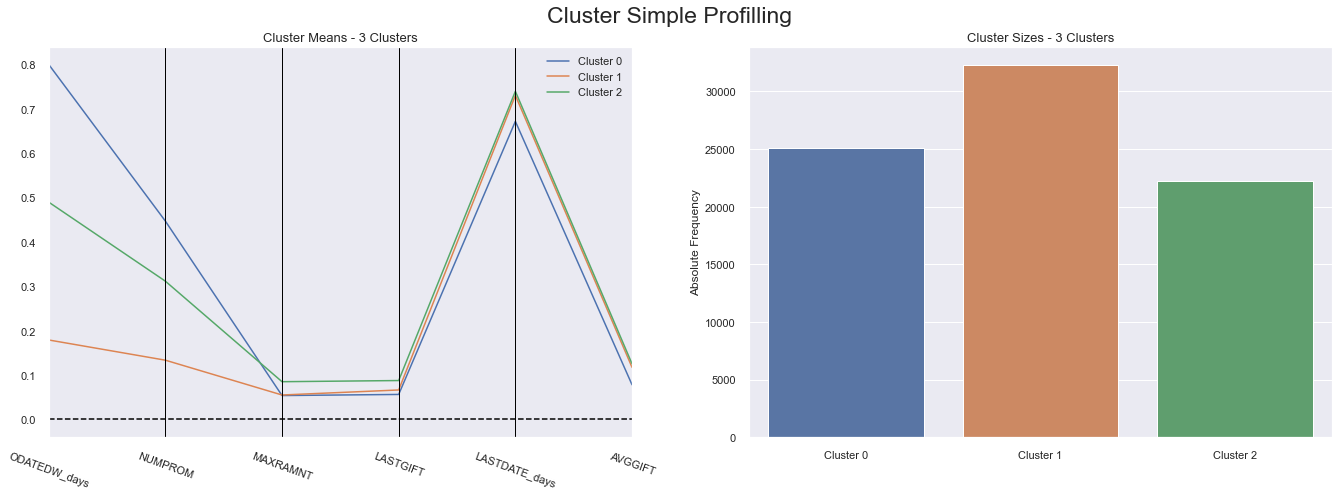

In [910]:
# SOM + K-means
cluster_profiles(som_kmeans_donation.drop(columns=donation_features_extra), ["km_label"], (23, 7))

In [911]:
# Getting the means of the 'extra' variables (means on binaries represent probabilities)
som_kmeans_donation[donation_features_extra + ['km_label']].groupby('km_label').mean()

VETERANS     PHOTO    WALKER  KIDSTUFF   RECPGVG  RECSWEEP  \
km_label                                                               
0         0.118639  0.046906  0.112063  0.013470  0.000956  0.023791   
1         0.106297  0.054419  0.113735  0.018532  0.000465  0.004370   
2         0.106209  0.048756  0.106525  0.015817  0.000991  0.006489   

          NGIFTALL  RAMNTALL_AVG  
km_label                          
0         0.113683      0.042800  
1         0.017876      0.041202  
2         0.056857      0.053771

After analyzing the clustering options, we decided to interpret the 3-cluster solution with SOM and K-means for the following reasons: although it gives similar results in cluster profiling, SOM + Hierarchical had worst results in the Calinski and Harabasz measure, which suggest the clusters weren’t as distinct from each other; also, in the Silhouette score and through the Silhouette plots, the composition of the clusters wasn’t as good.

Before going into more detail about each cluster, it is interesting to highlight that all clusters have a similar behavior, apart from their longevity with the organization. In general, these donors don’t donate big amounts, the max amount ever gifted is lower than the average amount of all the gifts, the older donors tend to gift smaller amounts on average than more recent donors, but they are the ones who donated more recently as well. The biggest cluster is composed by more recent donors, which suggests an increase of donors throughout the years. Although there is a somewhat lack of variability on these clusters, we still found these insights interesting and unexpected.

From these results and the table with the average values on the binary variables, we will characterize and attribute a label to each cluster.

**Cluster_0: Loyal donors –** This cluster is composed by the donors which have been donating for the longest time. Although they’re the ones who averagely donate less money, they are the ones who donated most recently as well, which may suggest that they are frequent donors. Finally, this is the cluster in which the sweepstakes campaigns had a bigger response, which can be explored in the marketing campaigns, and they’re the ones who gave more gifts to the organization to date.

**Cluster_1: New and Independent Donors –** This cluster is composed by the donors who started donating most recently and this is the biggest cluster in terms of donors (more than 30 000), which suggests a bigger awareness of the topic and/or about the organization itself. One interesting fact about this group is that they are the ones who have a bigger interest in photos, which can be explored in the marketing campaigns. They are the ones who responded less to sweepstakes campaigns, which might suggest that they don’t need a “reward” for donating, so they are more independent in the donating decision.

**Cluster_2: Bigger Donors –** This cluster is composed by the donors who donated more in terms of monetary value and it’s the smallest one, which might make sense according to the rationale that there will be less people donating more money. Yearly, they are the ones who donated more throughout their giving history.

### 13.5. Cluster Concatenation

In [949]:
# Get df with all variables
pva_clusters = data_social.merge(data_eco, on='CONTROLN').merge(data_donation, on='CONTROLN')

# Get the clusters labels of the 3 perspectives on the final df
pva_clusters = pva_clusters.merge(som_kmeans_social['km_label'], 'left', on="CONTROLN")\
                                 .rename(columns={'km_label':'social_label'})

pva_clusters = pva_clusters.merge(kmeans_eco_df['k_means_labels'], 'left', on="CONTROLN")\
                                 .rename(columns={'k_means_labels':'eco_label'})

pva_clusters = pva_clusters.merge(som_kmeans_donation['km_label'], 'left', on="CONTROLN")\
                                 .rename(columns={'km_label':'donation_label'})

# Get the concatenated versions for the 36 clusters
pva_clusters["concat"] = pva_clusters.loc[:, ["social_label", "eco_label", "donation_label"]]\
                                         .apply(lambda x: "_".join(map(str,x.to_list())), axis=1)

In [974]:
# Putting the variables 'object' in the right datatypes
pva_clusters = pva_clusters.astype({'CHILD': 'int32', 
                                    'BABYBOOMER_donor': 'int32', 
                                    'HOMEOWNR': 'int32',
                                    'VETERANS': 'int32',
                                    'PHOTO': 'int32',
                                    'WALKER': 'int32',
                                    'KIDSTUFF': 'int32',
                                    'RECPGVG': 'int32',
                                    'RECSWEEP': 'int32'
                                   })

In [976]:
# Producing centroids to cluster the clusters of the 3 perspectives
pva_clusters_mean = pva_clusters.drop(columns=['social_label', 'eco_label', 'donation_label'])\
                                     .groupby(by="concat").mean()

We will now apply Hierarchical Clustering on the "centroids" of the clusters of the 3 perspectives, in order to concatenate them and develop the marketing approaches to those concatenations.

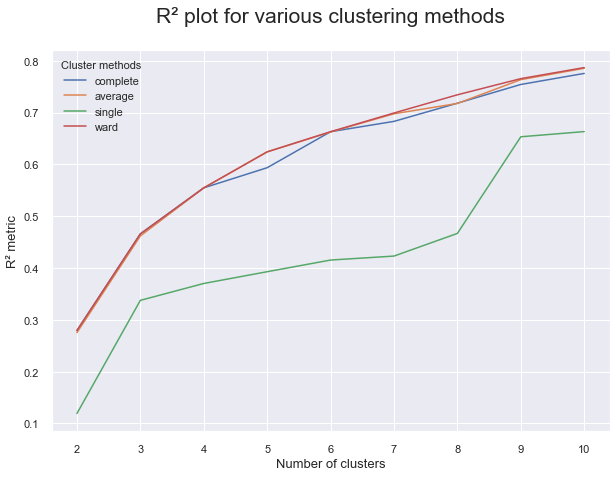

In [981]:
# R-square Plot, using the function from the previous step
r_sq_plot(pva_clusters_mean.drop(columns=social_features_extra+economic_features_extra+donation_features_extra))

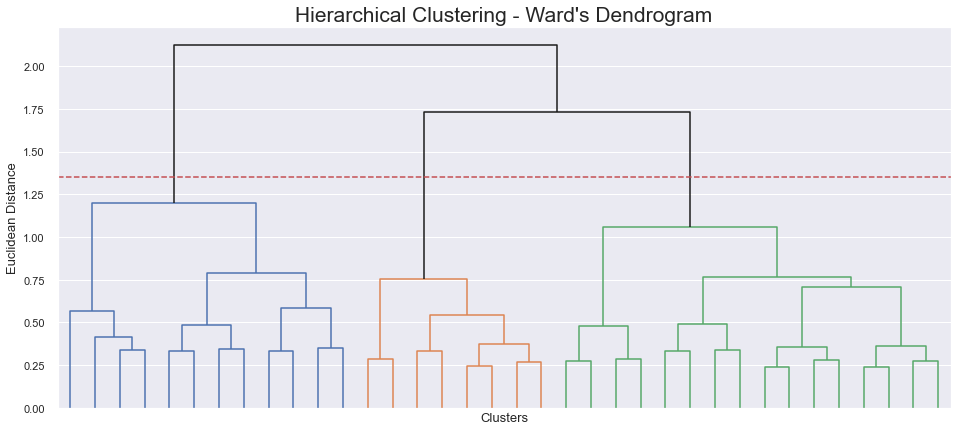

In [984]:
# Hierarchical clustering assessment using scipy
linkage_matrix = linkage(pva_clusters_mean.drop(columns=social_features_extra+economic_features_extra+donation_features_extra), method="ward")

# Plot the corresponding Dendrogram
sns.set()
fig = plt.figure(figsize=(16,7))

y_threshold = 1.35
dendrogram(linkage_matrix, no_labels=True, 
           color_threshold=y_threshold, above_threshold_color='k')

plt.hlines(y_threshold, 0, 10000, colors="r", linestyles="dashed")
plt.title('Hierarchical Clustering - Ward\'s Dendrogram', fontsize=21)
plt.xlabel('Clusters', fontsize=13)
plt.ylabel('Euclidean Distance', fontsize=13)
plt.show()

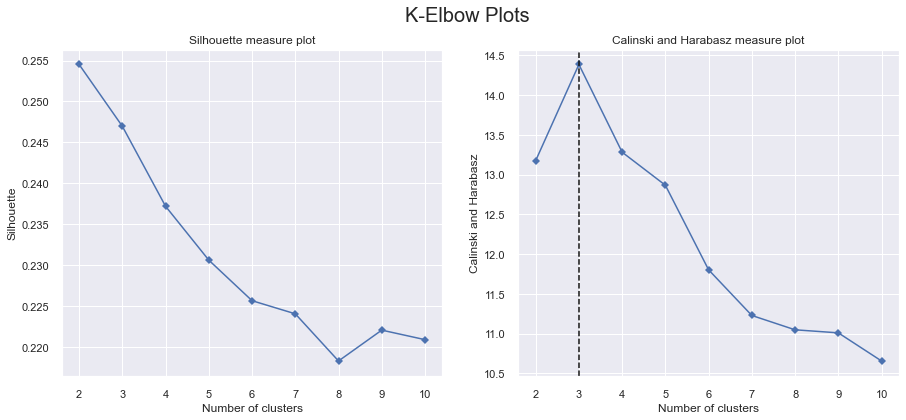

In [985]:
# Hierarchical clustering with sklearn
concat_hc = AgglomerativeClustering(linkage='ward')

# K-elbow plots
kelbowplots(concat_hc, pva_clusters_mean.drop(columns=social_features_extra+economic_features_extra+donation_features_extra))

From the methods above, we decided that 3 clusters would be the best option, with the Ward linkage , so we will perform the HC with n_clusters=3.

In [986]:
# Perform the final HC on the centroids
model_hc_final = AgglomerativeClustering(n_clusters=3, linkage='ward')
clust_labels_final = model_hc_final.fit_predict(pva_clusters_mean.drop(columns=social_features_extra+economic_features_extra+donation_features_extra))

In [988]:
# Appending the cluster labels to a new dataframe
pva_clusters_mean_df = pva_clusters_mean.copy()
pva_clusters_mean_df["final_labels"] = clust_labels_final

In [996]:
# Get cluster labels for each observation
pva_clusters_df = pva_clusters.merge(pva_clusters_mean_df['final_labels'], 'left', left_on="concat", right_index=True)\
                              .drop(columns=['social_label', 'eco_label', 'donation_label', 'concat'])

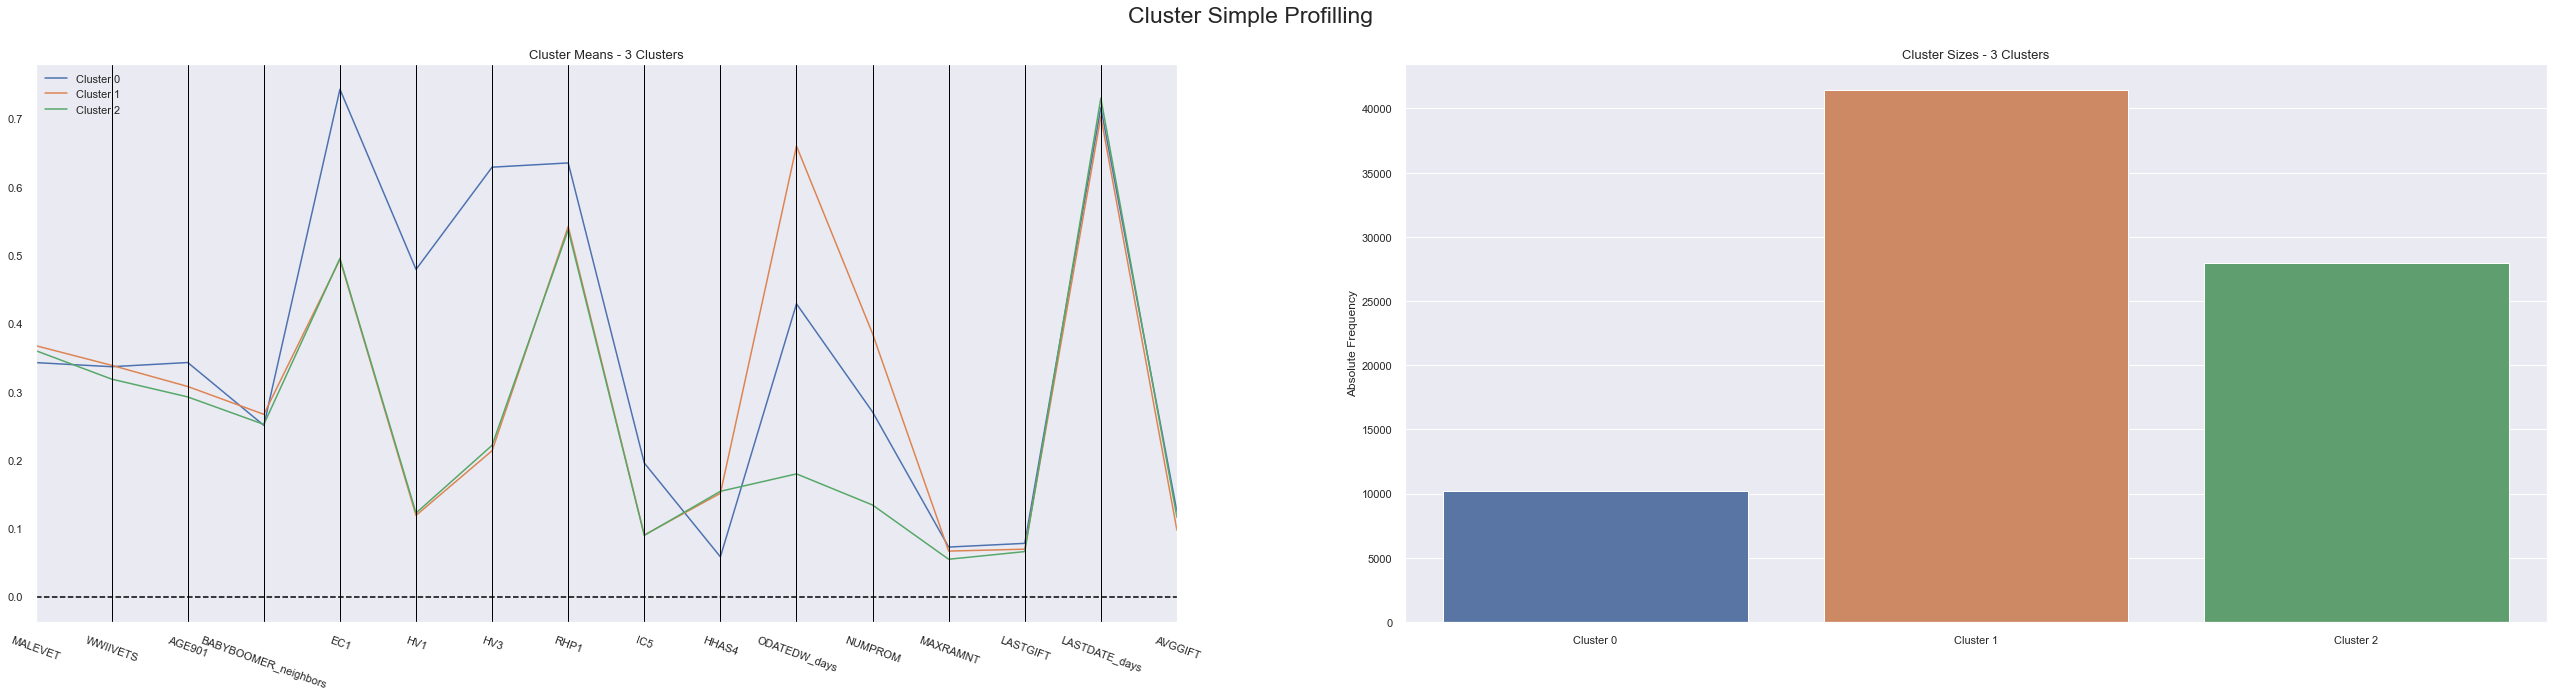

In [1009]:
# Final concatenation
cluster_profiles(pva_clusters_df.drop(columns=social_features_extra+economic_features_extra+donation_features_extra), ["final_labels"], (45, 10))

In [1012]:
# Getting the means of the 'extra' variables (means on binaries represent probabilities) - Social
pva_clusters_df[social_features_extra+['final_labels']].groupby('final_labels').mean()

CHILD      TPE3  BABYBOOMER_donor     MARR1       AGE  \
final_labels                                                             
0             0.141726  3.883882          0.244453  0.650728  0.368494   
1             0.131117  2.009493          0.296367  0.642332  0.403530   
2             0.175655  2.260170          0.232667  0.637219  0.338629   

              MALEMILI  GENDER_F  GENDER_J  GENDER_M  GENDER_U  GEOCODE2_A  \
final_labels                                                                 
0             0.007319  0.520672  0.003421  0.419021  0.056886    0.852507   
1             0.009135  0.539326  0.004638  0.404536  0.051500    0.276149   
2             0.012599  0.550781  0.002435  0.407535  0.039249    0.301855   

              GEOCODE2_B  GEOCODE2_C  GEOCODE2_D  
final_labels                                      
0               0.126478    0.017985    0.003030  
1               0.317793    0.185830    0.220228  
2               0.332832    0.182173    0.183140

In [1013]:
# Getting the means of the 'extra' variables (means on binaries represent probabilities) - Economic
pva_clusters_df[economic_features_extra+['final_labels']].groupby('final_labels').mean()

HOMEOWNR       IC15       IC16       IC17       IC18       IC19  \
final_labels                                                                    
0             0.615873   5.070863   6.633076   9.367901  16.678526  26.412179   
1             0.547297  16.241002  17.580801  17.829678  21.545872  17.740615   
2             0.545266  16.267691  17.329824  17.650587  21.656568  17.955988   

                   IC20      IC21      IC22      IC23      LFC1  INCOME_1.0  \
final_labels                                                                  
0             15.474245  8.004301  3.838432  8.537289  0.698988    0.033428   
1              5.269023  1.789990  0.708029  1.282598  0.650267    0.122252   
2              5.394320  1.793762  0.696963  1.250179  0.663672    0.091319   

              INCOME_2.0  INCOME_3.0  INCOME_4.0  INCOME_5.0  INCOME_6.0  \
final_labels                                                               
0               0.045450    0.038901    0.091291    0.220115    0.252663   
1               0.259723    0.100464    0.148461    0.238272    0.064955   
2               0.218665    0.101740    0.160292    0.281944    0.070047   

              INCOME_7.0  WEALTH2_0.0  WEALTH2_1.0  WEALTH2_2.0  WEALTH2_3.0  \
final_labels                                                                   
0               0.318151     0.005962     0.006744     0.015639     0.017691   
1               0.065873     0.067419     0.086164     0.110585     0.111672   
2               0.075992     0.041899     0.070978     0.115170     0.083727   

              WEALTH2_4.0  WEALTH2_5.0  WEALTH2_6.0  WEALTH2_7.0  WEALTH2_8.0  \
final_labels                                                                    
0                0.054345     0.064119     0.103998     0.136644     0.188251   
1                0.102952     0.107735     0.115923     0.103435     0.109401   
2                0.127095     0.091749     0.152700     0.103459     0.124839   

              WEALTH2_9.0  
final_labels               
0                0.406607  
1                0.084714  
2                0.088383

In [1014]:
# Getting the means of the 'extra' variables (means on binaries represent probabilities) - Donation
pva_clusters_df[donation_features_extra+['final_labels']].groupby('final_labels').mean()

VETERANS     PHOTO    WALKER  KIDSTUFF   RECPGVG  RECSWEEP  \
final_labels                                                               
0             0.086502  0.057277  0.121005  0.013195  0.000782  0.009970   
1             0.115513  0.046476  0.107855  0.014880  0.000942  0.015774   
2             0.110908  0.053896  0.112556  0.019195  0.000501  0.004548   

              NGIFTALL  RAMNTALL_AVG  
final_labels                          
0             0.050542      0.049396  
1             0.088559      0.046933  
2             0.018191      0.041128

**Cluster_0: Wealthier and Biggest Donors –** This is the smallest cluster with around 10 000 donors. This cluster is composed by the donors who donate more in terms of monetary amounts and the ones who are more financially stable. The donors in this group tend to live in geocode A counties, which are composed by the 25 largest and highly urbanized areas in the USA, and they tend to live in neighborhoods where the houses value are higher, higher years of education on average, less people below poverty level and a higher usage of public transportation. Donors in this group are, generally, homeowners. One interesting fact about this cluster, is that it is the one with least interest in veterans, which might make sense considering they live in areas with the least percentage of male veterans and males active in the military, so the awareness about the topic might be lower.

**Cluster_1: Loyal Donors –** This is the biggest cluster, with over 40 000 donors. This cluster is composed by the long-time donors and the ones who gave more donations to PVA to date. These are older donors, more baby-boomers, they live in neighborhoods with the most percentage of male veterans, which might lead to more awareness and a more emotional/personal connection to the organization. Also, this is the cluster with the most interest in veterans. This is the cluster that is more evenly distributed through the geocodes, and these donors can be classified as middle/lower-middle class. This is the cluster with more responses to sweepstakes campaigns which might be focused on the marketing strategies.

**Cluster_2: New and Young Donors –** This cluster is composed by the new donors, the ones who donated the first time recently. These donors are the youngest, the ones with more children and the least married. All of the clusters are composed mainly by women, but this one has the highest proportion. One interesting fact about this cluster is that it is the one where the neighborhood has more percentage of males active in the military. The geocodes are fairly distributed but the number of donors from geocodes A and B is larger, which might suggest they belong to the middle/upper-middle class, however, according to INCOME and WEALTH2, they behave the same as Cluster_1 donors, which might indicate they actually belong to the middle/lower-middle class. This cluster has around 28 000 donors.

### 13.6. Non-lapsed: All Data Segmentation

In [1026]:
# Ecoding
df_ohc = all_vars_nonlapsed.copy()
ohc = prep.OneHotEncoder(sparse=False, dtype=int)
ohc_feat = ohc.fit_transform(df_ohc[['GENDER', 'GEOCODE2', 'INCOME', 'WEALTH2']])
ohc_feat_names = ohc.get_feature_names(df_ohc[['GENDER', 'GEOCODE2', 'INCOME', 'WEALTH2']].columns)
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)

In [1033]:
all_vars_nonlapsed=all_vars_nonlapsed.merge(ohc_df, on='CONTROLN').drop(columns=['GENDER', 'GEOCODE2', 'INCOME', 'WEALTH2'])

In [1039]:
# Drop features that are not needed
all_vars_nonlapsed=all_vars_nonlapsed.drop(columns=['AFC4', 'VIETVETS', 'POP90C5', 'POP90C1', 
                                                    'POP90C3', 'MINRAMNT', 'NUMPRM12', 'RAMNTALL', 
                                                    'MAXRDATE_days', 'CARDPROM_AVG', 'NUMPROM_AVG', 'CARDPM12', 
                                                    'NGIFTALL_AVG', 'CARDGIFT_AVG', 'TIMELAG2'])

In [1040]:
# Standardize input data because we want every one of them to have the same importance
scaler = MinMaxScaler()
all_vars_nonlapsed_std = pd.DataFrame(scaler.fit_transform(all_vars_nonlapsed.drop(columns=social_features_extra+economic_features_extra+donation_features_extra)), 
                                   index=all_vars_nonlapsed.drop(columns=social_features_extra+economic_features_extra+donation_features_extra).index, 
                                   columns=all_vars_nonlapsed.drop(columns=social_features_extra+economic_features_extra+donation_features_extra).columns)

In [1046]:
# all_vars_nonlapsed with standardized data
all_vars_nonlapsed = all_vars_nonlapsed_std.merge(all_vars_nonlapsed[social_features_extra+economic_features_extra+donation_features_extra], on = 'CONTROLN')

In [1048]:
# Putting the variables 'object' in the right data types
all_vars_nonlapsed = all_vars_nonlapsed.astype({'CHILD': 'int32', 
                                                'BABYBOOMER_donor': 'int32', 
                                                'HOMEOWNR': 'int32',
                                                'VETERANS': 'int32',
                                                'PHOTO': 'int32',
                                                'WALKER': 'int32',
                                                'KIDSTUFF': 'int32',
                                                'RECPGVG': 'int32',
                                                'RECSWEEP': 'int32'
                                               })

#### 13.6.1. K-means

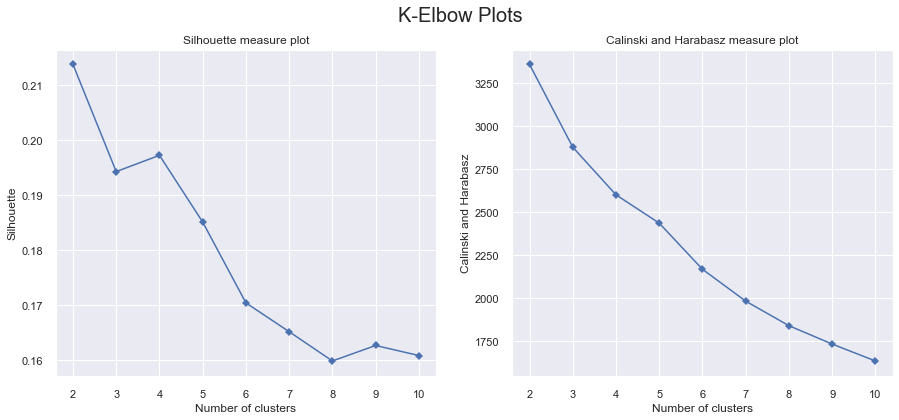

In [1050]:
# Instantiate a K-Means model
clus_estim = KMeans(random_state=42) # Default is already 'k-means++' on init, and 10 on n_init, which is good

# K-elbow plots
kelbowplots(clus_estim, all_vars_nonlapsed.drop(columns=social_features_extra+economic_features_extra+donation_features_extra))

In this case, both elbow plots seem to have an elbow either on 3, or 4 clusters. The Silhouette plot has a slight increase on 4 clusters, but it is very minimal.

We will complement this analysis with the visualization of the Silhouette plots, to get a better understanding of the quality of this cluster analysis with 2, 3, 4 or 5 clusters, focusing especially on 3 and 4.

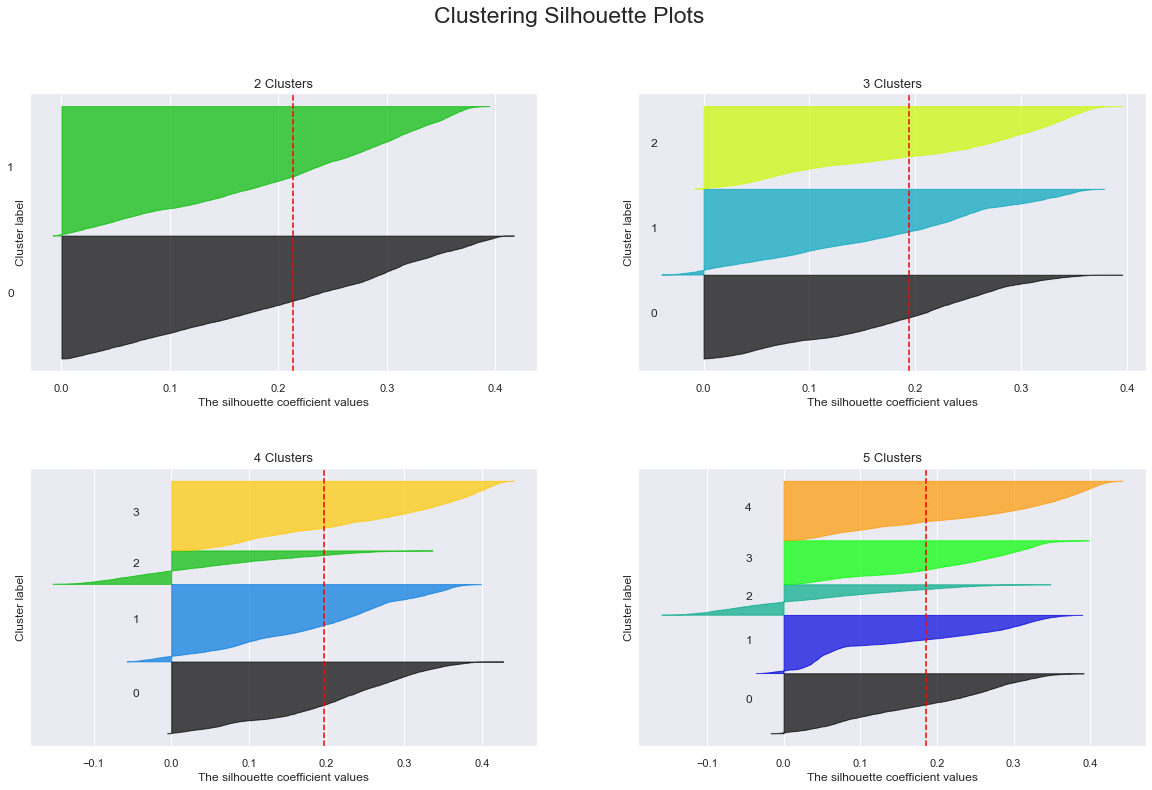

For n_clusters = 2, the average silhouette_score is: 0.2137
For n_clusters = 3, the average silhouette_score is: 0.1942
For n_clusters = 4, the average silhouette_score is: 0.1972
For n_clusters = 5, the average silhouette_score is: 0.185


In [1051]:
kmeans = KMeans(random_state=42)
silhouette_analysis(all_vars_nonlapsed.drop(columns=social_features_extra+economic_features_extra+donation_features_extra), kmeans, (2,2), (20,12), max_nclus=6)

From these plots, we visualize that the 4 cluster solution produces more samples wrongly assigned.

Thus, we conclude that the 3 clusters solution is the most appropriate, as it has a higher Calinski and Harabasz score, and it also seems to produce better results on the Silhouette plot.

In [1052]:
# Perform k-means
model_km_nonlapsed = KMeans(3, random_state=42)
model_km_nonlapsed.fit(all_vars_nonlapsed.drop(columns=social_features_extra+economic_features_extra+donation_features_extra))
clust_labels_km_nonlapsed = model_km_nonlapsed.predict(all_vars_nonlapsed.drop(columns=social_features_extra+economic_features_extra+donation_features_extra))
cent_km_nonlapsed = model_km_nonlapsed.cluster_centers_

In [1053]:
# Appending the cluster labels to a new dataframe
kmeans_nonlapsed_df = all_vars_nonlapsed.copy()
kmeans_nonlapsed_df["k_means_labels"] = clust_labels_km_nonlapsed

#### 13.6.2. Cluster Profilling

Checking the cluster profiles for this K-means solution:

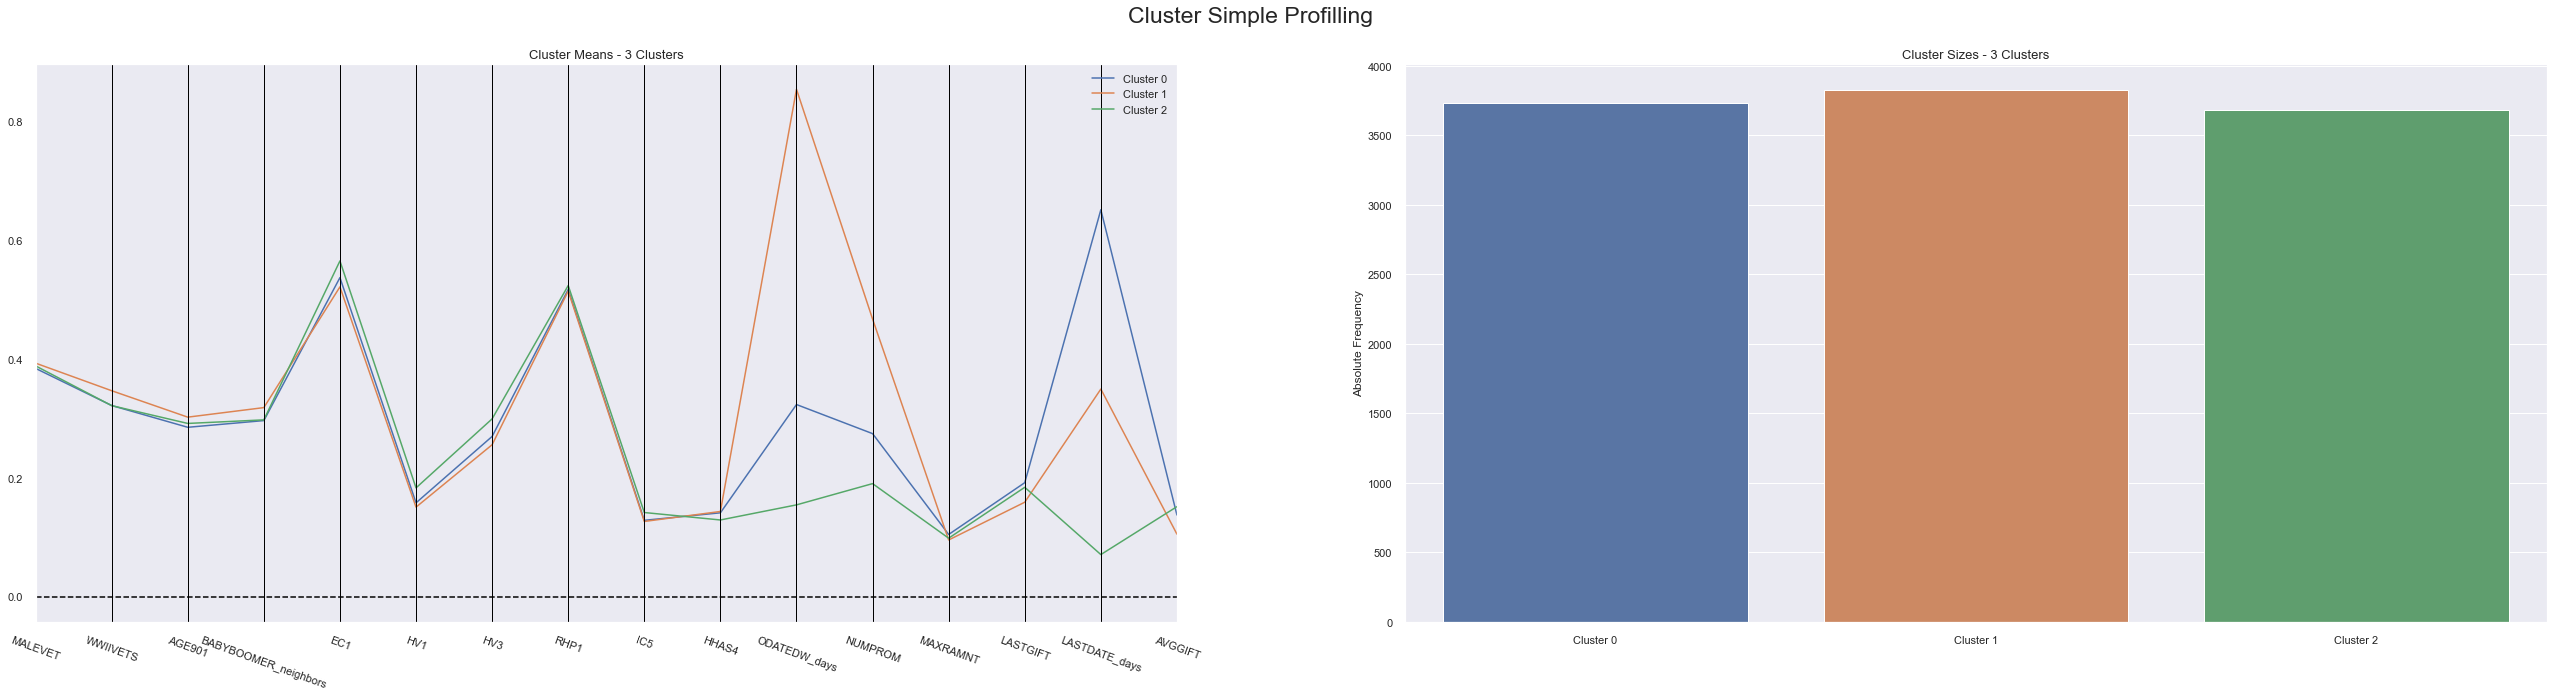

In [1054]:
# K-means
cluster_profiles(kmeans_nonlapsed_df.drop(columns=social_features_extra+economic_features_extra+donation_features_extra), ["k_means_labels"], (45, 10))

In [1055]:
# Getting the means of the 'extra' variables (means on binaries represent probabilities) - Social
kmeans_nonlapsed_df[social_features_extra+['k_means_labels']].groupby('k_means_labels').mean()

CHILD      TPE3  BABYBOOMER_donor      MARR1        AGE  \
k_means_labels                                                               
0               0.178629  2.333155          0.266738  58.787627  55.898500   
1               0.122155  2.172378          0.298980  59.105153  63.112739   
2               0.161054  2.523628          0.236285  58.826181  54.947583   

                MALEMILI  GENDER_F  GENDER_J  GENDER_M  GENDER_U  GEOCODE2_A  \
k_means_labels                                                                 
0               1.131227  0.519818  0.005088  0.426620  0.048473    0.364756   
1               0.817159  0.541460  0.004708  0.394193  0.059639    0.331154   
2               1.081477  0.531505  0.002173  0.426127  0.040196    0.402770   

                GEOCODE2_B  GEOCODE2_C  GEOCODE2_D  
k_means_labels                                      
0                 0.301018    0.164167    0.170059  
1                 0.294795    0.176301    0.197750  
2                 0.309071    0.149647    0.138512

In [1056]:
# Getting the means of the 'extra' variables (means on binaries represent probabilities) - Economic
kmeans_nonlapsed_df[economic_features_extra+['k_means_labels']].groupby('k_means_labels').mean()

HOMEOWNR       IC15       IC16       IC17       IC18  \
k_means_labels                                                         
0               0.565613  14.858329  16.120514  16.551955  20.942421   
1               0.554538  15.417473  16.553492  16.852995  20.845671   
2               0.559207  13.566540  14.936176  15.877241  20.781912   

                     IC19      IC20      IC21      IC22      IC23       LFC1  \
k_means_labels                                                                 
0               19.026513  6.682378  2.595072  1.054901  2.168452  66.256294   
1               18.510071  6.293748  2.428982  1.044991  2.059639  64.340832   
2               20.037751  7.574144  3.107550  1.390277  2.754481  66.787072   

                INCOME_1.0  INCOME_2.0  INCOME_3.0  INCOME_4.0  INCOME_5.0  \
k_means_labels                                                               
0                 0.077397    0.186395    0.092662    0.158543    0.263257   
1                 0.113000    0.246403    0.084750    0.155899    0.230186   
2                 0.068169    0.172461    0.085280    0.155079    0.275394   

                INCOME_6.0  INCOME_7.0  WEALTH2_0.0  WEALTH2_1.0  WEALTH2_2.0  \
k_means_labels                                                                  
0                 0.103642    0.118104     0.055437     0.065613     0.102035   
1                 0.086843    0.082919     0.064086     0.087104     0.106722   
2                 0.115698    0.127920     0.029603     0.057577     0.086638   

                WEALTH2_3.0  WEALTH2_4.0  WEALTH2_5.0  WEALTH2_6.0  \
k_means_labels                                                       
0                  0.081950     0.108998     0.093733     0.121318   
1                  0.104891     0.108815     0.098352     0.111692   
2                  0.068713     0.121673     0.088267     0.118685   

                WEALTH2_7.0  WEALTH2_8.0  WEALTH2_9.0  
k_means_labels                                         
0                  0.109266     0.125870     0.135779  
1                  0.100706     0.102014     0.115616  
2                  0.125204     0.136611     0.167029

In [1057]:
# Getting the means of the 'extra' variables (means on binaries represent probabilities) - Donation
kmeans_nonlapsed_df[donation_features_extra+['k_means_labels']].groupby('k_means_labels').mean()

VETERANS     PHOTO    WALKER  KIDSTUFF   RECPGVG  RECSWEEP  \
k_means_labels                                                               
0               0.114355  0.053562  0.100428  0.020621  0.000803  0.024103   
1               0.111431  0.039759  0.106722  0.015433  0.001569  0.015956   
2               0.104563  0.056763  0.111896  0.016567  0.000815  0.002988   

                 NGIFTALL  RAMNTALL_AVG  
k_means_labels                           
0                5.950723     15.264177  
1               15.347894     16.549503  
2                4.246877     14.851932

We analyzed a K-means solution with k=3, although it led to very similar clusters among themselves, which revealed a somewhat lack of behavior variability on these donors. The biggest changes among clusters are found on the features that, generally, represent a measure for how old the donors are (old in terms of time associated with PVA, not in terms of age).

For this reason, we decided these donors were, in fact, more difficult to recapture (and also less important), and the main focus for PVA should be to get more donations from the recent and lapsed donors.

## Code References

Isolation Forest: <br>
https://www.kdnuggets.com/2018/12/four-techniques-outlier-detection.html <br>
https://quantdare.com/isolation-forest-algorithm/ <br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html <br>
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/ <br>

DBSCAN: <br>
https://medium.com/learningdatascience/anomaly-detection-techniques-in-python-50f650c75aaf <br>

Elbow Plots: <br>
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html <br>
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics <br>

Silhouette Analysis: <br>
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py <br>